# Impact of Climate Change on Crop Production (Wheat, Rice, Soybean and Maize).

## Business Problem:
###To find the Countries who produce more CO2 but now are decreasing the CO2 and still increasing the crop productions. This will further help in studying what measures these countries are taking to reduce CO2 and still increase their crop production.

##Problem Statement:  
### Will we be able to find countries which have high CO2 and high crop productions?
### What are other important factors which along with CO2 affects the crop production?
### Will we be able to predict the crop production?



In [ ]:
!pip install shap
!pip install pandas-profiling

In [ ]:
!pip install hvplot

In [ ]:
!pip install holoviews==1.16.0 bokeh==3.1.1

In [ ]:
import numpy as np
import pandas as pd
from pandas.plotting import autocorrelation_plot
import seaborn as sns
from matplotlib import pyplot as plt
#from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import random
import time
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
# mount google drive
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

import os
import pandas as pd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn import cluster
from sklearn.metrics import pairwise_distances_argmin
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import SpectralClustering
from sklearn.mixture import GaussianMixture
import time

In [ ]:
import panel as pn

pn.extension('tabulator', sizing_mode="stretch_width")

In [ ]:
import pandas as pd
import numpy as np
import panel as pn
pn.extension('tabulator')

import hvplot.pandas
import holoviews as hv

hv.extension('bokeh')

## Data

we are using several datasets from Food and Agri Org of the UN and other sources link attched below

https://www.fao.org/faostat/en/#data/RFN
https://datadryad.org/stash/dataset/doi:10.5061/dryad.2rbnzs7qh
https://www.fao.org/faostat/en/#data
https://climatedata.imf.org/datasets/4063314923d74187be9596f10d034914/explore
https://www.kaggle.com/datasets/mdazizulkabirlovlu/all-countries-temperature-statistics-1970-2021?select=all+countries+global+temperature.csv


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
profdrive="/content/drive/MyDrive/ML-Summer-2023/The Martians/Data"
file_name1="Disaster_data/temperature_data.csv"
file_name2="Disaster_data/Climate-related_Disasters_Frequency.csv"
file_name3="FT2021_fossil_CO2_booklet_2022.xlsx"
file_name4="country_codes.csv"
file_name5="Disaster_data/pesticides.csv"
file_name6="Disaster_data/fertilizer.csv"
file_name7="Disaster_data/arable_land.csv"
file_name8="wheat-production.csv"
file_name9="rice-production.csv"
file_name10="soybean-production.csv"
file_name11="maize-production.csv"
file_name12="missing_country_temp.csv"
file_name13 = "newdata.csv"


import os
os.chdir(profdrive)

In [ ]:
#CO2 data
data_co2= pd.read_excel(file_name3,sheet_name="fossil_CO2_totals_by_country")
# temperature data
data_temp= pd.read_csv(file_name1)##, encoding='cp1252'
# Disaster data
data_disaster = pd.read_csv(file_name2)
#Country code data
data_country_code=pd.read_csv(file_name4)
#Peticide data
data_pesticide=pd.read_csv(file_name5)
#Fertilizer data (Nitrogen, Potassium and potash)
data_fertilizer=pd.read_csv(file_name6)
#arable land data
data_arable=pd.read_csv(file_name7)
#Wheat data
data_wheat=pd.read_csv(file_name8)
#Rice data
data_rice=pd.read_csv(file_name9)
#Soybean data
data_soybean=pd.read_csv(file_name10)
#Maize data
data_maize=pd.read_csv(file_name11)
#Missing temperature data
missing_temp=pd.read_csv(file_name12)
#dataset for intractive charts
df_interative=pd.read_csv(file_name13)

## Utilities Function

In [ ]:
def removeDataWithoutCode(df,code):

  df_ = df[df[code].notna()]
  df_=df_[~(df_[code]=='')]

  df_ = df_[df_[code].isin(data_country_code['Code'])]
  return df_

In [ ]:
def trimDataFrame(df,start,end):
  df_trimmed= (
      df
      .query(f'Year >= {start} and Year <={end}')
  )

  return df_trimmed

In [ ]:
def replace_temp(df):
  ind=df.loc[pd.isnull(df).any(1), :].index.values
  for i in ind:
    year=(df.loc[i])["Year"]
    code=(df.loc[i])["Code"]

    try:
      t=missing_temp[(missing_temp["Code"]==code)]
      t=t[t["Year"]==year]
      df.loc[i, "temp_change"]=round(float(t["change_in_temp"]),3)
    except:
      try:
        df.loc[i, "temp_change"]=df.loc[i-1, "temp_change"]
      except:
        df.loc[i, "temp_change"]=0

  return df

In [ ]:
def plot_bar(val1, val2, label_x, label_y, title):
  fig = plt.figure(figsize = (10, 5))
  plt.bar(val1, val2, color ='maroon',
        width = 0.4)

  plt.xlabel(label_x)
  plt.ylabel(label_y)
  plt.title(title, fontsize=20, fontweight="bold")
  plt.show()

In [ ]:
def get_sorted_df_for_year(df, year, sort_col, limit, isAssending = False):
  df_ = df[df['Year'] == year].sort_values(by=[sort_col],ascending=isAssending)
  return list(df_["Code"].head(limit)), list(df_[sort_col].head(limit))

In [ ]:
def changeCountryCodeToName(code: list)->list:
  counrtry_names=[str(data_co2_country[data_co2_country["Code"]==i]["Country"]).split("\n")[0].split("    ")[1] for i in code]
  return counrtry_names

In [ ]:
def aggregate_data_cluster(df, crop_name):
  agg_gains_df = (
      df
      .groupby("Code")
      .agg({crop_name: "mean", "CO2": "mean","temp_change":"mean"})
      .reset_index()
      .rename(columns={crop_name: "avg_crop_production","CO2": "avg_CO2","temp_change":"avg_temp_change" })
  )
  return agg_gains_df

In [ ]:
def scaled_df(df):
  return StandardScaler().fit_transform(df)

In [ ]:
def golden_cluster_selector(df_, col1, col2):

  df= df_.copy()

  # Step 1: Calculate the relative values for columns A and B
  max_A = df[col1].max()
  max_B = df[col2].max()

  df['RA'] = df[col1] / max_A
  df['RB'] = df[col2] / max_B

  # Step 2: Compute a score for each record
  wA = 0.5  # Weight for column A
  wB = 0.5  # Weight for column B

  df['Score'] = wA * df['RA'] + wB * df['RB']

  # Step 3: Sort the records based on the calculated scores in descending order
  df_sorted = df.sort_values(by='Score', ascending=False)

  # Step 4: Select the record with the highest score
  best_record = df_sorted.iloc[0]

  return int(best_record['cluster'])

In [ ]:
def get_country_names(labels,df):
  r=len(set(labels))
  country_clusters={}
  for index,value in enumerate(labels):
    if value not in country_clusters.keys():
      country_clusters[value]=[df['Code'].iloc[index]]
    else:
      country_clusters[value].append(df['Code'].iloc[index])
  return country_clusters

In [ ]:
def elbow_chart_K(df):
  kmeans_kwargs = {
  "init": "random",
  "n_init": 10,
  "random_state": 1,
  }

  #create list to hold SSE values for each k
  sse = []
  for k in range(1, 11):
      kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
      kmeans.fit(df)
      sse.append(kmeans.inertia_)
  #df_co2_final.loc[:,1970:2021]
  #visualize results
  plt.plot(range(1, 11), sse)
  plt.xticks(range(1, 11))
  plt.xlabel("Number of Clusters")
  plt.ylabel("SSE")
  plt.title("Elbow Chart")
  plt.show()
  return(sse)

In [ ]:
def silhoutte_Score_K(df):
  silhouette_score={}
  for k in range(2, 11):
    kmeans = KMeans(n_clusters=k,  random_state=10, n_init=10)
    kmeans.fit(df)
    silhouette_score[k] = metrics.silhouette_score(df, kmeans.labels_, random_state=10, metric= 'euclidean')
  plt.figure(figsize=(10,6))
  plt.plot(list(silhouette_score.keys()), list(silhouette_score.values()))
  plt.xlabel("Number of Clusters")
  plt.ylabel("Silhouette Score")
  plt.title("Silhouette Score After K-Means Clustering")
  return(silhouette_score)
  #plt.xticks([i for i in range(2, 10)], rotation=75)

In [ ]:
def plot_scatter(df1,df2,labels):
  plt.scatter(df1, df2, c=labels, s=50, cmap='viridis')
  plt.show()
  time.sleep(1)
  plt.pause(0.0001)



In [ ]:
def cluster_k(df,k):
  kmeans_cluster = KMeans(n_clusters=k, n_init=10)
  kmeans_cluster.fit(df)
  y_kmeans_cluster = kmeans_cluster.predict(df)
  plot_scatter(df[:, 0],df[:,1],y_kmeans_cluster)
  return y_kmeans_cluster


In [ ]:

def cluster_EM(df, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(df.shape[0])[:n_clusters]
    centers = df[i]

    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(df, centers)

        # 2b. Find new centers from means of points
        new_centers = np.array([df[labels == i].mean(0)
                                for i in range(n_clusters)])

        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    plt.scatter(df[:, 0], df[:, 1], c=labels, s=50, cmap='viridis');

    return centers, labels


In [ ]:

def cluster_spectral(df,num_cluster):
  model = SpectralClustering(n_clusters=num_cluster, affinity='nearest_neighbors',
                            assign_labels='kmeans')
  labels_spectral = model.fit_predict(df)
  plt.scatter(df[:, 0], df[:, 1], c=labels_spectral,
              s=50, cmap='viridis')
  return labels_spectral


In [ ]:

def cluster_GMM(df, k):
  gm = GaussianMixture(n_components=k, random_state=0,covariance_type="diag").fit(df)
  y_pred = gm.predict(df)

  plt.scatter(df[:, 0], df[:, 1], c=y_pred,
              s=50, cmap='viridis')
  return y_pred

In [ ]:
def find_silhouette_score(df,label):
  silhouette_score=metrics.silhouette_score(df, label, random_state=10, metric= "euclidean")
  return(silhouette_score)


In [ ]:
def range_diff_clusters(r1,r2,df):
  # l_K=[]
  # l_em=[]
  # l_gmm=[]
  # l_spectral=[]
  s_k=[]
  s_em=[]
  s_gmm=[]
  s_spectral=[]
  for i in range(r1,r2+1):
    l1=cluster_k(df,i)
    #l_K.append(l1)
    s_k.append(find_silhouette_score(df,l1))

    c2,l2=cluster_EM(df,i)
    #l_em.append(l2)
    s_em.append(find_silhouette_score(df,l2))

    l3=cluster_GMM(df,i)
    #l_gmm.append(l3)
    s_gmm.append(find_silhouette_score(df,l3))

    l4=cluster_spectral(df,i)
    #l_spectral.append(l4)
    s_spectral.append(find_silhouette_score(df,l4))

  df_comparision=pd.DataFrame({"number_of_Clusters":list(range(r1,r2+1)), "K-means":s_k, "Spectral":s_spectral, "EM": s_em, "GMM": s_gmm})
  return df_comparision



In [ ]:
def plot_cluster(df, max_loop=50):
    """
    Looking at the performance of various number of clusters using K-Means.
    Performance is evaluated by within cluster SSE and silhouette score.
    """
    try:
        df.drop('cluster', axis=1, inplace=True)
    except:
        next
    X_rb = df.iloc[:,1:]

    # robust scaling is used so that the centering and scaling statistics are therefore not influenced by a few number of very large marginal outliers as they are based on percentiles
    #rb = RobustScaler()
    #X_rb = rb.fit_transform(X)

    sse_within_cluster = {}
    silhouette_score = {}

    for k in range(2, max_loop):
        kmeans = KMeans(n_clusters=k,  random_state=10, n_init=10)
        kmeans.fit(X_rb)
        sse_within_cluster[k] = kmeans.inertia_
        silhouette_score[k] = metrics.silhouette_score(X_rb, kmeans.labels_, random_state=10)

    _ = plt.figure(figsize=(10,6))
    ax1 = plt.subplot(211)
    _ = plt.plot(list(sse_within_cluster.keys()), list(sse_within_cluster.values()))
    _ = plt.xlabel("Number of Clusters")
    _ = plt.ylabel("SSE Within Cluster")
    _ = plt.title("Within Cluster SSE After K-Means Clustering")
    _ = plt.xticks([i for i in range(2, max_loop)], rotation=75)

    ax2 = plt.subplot(212)
    _ = plt.plot(list(silhouette_score.keys()), list(silhouette_score.values()))
    _ = plt.xlabel("Number of Clusters")
    _ = plt.ylabel("Silhouette Score")
    _ = plt.title("Silhouette Score After K-Means Clustering")
    _ = plt.xticks([i for i in range(2, max_loop)], rotation=75)

    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.5, wspace=0.35)

## Data Cleaning and Data Preprocessing


#### Co2 data

In [ ]:
data_co2.head()

Substance EDGAR Country Code                 Country        1970  \
0       CO2                ABW                   Aruba    0.081876   
1       CO2                AFG             Afghanistan    1.739541   
2       CO2                AGO                  Angola    8.952570   
3       CO2                AIA                Anguilla    0.002168   
4       CO2                AIR  International Aviation  169.300997   

         1971        1972        1973        1974        1975        1976  \
0    0.081889    0.095415    0.099630    0.089089    0.105139    0.096041   
1    1.737823    1.715749    1.742813    2.198551    2.037627    1.899895   
2    8.538308   10.388519   11.372301   11.833761   10.930423    7.317385   
3    0.002168    0.002264    0.002109    0.002350    0.002584    0.002434   
4  169.300997  179.147487  186.892096  179.793331  173.866020  174.273791   

   ...        2012        2013        2014        2015        2016  \
0  ...    1.618441    1.588689    1.615728    1.607879    1.578644   
1  ...   10.238064    8.484183    8.016290    8.361849    7.635914   
2  ...   24.186843   27.822325   30.407844   32.594130   30.691660   
3  ...    0.026023    0.027941    0.027896    0.028005    0.028340   
4  ...  472.721119  480.909126  496.627697  524.654035  548.207777   

         2017        2018        2019        2020        2021  
0    1.315458    1.347594    1.387156    1.144333    1.274134  
1    8.145255    9.106997    8.082724    8.183718    8.347669  
2   26.129882   24.048619   25.325994   23.055844   24.450057  
3    0.029062    0.028223    0.027580    0.022779    0.025409  
4  582.230490  609.630469  617.763229  338.144083  390.166250  

[5 rows x 55 columns]

In [ ]:
data_co2= data_co2.rename(columns={'EDGAR Country Code':'Code'})


In [ ]:
data_co2_country=removeDataWithoutCode(data_co2,"Code")

In [ ]:
data_co2_country.head()

Substance Code      Country      1970      1971       1972       1973  \
0       CO2  ABW        Aruba  0.081876  0.081889   0.095415   0.099630   
1       CO2  AFG  Afghanistan  1.739541  1.737823   1.715749   1.742813   
2       CO2  AGO       Angola  8.952570  8.538308  10.388519  11.372301   
3       CO2  AIA     Anguilla  0.002168  0.002168   0.002264   0.002109   
5       CO2  ALB      Albania  4.814516  4.814828   5.498804   4.939869   

        1974       1975      1976  ...       2012       2013       2014  \
0   0.089089   0.105139  0.096041  ...   1.618441   1.588689   1.615728   
1   2.198551   2.037627  1.899895  ...  10.238064   8.484183   8.016290   
2  11.833761  10.930423  7.317385  ...  24.186843  27.822325  30.407844   
3   0.002350   0.002584  0.002434  ...   0.026023   0.027941   0.027896   
5   5.319746   5.414438  5.785733  ...   4.574328   4.811345   5.134697   

        2015       2016       2017       2018       2019       2020       2021  
0   1.607879   1.578644   1.315458   1.347594   1.387156   1.144333   1.274134  
1   8.361849   7.635914   8.145255   9.106997   8.082724   8.183718   8.347669  
2  32.594130  30.691660  26.129882  24.048619  25.325994  23.055844  24.450057  
3   0.028005   0.028340   0.029062   0.028223   0.027580   0.022779   0.025409  
5   4.916119   4.619508   5.346925   5.314989   5.038618   4.706920   4.591114  

[5 rows x 55 columns]

In [ ]:
df_co2_country=data_co2_country.copy()
df_co2_country.drop('Substance', inplace=True, axis =1)
df_co2_country.drop('Country', inplace=True, axis =1)
df_co2_ = pd.melt(df_co2_country, id_vars=['Code'] , var_name='Year', value_name ='CO2')

In [ ]:
df_co2_ ['Year']=df_co2_ ['Year'].astype('int')

In [ ]:
df_co2_.head()

Code  Year       CO2
0  ABW  1970  0.081876
1  AFG  1970  1.739541
2  AGO  1970  8.952570
3  AIA  1970  0.002168
4  ALB  1970  4.814516

#### temp data

In [ ]:
data_temp.head()

Domain Code                      Domain Area Code (ISO3)         Area  \
0          ET  Temperature change on land              AFG  Afghanistan   
1          ET  Temperature change on land              AFG  Afghanistan   
2          ET  Temperature change on land              AFG  Afghanistan   
3          ET  Temperature change on land              AFG  Afghanistan   
4          ET  Temperature change on land              AFG  Afghanistan   

   Element Code             Element  Months Code               Months  \
0          7271  Temperature change         7020  Meteorological year   
1          7271  Temperature change         7020  Meteorological year   
2          7271  Temperature change         7020  Meteorological year   
3          7271  Temperature change         7020  Meteorological year   
4          7271  Temperature change         7020  Meteorological year   

   Year Code  Year Unit  Value Flag Flag Description  
0       1970  1970   °c  0.813    E  Estimated value  
1       1971  1971   °c  0.619    E  Estimated value  
2       1972  1972   °c -1.124    E  Estimated value  
3       1973  1973   °c  0.232    E  Estimated value  
4       1974  1974   °c -0.489    E  Estimated value

In [ ]:
df_temp_country= removeDataWithoutCode(data_temp,"Area Code (ISO3)")
df_temp_country=df_temp_country.rename(columns={'Area Code (ISO3)':'Code'})
df_temp_country=df_temp_country.rename(columns={'Value':'temp_change'})
df_temp_country.drop(['Domain Code', 'Domain','Area',	'Element Code',	'Element', 'Months Code', 'Months',	'Year Code', 'Unit', 'Flag',	'Flag Description'], inplace=True, axis =1)

In [ ]:
df_temp_country.head()

Code  Year  temp_change
0  AFG  1970        0.813
1  AFG  1971        0.619
2  AFG  1972       -1.124
3  AFG  1973        0.232
4  AFG  1974       -0.489

#### Wheat Data

In [ ]:
data_wheat.head()

Entity Code  Year  Wheat | 00000015 || Production | 005510 || tonnes
0  Afghanistan  AFG  1961                                          2279000.0
1  Afghanistan  AFG  1962                                          2279000.0
2  Afghanistan  AFG  1963                                          1947000.0
3  Afghanistan  AFG  1964                                          2230000.0
4  Afghanistan  AFG  1965                                          2282000.0

In [ ]:
data_wheat.drop(["Entity"],axis=1,inplace=True)
data_wheat=data_wheat.rename(columns={'Wheat | 00000015 || Production | 005510 || tonnes':"wheat"})
data_wheat["Code"].unique()

array(['AFG', nan, 'ALB', 'DZA', 'AGO', 'ARG', 'ARM', 'AUS', 'AUT', 'AZE',
       'BGD', 'BLR', 'BEL', 'BTN', 'BOL', 'BIH', 'BWA', 'BRA', 'BGR',
       'BDI', 'CMR', 'CAN', 'TCD', 'CHL', 'CHN', 'COL', 'HRV', 'CYP',
       'CZE', 'OWID_CZS', 'COD', 'DNK', 'ECU', 'EGY', 'ERI', 'EST', 'SWZ',
       'ETH', 'OWID_ERE', 'FIN', 'FRA', 'GEO', 'DEU', 'GRC', 'GTM', 'HND',
       'HUN', 'IND', 'IRN', 'IRQ', 'IRL', 'ISR', 'ITA', 'JPN', 'JOR',
       'KAZ', 'KEN', 'KWT', 'KGZ', 'LVA', 'LBN', 'LSO', 'LBY', 'LTU',
       'LUX', 'MDG', 'MWI', 'MLI', 'MLT', 'MRT', 'OWID_MNS', 'MEX', 'MDA',
       'MNG', 'MNE', 'MAR', 'MOZ', 'MMR', 'NAM', 'NPL', 'NLD', 'NCL',
       'NZL', 'NER', 'NGA', 'PRK', 'MKD', 'NOR', 'OMN', 'PAK', 'PSE',
       'PRY', 'PER', 'POL', 'PRT', 'QAT', 'ROU', 'RUS', 'RWA', 'SAU',
       'SRB', 'OWID_SRM', 'SVK', 'SVN', 'SOM', 'ZAF', 'KOR', 'SSD', 'ESP',
       'SDN', 'SWE', 'CHE', 'SYR', 'TWN', 'TJK', 'TZA', 'THA', 'TUN',
       'TUR', 'TKM', 'OWID_USS', 'UGA', 'UKR', 'ARE', 'GBR', 'USA

In [ ]:
data_wheat.isna().sum()

Code     2499
Year        0
wheat       0
dtype: int64

#### Rice Data

In [ ]:
data_rice.head()

Entity Code  Year  Rice | 00000027 || Production | 005510 || tonnes
0  Afghanistan  AFG  1961                                          319000.0
1  Afghanistan  AFG  1962                                          319000.0
2  Afghanistan  AFG  1963                                          319000.0
3  Afghanistan  AFG  1964                                          380000.0
4  Afghanistan  AFG  1965                                          380000.0

In [ ]:
data_rice.drop(["Entity"],axis=1,inplace=True)
data_rice=data_rice.rename(columns={'Rice | 00000027 || Production | 005510 || tonnes':"rice"})

#### Soybean Data

In [ ]:
data_soybean.drop(["Entity"],axis=1,inplace=True)
data_soybean=data_soybean.rename(columns={'Soybeans | 00000236 || Production | 005510 || tonnes':"soybean"})
data_soybean.isna().sum()

Code       2336
Year          0
soybean       0
dtype: int64

#### Maize Data

In [ ]:
data_maize.drop(["Entity"],axis=1,inplace=True)
data_maize=data_maize.rename(columns={'Maize | 00000056 || Production | 005510 || tonnes':"maize"})
data_maize.isna().sum()

Code     2571
Year        0
maize       0
dtype: int64

#### Data Prep for clustering ( Amalagamation co2+ temp +crop)

In [ ]:
df_temp_trim=trimDataFrame(df_temp_country, 1980,2021)
df_co2_trim=trimDataFrame(df_co2_, 1980,2021)

In [ ]:
df_temp_country.isna().sum()

Code             0
Year             0
temp_change    411
dtype: int64

In [ ]:
data_cluster=pd.merge(df_temp_country, df_co2_, on=['Year','Code'])


In [ ]:
data_cluster_wheat=pd.merge(data_cluster, data_wheat, on=['Year','Code'])
data_cluster_wheat=replace_temp(data_cluster_wheat)
data_cluster_wheat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5666 entries, 0 to 5665
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Code         5666 non-null   object 
 1   Year         5666 non-null   int64  
 2   temp_change  5666 non-null   float64
 3   CO2          5666 non-null   float64
 4   wheat        5666 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 394.6+ KB


In [ ]:
data_cluster_rice=pd.merge(data_cluster, data_rice, on=['Year','Code'])
data_cluster_rice=replace_temp(data_cluster_rice)
data_cluster_rice.isna().sum()

Code           0
Year           0
temp_change    0
CO2            0
rice           0
dtype: int64

In [ ]:
data_cluster_maize=pd.merge(data_cluster, data_maize, on=['Year','Code'])
data_cluster_maize=replace_temp(data_cluster_maize)
data_cluster_maize.isna().sum()

Code           0
Year           0
temp_change    0
CO2            0
maize          0
dtype: int64

In [ ]:
data_cluster_soybean=pd.merge(data_cluster, data_soybean, on=['Year','Code'])
data_cluster_soybean=replace_temp(data_cluster_soybean)
data_cluster_soybean.isna().sum()

Code           0
Year           0
temp_change    0
CO2            0
soybean        0
dtype: int64

In [ ]:
agg_wheat_cluster=aggregate_data_cluster(data_cluster_wheat,"wheat")

In [ ]:
agg_rice_cluster=aggregate_data_cluster(data_cluster_rice,"rice")

In [ ]:
agg_maize_cluster=aggregate_data_cluster(data_cluster_maize,"maize")

In [ ]:
agg_soybean_cluster=aggregate_data_cluster(data_cluster_soybean,"soybean")

For top five producer of Co2 how the temperature has changed over years

In [ ]:
data = pd.merge(df_temp_trim, df_co2_trim, on=['Year','Code'])

## EDA

Global Co2 trend

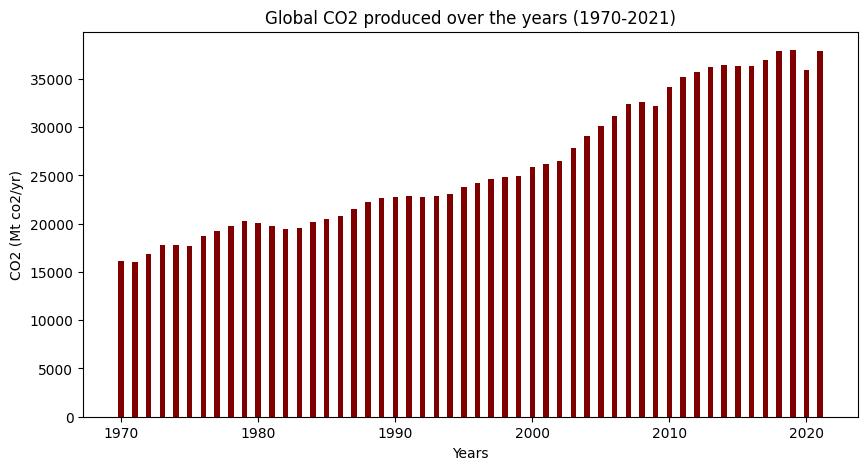

In [ ]:
years=(data_co2.columns).to_list()[3:]
global_co2=list(np.array(data_co2[data_co2['Code']=="GLOBAL TOTAL"])[0])[3:]
fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(years, global_co2, color ='maroon',
        width = 0.4)

plt.xlabel("Years")
plt.ylabel("CO2 (Mt co2/yr)")
plt.title("Global CO2 produced over the years (1970-2021)")
plt.show()

From the above graph we can see that the trend of global CO2 is upward with some seasoning. After every 5 years it seems to decrease a little but in a decade it goes upward.

From 1970 to 2021, the global CO2 has increase more than twice what it was in 1970.

**Top CO2 producers in the world since past 5 decades**

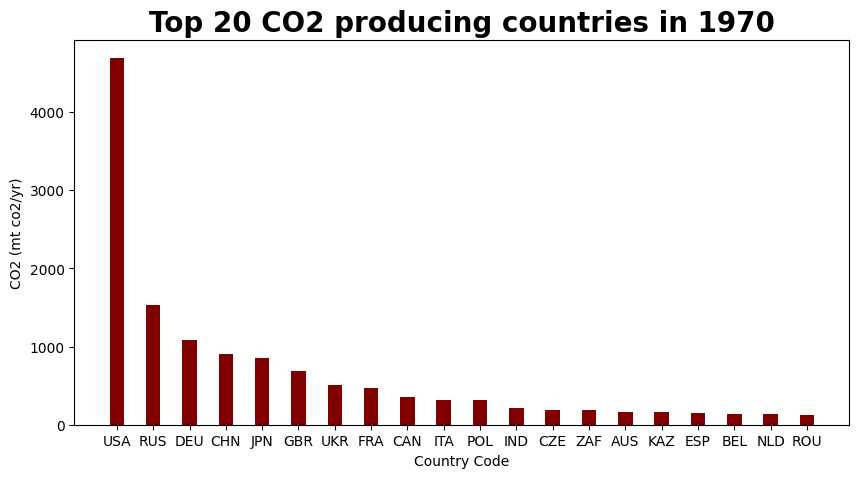

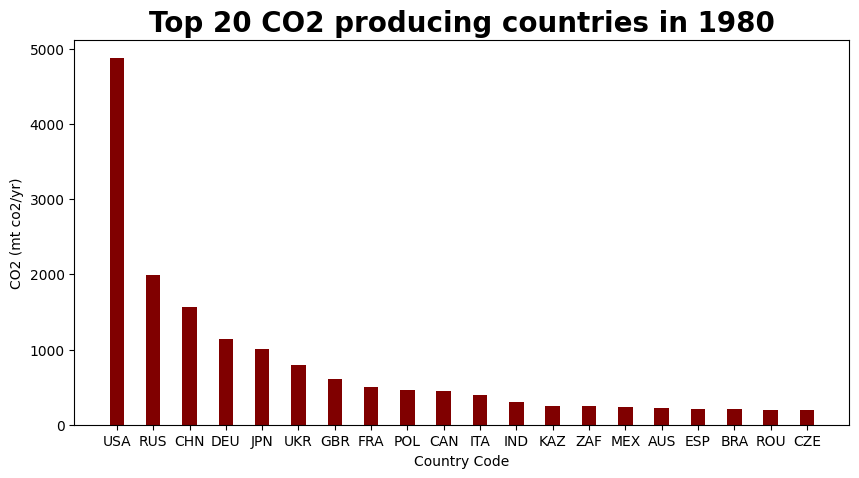

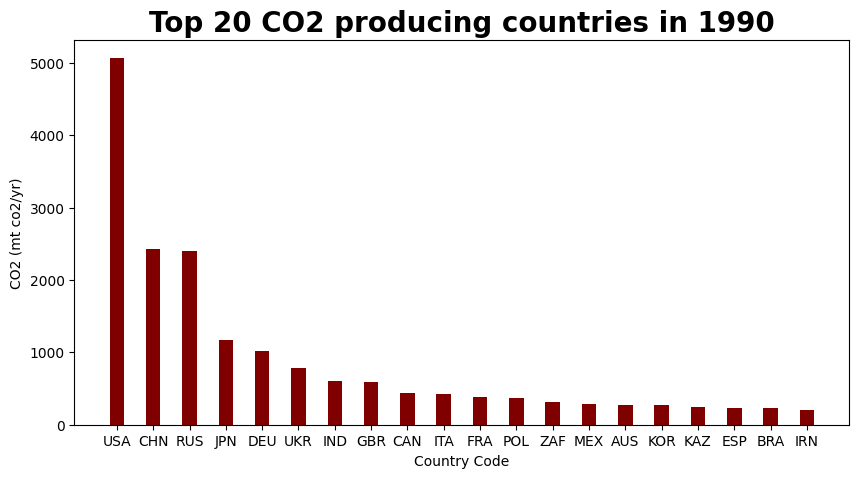

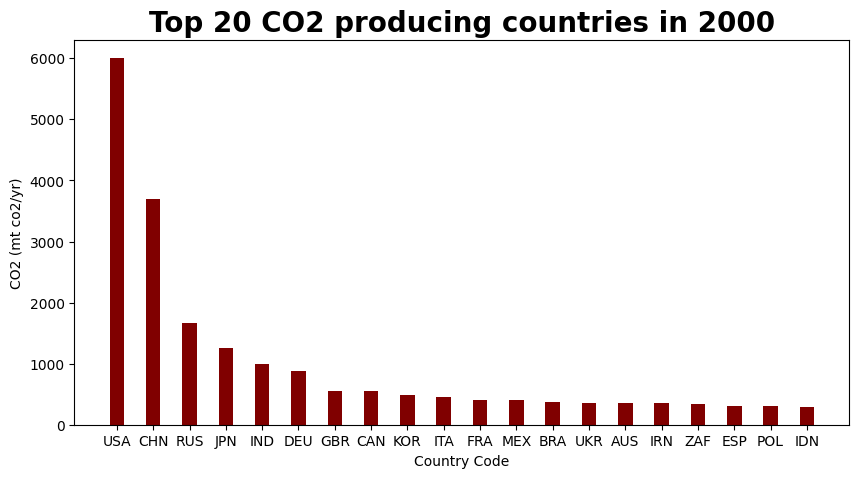

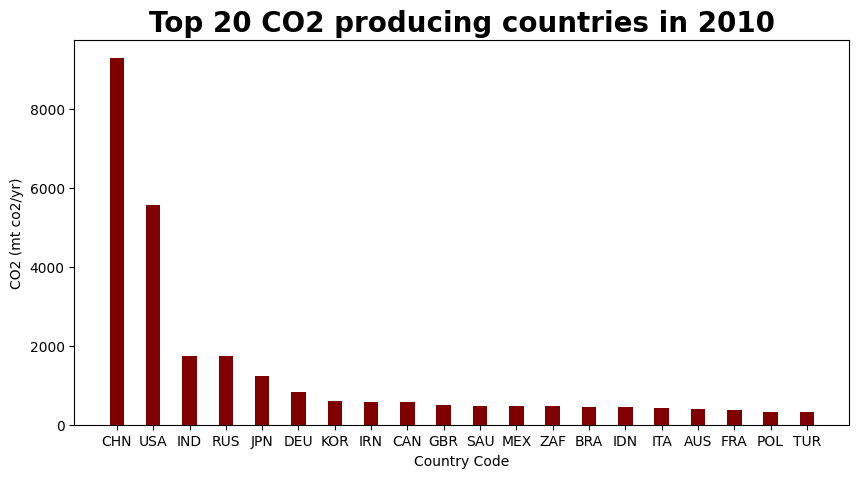

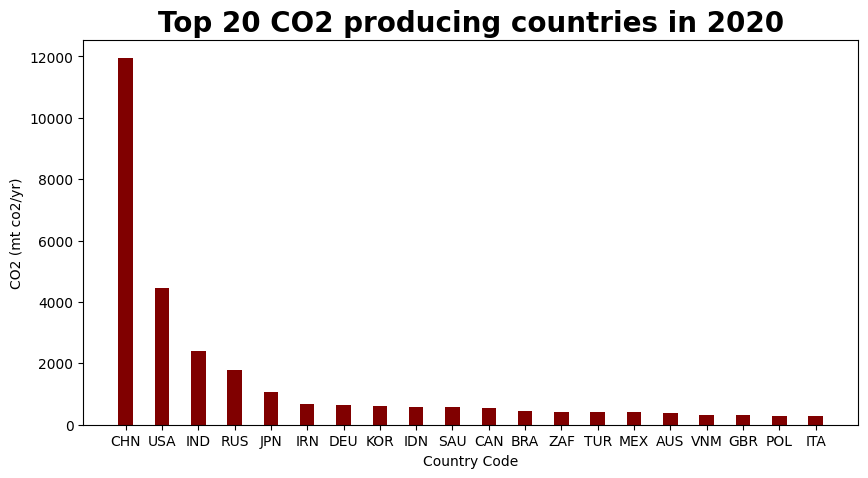

In [ ]:
country_top20_1970 , val_1 = get_sorted_df_for_year(df_co2_, 1970 ,'CO2',20)
country_top20_1980, val_2= get_sorted_df_for_year(df_co2_, 1980 ,'CO2',20)
country_top20_1990, val_3= get_sorted_df_for_year(df_co2_, 1990 ,'CO2',20)
country_top20_2000, val_4= get_sorted_df_for_year(df_co2_, 2000 ,'CO2',20)
country_top20_2010,val_5= get_sorted_df_for_year(df_co2_, 2010 ,'CO2',20)
country_top20_2020,val_6= get_sorted_df_for_year(df_co2_, 2020 ,'CO2',20)
plot_bar(country_top20_1970, val_1, "Country Code", "CO2 (mt co2/yr)", "Top 20 CO2 producing countries in 1970")
plot_bar(country_top20_1980, val_2, "Country Code", "CO2 (mt co2/yr)", "Top 20 CO2 producing countries in 1980")
plot_bar(country_top20_1990, val_3, "Country Code", "CO2 (mt co2/yr)", "Top 20 CO2 producing countries in 1990")
plot_bar(country_top20_2000, val_4, "Country Code", "CO2 (mt co2/yr)", "Top 20 CO2 producing countries in 2000")
plot_bar(country_top20_2010, val_5, "Country Code", "CO2 (mt co2/yr)", "Top 20 CO2 producing countries in 2010")
plot_bar(country_top20_2020, val_6, "Country Code", "CO2 (mt co2/yr)", "Top 20 CO2 producing countries in 2020")

In [ ]:
all_top_country=list(set(country_top20_1970)|(set(country_top20_1980)|set(country_top20_1990)|set(country_top20_2000)|set(country_top20_2010)|set(country_top20_2020)))

print("List of countries which are highest producer of CO2 in past 5 decades:",changeCountryCodeToName(all_top_country))

List of countries which are highest producer of CO2 in past 5 decades: ['Japan', 'United Kingdom', 'China', 'Ukraine', 'Turkey', 'Mexico', 'United States', 'Indonesia', 'Netherlands', 'France and Monaco', 'Australia', 'Spain and Andorra', 'Iran', 'Italy, San Marino and the Holy See', 'Saudi Arabia', 'South Korea', 'India', 'Romania', 'Czechia', 'South Africa', 'Kazakhstan', 'Belgium', 'Germany', 'Vietnam', 'Russia', 'Poland', 'Canada', 'Brazil']


In [ ]:
dict_date_value={}
for i in all_top_country:
  dict_date_value[i]=[float(data_co2[data_co2["Code"]==i][1970]),float(data_co2[data_co2["Code"]==i][1980]),float(data_co2[data_co2["Code"]==i][1990]),float(data_co2[data_co2["Code"]==i][2000]),float(data_co2[data_co2["Code"]==i][2010]),float(data_co2[data_co2["Code"]==i][2020])]
df1 = pd.DataFrame(dict_date_value)
df1.insert(0, 'Year', [1970,1980,1990,2000,2010,2020])

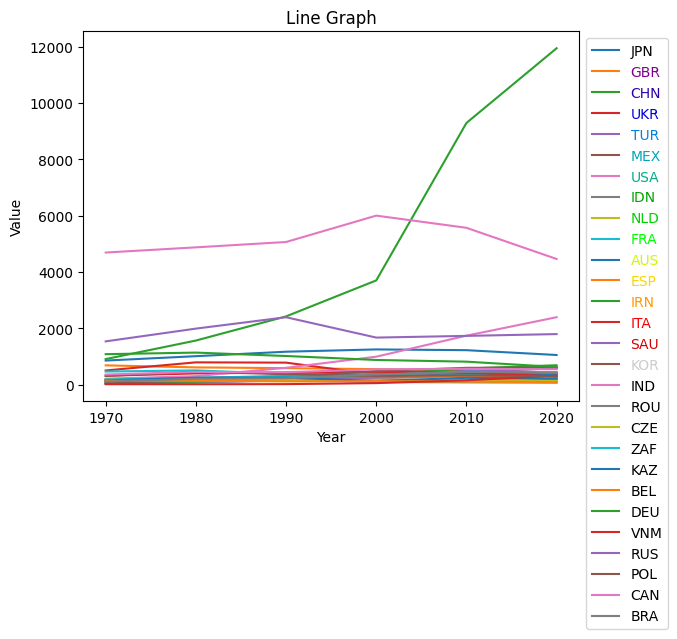

In [ ]:
colormap = plt.cm.nipy_spectral
colors = colormap(np.linspace(0, 1, 16))

ax = df1.plot(x='Year', y=all_top_country, kind='line')
ax.set_prop_cycle('color', colors)


# Customize the legend
legend = ax.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))

# Set different colors for each legend
#colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd','#8c564b', '#e377c2', '#7f7f7f', '#bcbd22','#17becf','#F0F8FF', '#FAEBD7','#00FFFF','#7FFFD4','#F0FFFF',
      #F5F5DC']#,'blue', 'green',"pink", "yellow",'red', 'black', 'brown',,'#FFE4C4'
for text, color in zip(legend.texts, colors):
    text.set_color(color)

plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Line Graph')

plt.show()

**The top 5 countries that we can see are the largest produces of Co2 and thus the outliers of the datasets are: USA, CHINA, INDIA, JAPAN and RUSSIA.**

In [ ]:
country_top_half_decade=list(set(country_top20_1970).intersection(set(country_top20_1980),set(country_top20_1990),set(country_top20_2000),set(country_top20_2010),set(country_top20_2020)))
print("Countries which are constantly producing highest CO2 in last 5 decades:",country_top_half_decade)

Countries which are constantly producing highest CO2 in last 5 decades: ['AUS', 'JPN', 'ZAF', 'ITA', 'GBR', 'DEU', 'RUS', 'POL', 'CHN', 'CAN', 'IND', 'USA']


**Least CO2  producers in the world since last 5 decades**

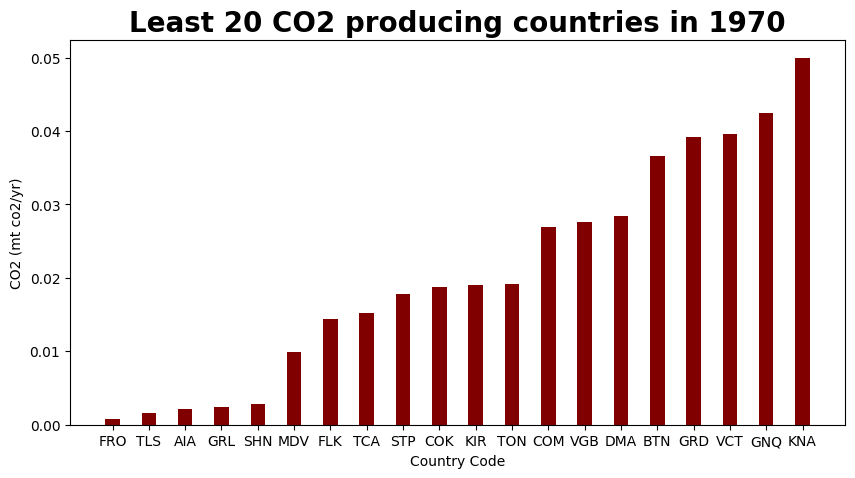

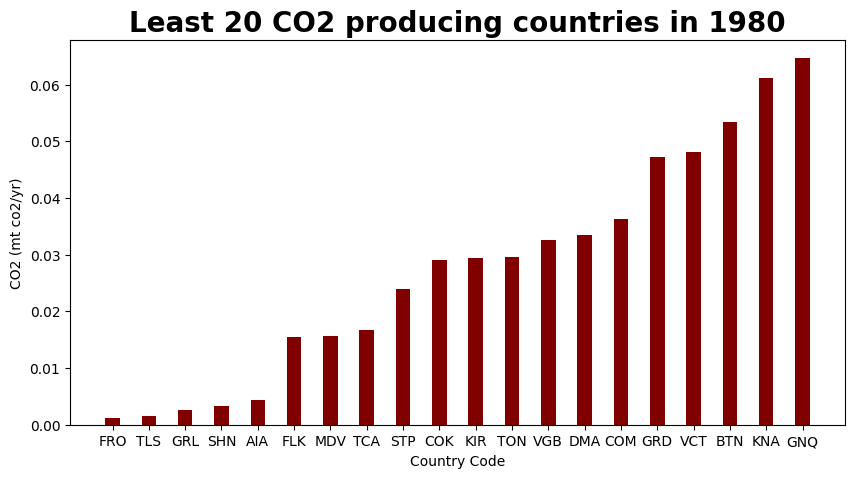

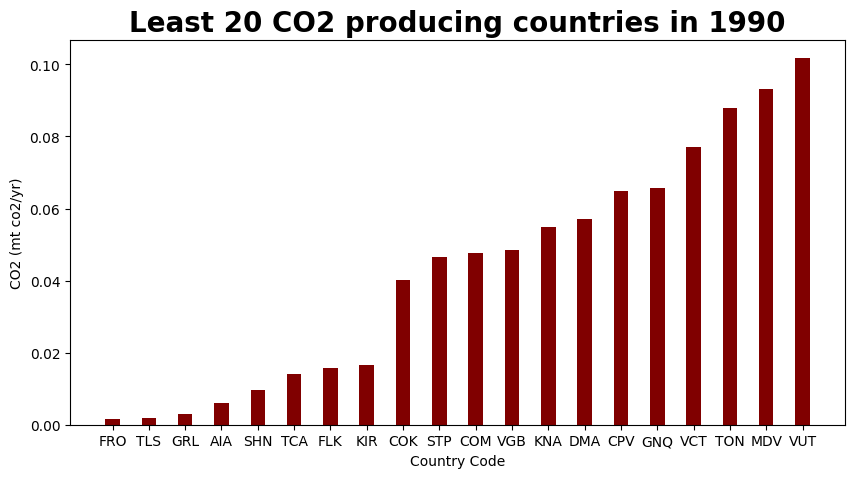

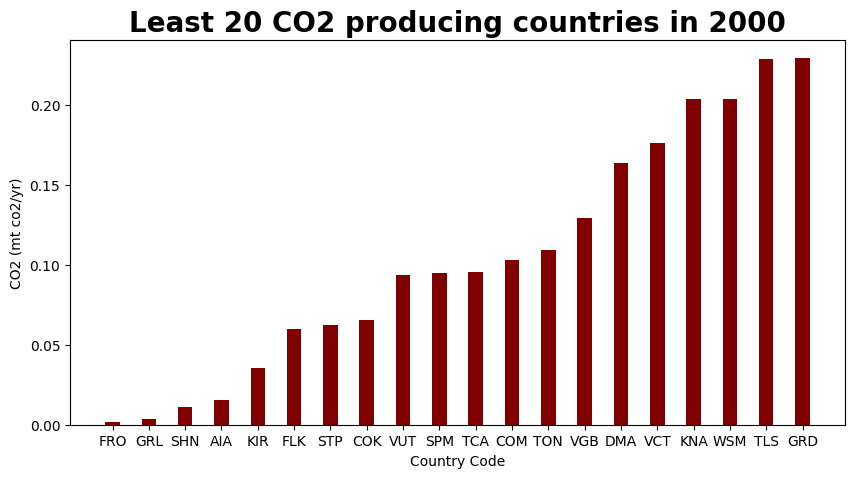

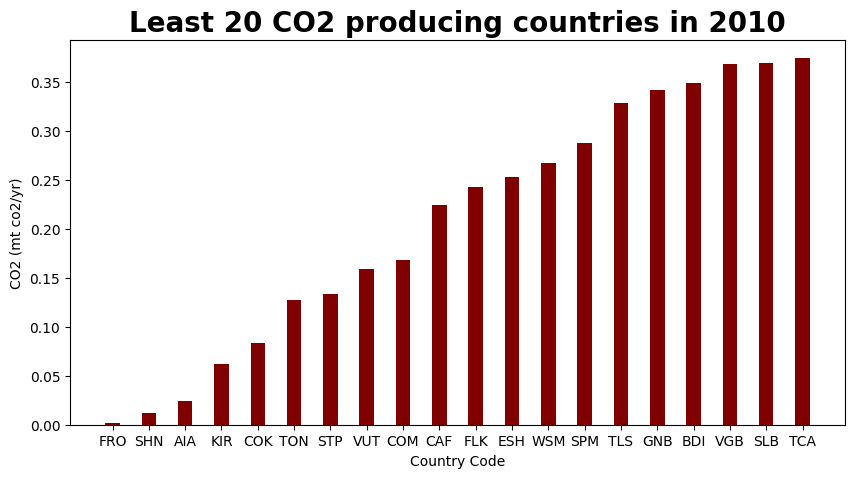

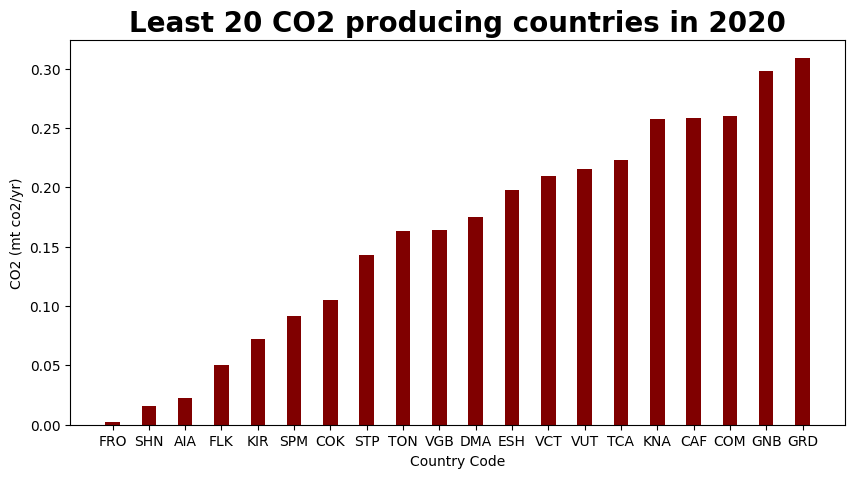

In [ ]:
country_bottom10_1970, least_1= get_sorted_df_for_year(df_co2_, 1970 ,'CO2',20 , True)
country_bottom10_1980, least_2= get_sorted_df_for_year(df_co2_, 1980 ,'CO2',20 , True)
country_bottom10_1990, least_3= get_sorted_df_for_year(df_co2_, 1990 ,'CO2',20 , True)
country_bottom10_2000, least_4= get_sorted_df_for_year(df_co2_, 2000 ,'CO2',20 , True)
country_bottom10_2010, least_5= get_sorted_df_for_year(df_co2_, 2010 ,'CO2',20 , True)
country_bottom10_2020, least_6= get_sorted_df_for_year(df_co2_, 2020 ,'CO2',20 , True)
plot_bar(country_bottom10_1970, least_1, "Country Code", "CO2 (mt co2/yr)", "Least 20 CO2 producing countries in 1970")
plot_bar(country_bottom10_1980, least_2, "Country Code", "CO2 (mt co2/yr)", "Least 20 CO2 producing countries in 1980")
plot_bar(country_bottom10_1990, least_3, "Country Code", "CO2 (mt co2/yr)", "Least 20 CO2 producing countries in 1990")
plot_bar(country_bottom10_2000, least_4, "Country Code", "CO2 (mt co2/yr)", "Least 20 CO2 producing countries in 2000")
plot_bar(country_bottom10_2010, least_5, "Country Code", "CO2 (mt co2/yr)", "Least 20 CO2 producing countries in 2010")
plot_bar(country_bottom10_2020, least_6, "Country Code", "CO2 (mt co2/yr)", "Least 20 CO2 producing countries in 2020")

In [ ]:
all_least_country=country_least_half_decade=set(country_bottom10_1970)|(set(country_bottom10_1980)|set(country_bottom10_1990)|set(country_bottom10_2000)|set(country_bottom10_2010)|set(country_bottom10_2020))
print("Least CO2 producer in last 5 decades:",changeCountryCodeToName(all_least_country))

Least CO2 producer in last 5 decades: ['Vanuatu', 'Saint Vincent and the Grenadines', 'Bhutan', 'Cabo Verde', 'Dominica', 'Guinea-Bissau', 'Greenland', 'Central African Republic', 'São Tomé and Príncipe', 'Kiribati', 'Timor-Leste', 'Faroes', 'Grenada', 'Saint Helena, Ascension and Tristan da Cunha', 'Cook Islands', 'Equatorial Guinea', 'Comoros', 'Turks and Caicos Islands', 'Tonga', 'Saint Pierre and Miquelon', 'Falkland Islands', 'Samoa', 'Burundi', 'British Virgin Islands', 'Western Sahara', 'Solomon Islands', 'Anguilla', 'Saint Kitts and Nevis', 'Maldives']


In [ ]:
country_least_half_decade=set(country_bottom10_1970).intersection(set(country_bottom10_1980),set(country_bottom10_1990),set(country_bottom10_2000),set(country_bottom10_2010),set(country_bottom10_2020))
print("Least CO2 producing countries for all 5 decades:",changeCountryCodeToName(country_least_half_decade))

Least CO2 producing countries for all 5 decades: ['Turks and Caicos Islands', 'British Virgin Islands', 'Tonga', 'Comoros', 'Falkland Islands', 'São Tomé and Príncipe', 'Kiribati', 'Faroes', 'Saint Helena, Ascension and Tristan da Cunha', 'Anguilla', 'Cook Islands']


**Plot for CO2 producing for all the countries in the year 2020**

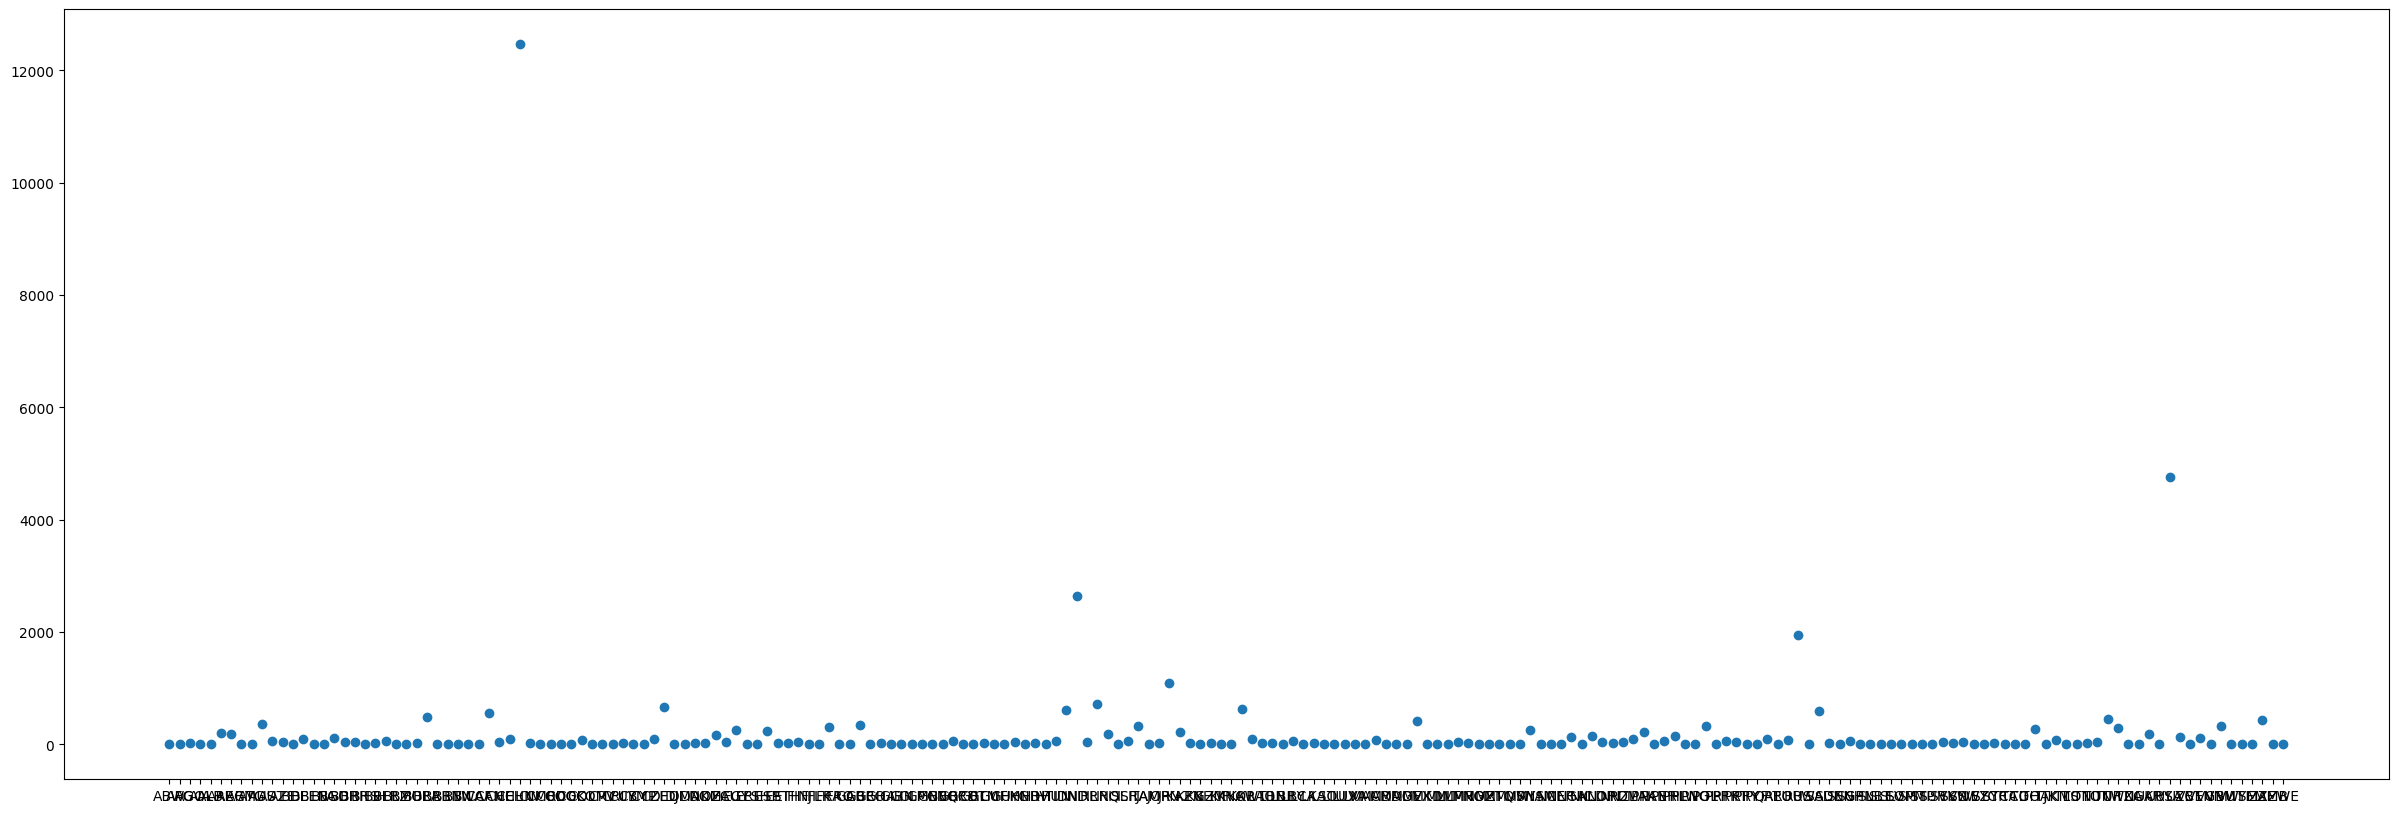

In [ ]:
fig = plt.figure(figsize = (30,10))
plt.scatter(df_co2_country["Code"],df_co2_country[2021])

**From above scatter chart we can see that the Co2 levels for most of the countries are the same and thus it is evident that most of the countries will fall in one bucket.**

#### Plot Trends for  Change in temp , CO2 , Wheat , Rice , maize , Soybean

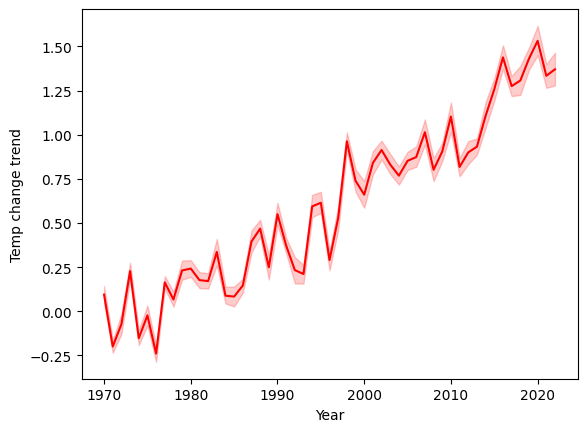

In [ ]:
sns.lineplot(x="Year", y="temp_change", data=df_temp_country , color='red')
# set label
plt.ylabel("Temp change trend")

plt.show()

In [ ]:
df_co2_country

Code        1970        1971        1972        1973        1974  \
0    ABW    0.081876    0.081889    0.095415    0.099630    0.089089   
1    AFG    1.739541    1.737823    1.715749    1.742813    2.198551   
2    AGO    8.952570    8.538308   10.388519   11.372301   11.833761   
3    AIA    0.002168    0.002168    0.002264    0.002109    0.002350   
5    ALB    4.814516    4.814828    5.498804    4.939869    5.319746   
..   ...         ...         ...         ...         ...         ...   
205  WSM    0.066463    0.066477    0.070846    0.085103    0.104300   
206  YEM    1.628338    1.641465    1.925847    2.343192    2.331963   
207  ZAF  185.640021  184.557782  191.212162  208.378907  215.229511   
208  ZMB    3.670158    3.827327    4.235602    4.549516    4.584571   
209  ZWE    9.669320    9.616592    9.164476   10.612888   10.303574   

           1975        1976        1977        1978  ...        2012  \
0      0.105139    0.096041    0.105305    0.106662  ...    1.618441   
1      2.037627    1.899895    2.288853    1.940763  ...   10.238064   
2     10.930423    7.317385   12.057774   14.239234  ...   24.186843   
3      0.002584    0.002434    0.002537    0.002902  ...    0.026023   
5      5.414438    5.785733    6.197670    6.820001  ...    4.574328   
..          ...         ...         ...         ...  ...         ...   
205    0.086264    0.085005    0.089722    0.089041  ...    0.274988   
206    2.233986    2.732128    2.777738    3.048519  ...   21.987575   
207  231.208302  245.600945  245.350447  223.326864  ...  459.783780   
208    4.756705    4.757159    4.305699    4.106261  ...    4.353041   
209    9.088979   10.059936    9.094003    8.747683  ...   12.458577   

           2013        2014        2015        2016        2017        2018  \
0      1.588689    1.615728    1.607879    1.578644    1.315458    1.347594   
1      8.484183    8.016290    8.361849    7.635914    8.145255    9.106997   
2     27.822325   30.407844   32.594130   30.691660   26.129882   24.048619   
3      0.027941    0.027896    0.028005    0.028340    0.029062    0.028223   
5      4.811345    5.134697    4.916119    4.619508    5.346925    5.314989   
..          ...         ...         ...         ...         ...         ...   
205    0.269788    0.270614    0.310972    0.323645    0.318352    0.309437   
206   28.766690   28.338664   14.247711   11.118668   10.695935   10.417670   
207  471.432912  482.539654  458.824044  458.689488  468.790178  467.184261   
208    4.560796    4.995499    5.314527    5.783061    7.265927    8.268376   
209   12.756765   12.647276   12.875895   11.312592   10.540316   12.730372   

           2019        2020        2021  
0      1.387156    1.144333    1.274134  
1      8.082724    8.183718    8.347669  
2     25.325994   23.055844   24.450057  
3      0.027580    0.022779    0.025409  
5      5.038618    4.706920    4.591114  
..          ...         ...         ...  
205    0.345618    0.347398    0.360230  
206   12.307957   11.607959   12.047245  
207  470.522116  427.815947  435.522812  
208    7.084711    6.618359    7.010965  
209   12.088218   11.443394   12.293227  

[206 rows x 53 columns]

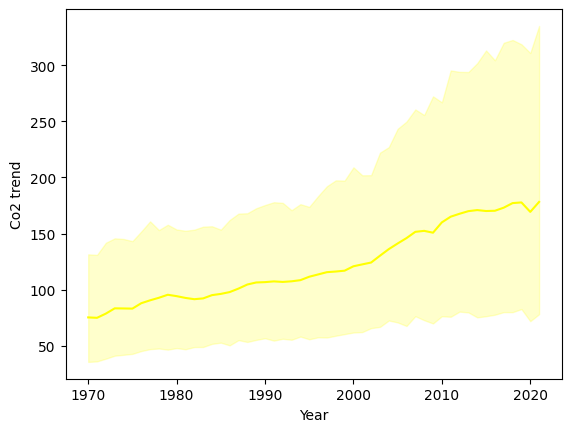

In [ ]:
sns.lineplot(x="Year", y="CO2", data=df_co2_,  color='yellow')

# set label
plt.ylabel("Co2 trend")

plt.show()

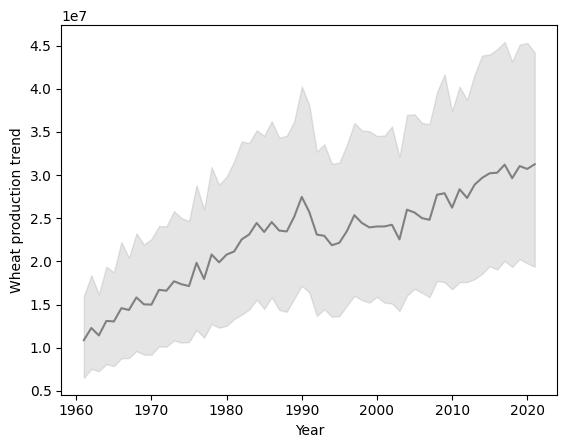

In [ ]:

sns.lineplot(x="Year", y="wheat", data=data_wheat, color='gray')

# set label
plt.ylabel("Wheat production trend")

plt.show()

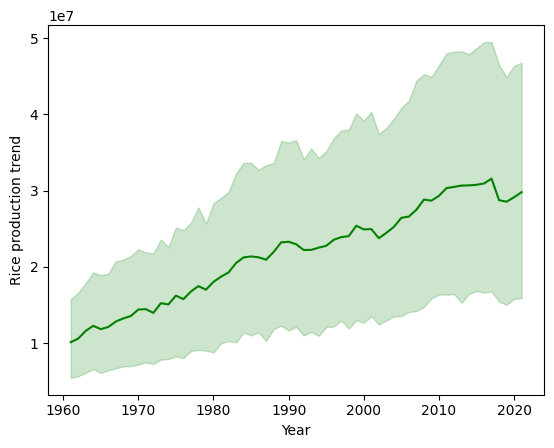

In [ ]:

sns.lineplot(x="Year", y="rice", data=data_rice, color='green')

# set label
plt.ylabel("Rice production trend")

plt.show()

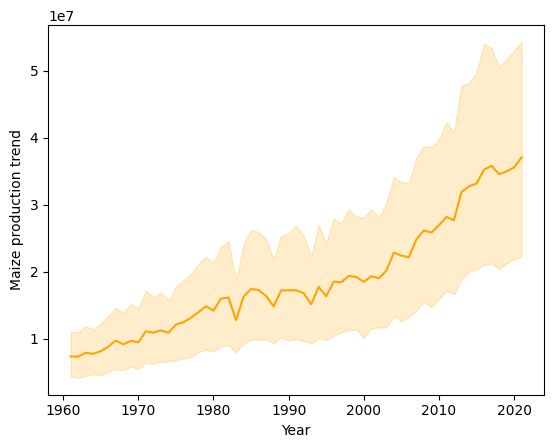

In [ ]:
sns.lineplot(x="Year", y="maize", data=data_maize, color='orange')

# set label
plt.ylabel("Maize production trend")

plt.show()

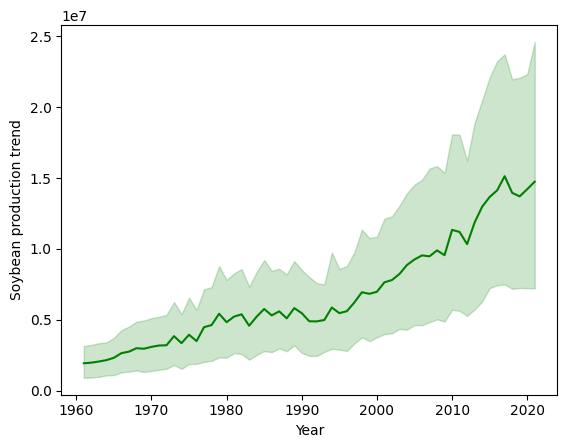

In [ ]:
sns.lineplot(x="Year", y="soybean", data=data_soybean, color='green')

# set label
plt.ylabel("Soybean production trend")

plt.show()

### Interative chart Using HVPlot

In [ ]:
df_interative.head()

Code  Year  Drought  Extreme temperature  Flood  Landslide  Storm  Wildfire  \
0  AFG  1980        0                    0      1          0      0         0   
1  AFG  1981        0                    0      0          0      0         0   
2  AFG  1982        0                    0      0          0      0         0   
3  AFG  1983        0                    0      0          0      0         0   
4  AFG  1984        0                    0      0          0      0         0   

          Area  Change_temp       C02  change_CO2  
0  Afghanistan        0.600  2.016268   -0.049944  
1  Afghanistan        0.483  2.269086    0.252818  
2  Afghanistan       -0.346  2.319190    0.050104  
3  Afghanistan        0.164  3.010081    0.690892  
4  Afghanistan        0.145  3.229588    0.219507

In [ ]:
unique_area = '", "'.join(map(str, df_interative["Area"].unique()))
unique_area = f'"{unique_area}"'
unique_area

'"Afghanistan", "Angola", "Anguilla", "Albania", "United Arab Emirates", "Argentina", "Armenia", "Antigua and Barbuda", "Australia", "Austria", "Azerbaijan", "Burundi", "Belgium", "Benin", "Burkina Faso", "Bangladesh", "Bulgaria", "Bahamas", "Bosnia and Herzegovina", "Belarus", "Belize", "Bolivia (Plurinational State of)", "Brazil", "Barbados", "Brunei Darussalam", "Bhutan", "Botswana", "Central African Republic", "Canada", "Switzerland", "Chile", "China, mainland", "CÃ´te d\'Ivoire", "Cameroon", "Democratic Republic of the Congo", "Congo", "Cook Islands", "Colombia", "Comoros", "Cabo Verde", "Costa Rica", "Cuba", "Cayman Islands", "Cyprus", "Czechia", "Germany", "Djibouti", "Dominica", "Denmark", "Dominican Republic", "Algeria", "Ecuador", "Egypt", "Eritrea", "Spain", "Estonia", "Ethiopia", "Finland", "Fiji", "France", "Gabon", "United Kingdom of Great Britain and Northern Ireland", "Georgia", "Ghana", "Guinea", "Gambia", "Guinea-Bissau", "Greece", "Grenada", "Guatemala", "Guyana", "C

In [ ]:
idf = df_interative.interactive()

In [ ]:
year = pn.widgets.IntSlider(name='Year', start=1980, end=2021, step=2)
country = pn.widgets.Select(name='Country', options=["Afghanistan", "Angola", "Anguilla", "Albania", "United Arab Emirates", "Argentina", "Armenia", "Antigua and Barbuda", "Australia", "Austria", "Azerbaijan", "Burundi", "Belgium", "Benin", "Burkina Faso", "Bangladesh", "Bulgaria", "Bahamas", "Bosnia and Herzegovina", "Belarus", "Belize", "Bolivia (Plurinational State of)", "Brazil", "Barbados", "Brunei Darussalam", "Bhutan", "Botswana", "Central African Republic", "Canada", "Switzerland", "Chile", "China, mainland", "CÃ´te d'Ivoire", "Cameroon", "Democratic Republic of the Congo", "Congo", "Cook Islands", "Colombia", "Comoros", "Cabo Verde", "Costa Rica", "Cuba", "Cayman Islands", "Cyprus", "Czechia", "Germany", "Djibouti", "Dominica", "Denmark", "Dominican Republic", "Algeria", "Ecuador", "Egypt", "Eritrea", "Spain", "Estonia", "Ethiopia", "Finland", "Fiji", "France", "Gabon", "United Kingdom of Great Britain and Northern Ireland", "Georgia", "Ghana", "Guinea", "Gambia", "Guinea-Bissau", "Greece", "Grenada", "Guatemala", "Guyana", "China, Hong Kong SAR", "Honduras", "Croatia", "Haiti", "Hungary", "Indonesia", "India", "Ireland", "Iran (Islamic Republic of)", "Iraq", "Iceland", "Israel", "Italy", "Jamaica", "Jordan", "Japan", "Kazakhstan", "Kenya", "Kyrgyzstan", "Cambodia", "Kiribati", "Saint Kitts and Nevis", "Republic of Korea", "Kuwait", "Lao People's Democratic Republic", "Lebanon", "Liberia", "Libya", "Saint Lucia", "Sri Lanka", "Lesotho", "Lithuania", "Luxembourg", "Latvia", "China, Macao SAR", "Morocco", "Republic of Moldova", "Madagascar", "Maldives", "Mexico", "North Macedonia", "Mali", "Myanmar", "Mongolia", "Mozambique", "Mauritania", "Mauritius", "Malawi", "Malaysia", "Namibia", "New Caledonia", "Niger", "Nigeria", "Nicaragua", "Netherlands (Kingdom of the)", "Norway", "Nepal", "New Zealand", "Oman", "Pakistan", "Panama", "Peru", "Philippines", "Palau", "Papua New Guinea", "Poland", "Democratic People's Republic of Korea", "Portugal", "Paraguay", "French Polynesia", "Qatar", "Romania", "Russian Federation", "Rwanda", "Saudi Arabia", "Sudan", "Senegal", "Saint Helena, Ascension and Tristan da Cunha", "Solomon Islands", "Sierra Leone", "El Salvador", "Somalia", "Sao Tome and Principe", "Suriname", "Slovakia", "Slovenia", "Sweden", "Eswatini", "Seychelles", "Syrian Arab Republic", "Turks and Caicos Islands", "Chad", "Togo", "Thailand", "Tajikistan", "Turkmenistan", "Timor-Leste", "Tonga", "Trinidad and Tobago", "Tunisia", "TÃ¼rkiye", "China, Taiwan Province of", "United Republic of Tanzania", "Uganda", "Ukraine", "Uruguay", "United States of America", "Uzbekistan", "Saint Vincent and the Grenadines", "Venezuela (Bolivarian Republic of)", "British Virgin Islands", "Viet Nam", "Vanuatu", "Samoa", "Yemen", "South Africa", "Zambia", "Zimbabwe"])
area = pn.widgets.Select(
    name='Area',
    options=["Afghanistan", "Angola", "Anguilla", "Albania", "United Arab Emirates", "Argentina", "Armenia", "Antigua and Barbuda", "Australia", "Austria", "Azerbaijan", "Burundi", "Belgium", "Benin", "Burkina Faso", "Bangladesh", "Bulgaria", "Bahamas", "Bosnia and Herzegovina", "Belarus", "Belize", "Bolivia (Plurinational State of)", "Brazil", "Barbados", "Brunei Darussalam", "Bhutan", "Botswana", "Central African Republic", "Canada", "Switzerland", "Chile", "China, mainland", "CÃ´te d'Ivoire", "Cameroon", "Democratic Republic of the Congo", "Congo", "Cook Islands", "Colombia", "Comoros", "Cabo Verde", "Costa Rica", "Cuba", "Cayman Islands", "Cyprus", "Czechia", "Germany", "Djibouti", "Dominica", "Denmark", "Dominican Republic", "Algeria", "Ecuador", "Egypt", "Eritrea", "Spain", "Estonia", "Ethiopia", "Finland", "Fiji", "France", "Gabon", "United Kingdom of Great Britain and Northern Ireland", "Georgia", "Ghana", "Guinea", "Gambia", "Guinea-Bissau", "Greece", "Grenada", "Guatemala", "Guyana", "China, Hong Kong SAR", "Honduras", "Croatia", "Haiti", "Hungary", "Indonesia", "India", "Ireland", "Iran (Islamic Republic of)", "Iraq", "Iceland", "Israel", "Italy", "Jamaica", "Jordan", "Japan", "Kazakhstan", "Kenya", "Kyrgyzstan", "Cambodia", "Kiribati", "Saint Kitts and Nevis", "Republic of Korea", "Kuwait", "Lao People's Democratic Republic", "Lebanon", "Liberia", "Libya", "Saint Lucia", "Sri Lanka", "Lesotho", "Lithuania", "Luxembourg", "Latvia", "China, Macao SAR", "Morocco", "Republic of Moldova", "Madagascar", "Maldives", "Mexico", "North Macedonia", "Mali", "Myanmar", "Mongolia", "Mozambique", "Mauritania", "Mauritius", "Malawi", "Malaysia", "Namibia", "New Caledonia", "Niger", "Nigeria", "Nicaragua", "Netherlands (Kingdom of the)", "Norway", "Nepal", "New Zealand", "Oman", "Pakistan", "Panama", "Peru", "Philippines", "Palau", "Papua New Guinea", "Poland", "Democratic People's Republic of Korea", "Portugal", "Paraguay", "French Polynesia", "Qatar", "Romania", "Russian Federation", "Rwanda", "Saudi Arabia", "Sudan", "Senegal", "Saint Helena, Ascension and Tristan da Cunha", "Solomon Islands", "Sierra Leone", "El Salvador", "Somalia", "Sao Tome and Principe", "Suriname", "Slovakia", "Slovenia", "Sweden", "Eswatini", "Seychelles", "Syrian Arab Republic", "Turks and Caicos Islands", "Chad", "Togo", "Thailand", "Tajikistan", "Turkmenistan", "Timor-Leste", "Tonga", "Trinidad and Tobago", "Tunisia", "TÃ¼rkiye", "China, Taiwan Province of", "United Republic of Tanzania", "Uganda", "Ukraine", "Uruguay", "United States of America", "Uzbekistan", "Saint Vincent and the Grenadines", "Venezuela (Bolivarian Republic of)", "British Virgin Islands", "Viet Nam", "Vanuatu", "Samoa", "Yemen", "South Africa", "Zambia", "Zimbabwe"])
yaxis = pn.widgets.RadioButtonGroup(
    name='Y axis',
    options=['C02', 'change_CO2'],
    button_type='success'
)

ipipeline = (
    idf[
        (idf.Area == area)
    ]

    .sort_values(by='Year')
    .reset_index(drop=True)
)


**Intractive table for Country**



In [ ]:
ipipeline.head()

In [ ]:
ipipeline_2 = (
    idf[
        (idf.Year == year) &
        (idf.Area == area)
    ]

    .sort_values(by='Year')
    .reset_index(drop=True)
)


**Intractive table for Country and Year**

In [ ]:
ipipeline_2.head()

## Clustering

In [ ]:
scaled_wheat=scaled_df(agg_wheat_cluster.iloc[:,1:])
scaled_rice=scaled_df(agg_rice_cluster.iloc[:,1:])
scaled_maize=scaled_df(agg_maize_cluster.iloc[:,1:])
scaled_soybean=scaled_df(agg_soybean_cluster.iloc[:,1:])

### For Wheat

In [ ]:
##agg_wheat_cluster.iloc[:,1:]

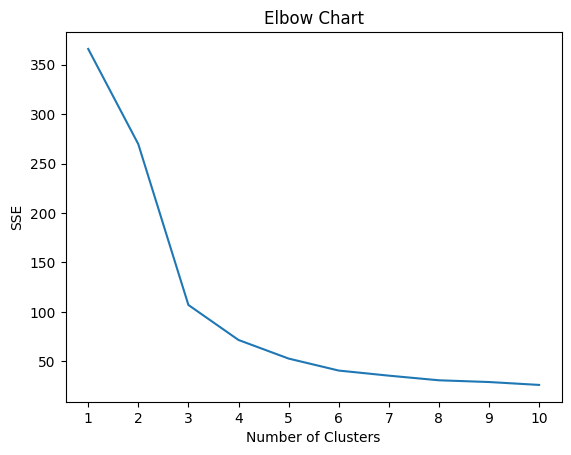

In [ ]:
sse_K=elbow_chart_K(scaled_wheat)

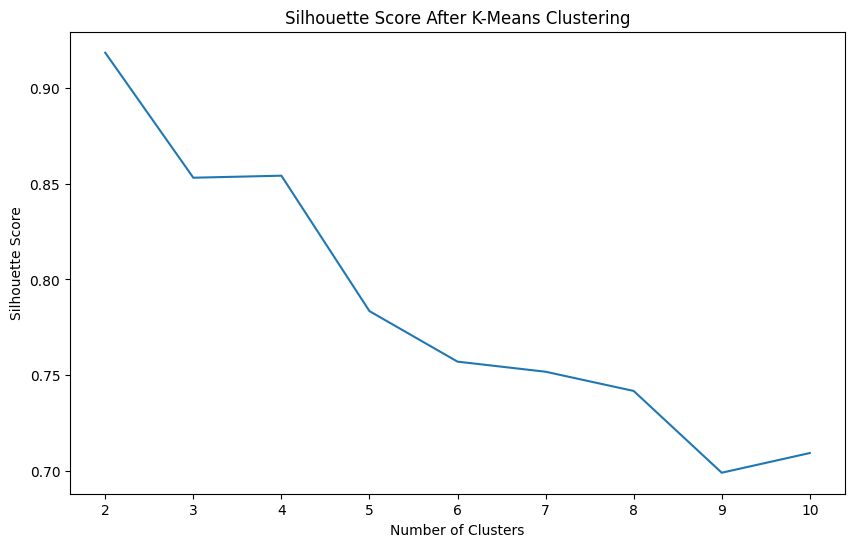

In [ ]:
silhoutteScoreK=silhoutte_Score_K(agg_wheat_cluster.iloc[:,1:])

In [ ]:
cluster_compare=pd.DataFrame.from_dict({"Cluster":[2,3,4,5,6,7,8,9,10], "Silhouette Score":list(silhoutteScoreK.values())})
cluster_compare

Cluster  Silhouette Score
0        2          0.918461
1        3          0.853151
2        4          0.854210
3        5          0.783453
4        6          0.757048
5        7          0.751781
6        8          0.741740
7        9          0.699012
8       10          0.709299

From the above elbow chart we select number of cluster=4

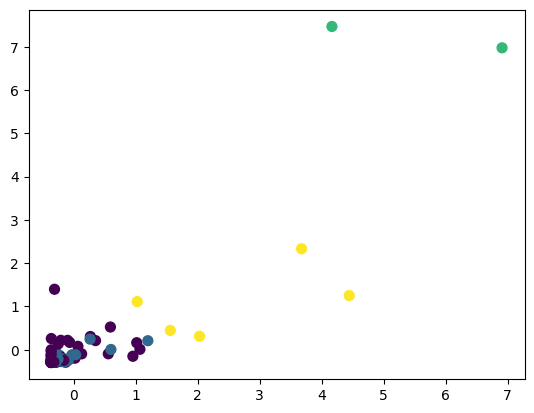

In [ ]:
label_kmeans_wheat=cluster_k(scaled_wheat,4)

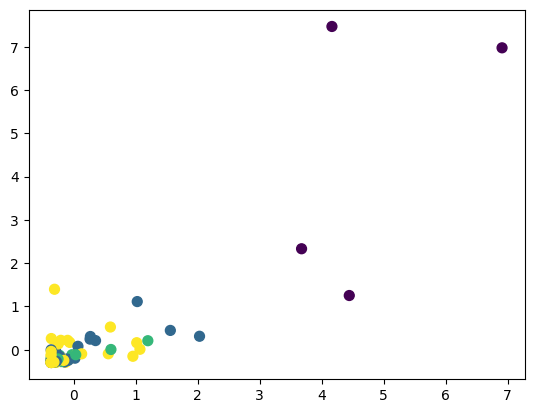

In [ ]:
centers_EM_wheat, labels_EM_wheat = cluster_EM(scaled_wheat, 4, rseed=0)

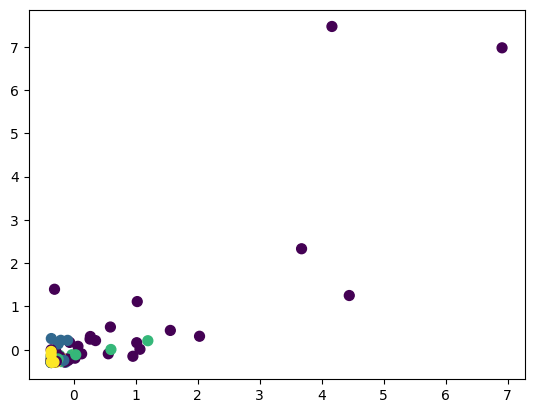

In [ ]:
labels_spectral_wheat = cluster_spectral(scaled_wheat, 4)

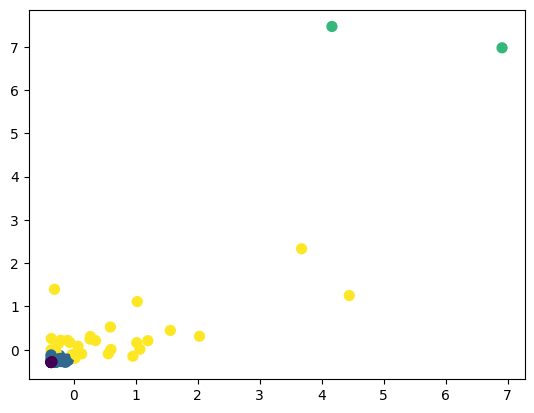

In [ ]:
label_gmm_wheat=cluster_GMM(scaled_wheat, 4)

In [ ]:
label_kmeans_wheat

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 3, 1, 0,
       2, 0, 0, 0, 0, 1, 3, 1, 0, 0, 0, 1, 0, 1, 1, 1, 3, 0, 1, 0, 0, 0,
       1, 0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 2, 1, 0, 0, 0, 0, 0], dtype=int32)

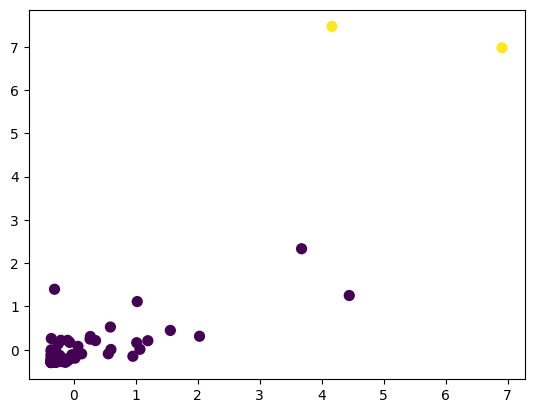

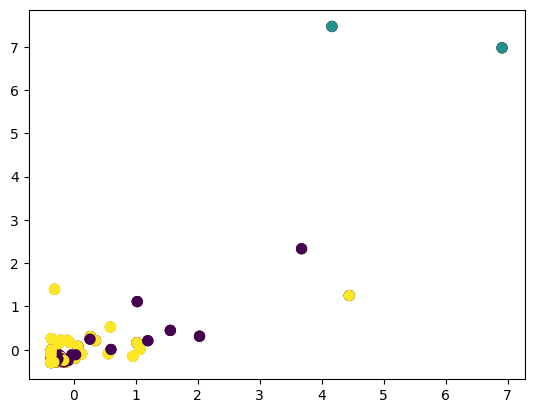

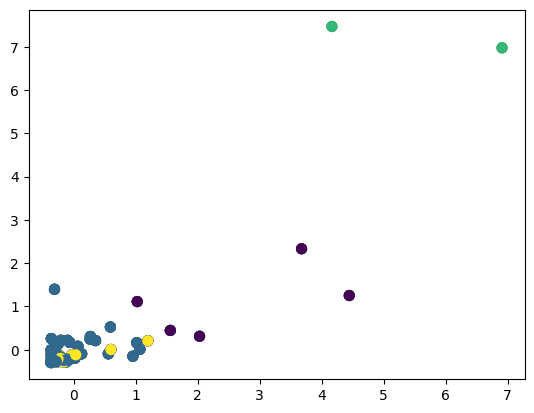

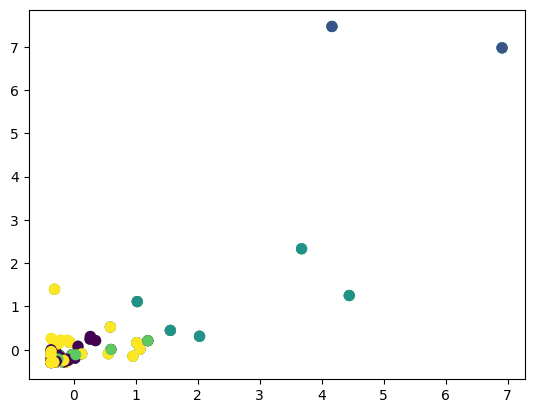

Comparision of different clustering algorithm for wheat
   number_of_Clusters   K-means  Spectral        EM       GMM
0                   2  0.840731  0.381831  0.432272  0.286806
1                   3  0.495976  0.173994  0.505524  0.218687
2                   4  0.541642  0.198595  0.446097  0.032585
3                   5  0.454901  0.293196  0.454901  0.004077


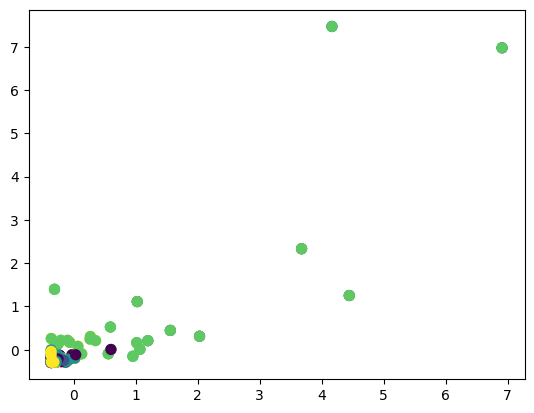

In [ ]:
comparision=range_diff_clusters(2,5,scaled_wheat)
print("Comparision of different clustering algorithm for wheat")
print(comparision)

###  For Rice

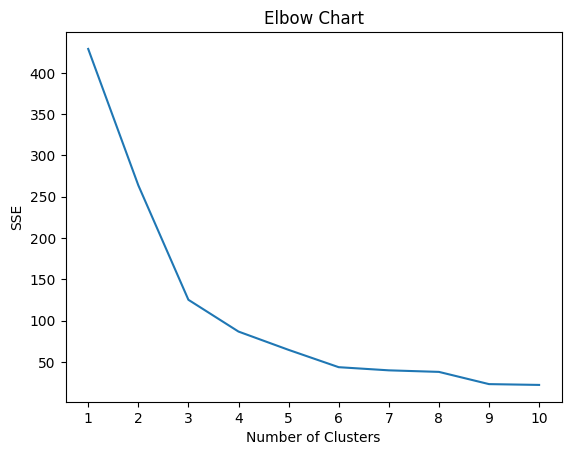

In [ ]:
sse_K_rice=elbow_chart_K(scaled_rice)

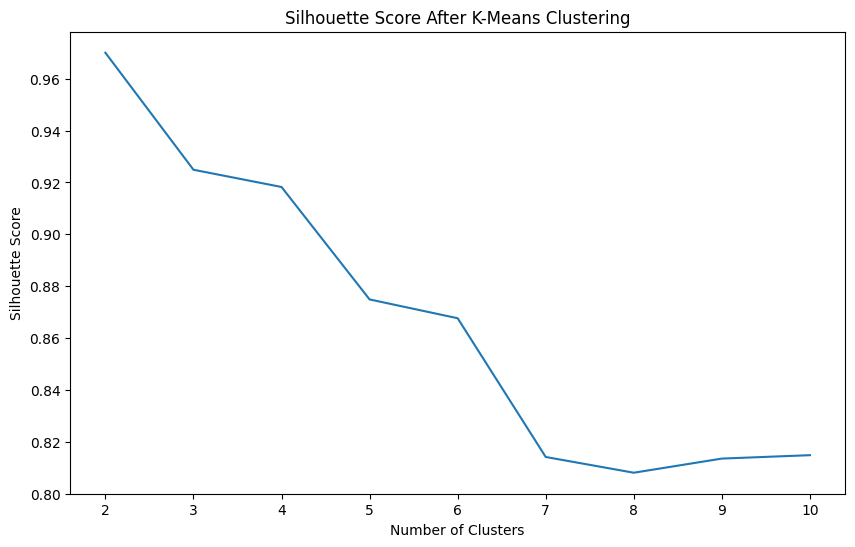

In [ ]:
silhoutteScoreK_rice=silhoutte_Score_K(agg_rice_cluster.iloc[:,1:])

In [ ]:
cluster_compare_rice=pd.DataFrame.from_dict({"Cluster":[2,3,4,5,6,7,8,9,10], "Silhouette Score":list(silhoutteScoreK_rice.values())})
cluster_compare_rice

Cluster  Silhouette Score
0        2          0.970011
1        3          0.924888
2        4          0.918236
3        5          0.874875
4        6          0.867626
5        7          0.814127
6        8          0.808055
7        9          0.813507
8       10          0.814821

From the above elbow chart we select number of cluster=4

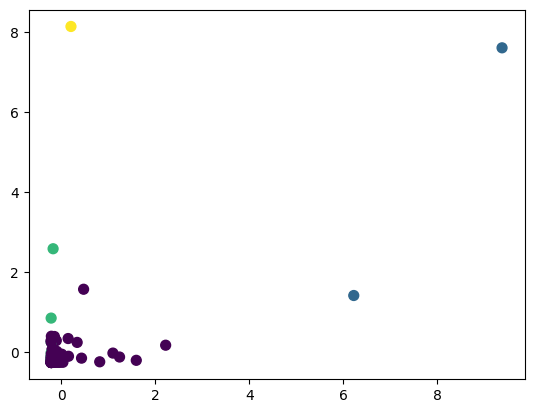

In [ ]:
label_kmeans_rice=cluster_k(scaled_rice,4)

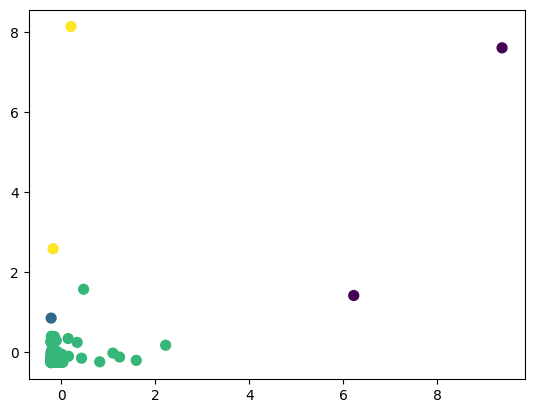

In [ ]:
centers_EM_rice, labels_EM_rice = cluster_EM(scaled_rice, 4, rseed=0)

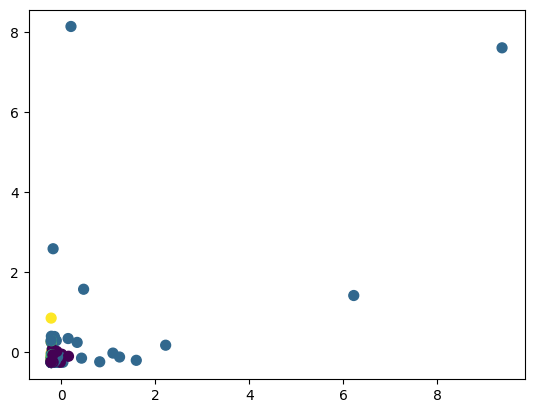

In [ ]:
labels_spectral_rice = cluster_spectral(scaled_rice, 4)

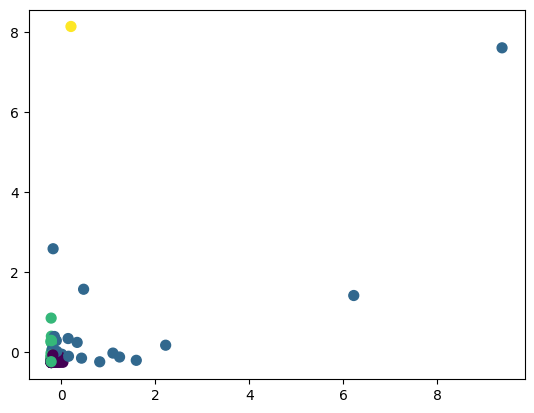

In [ ]:
label_gmm_rice=cluster_GMM(scaled_rice, 4)

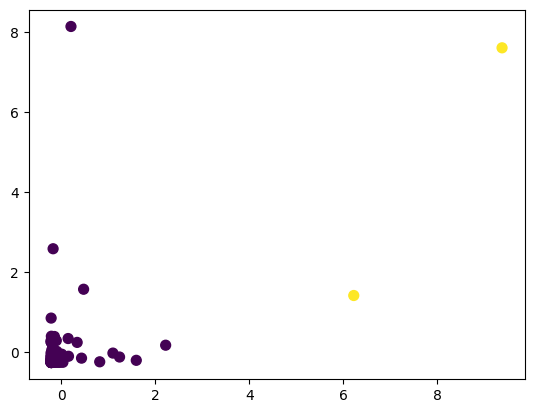

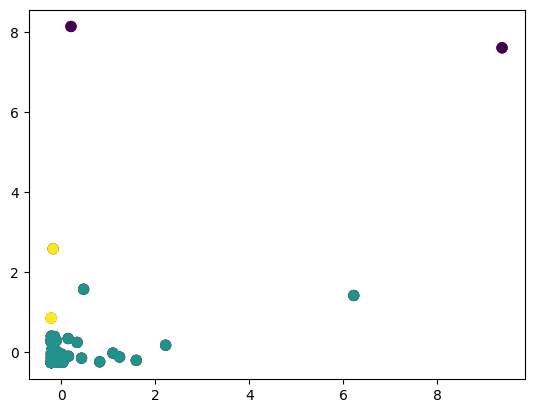

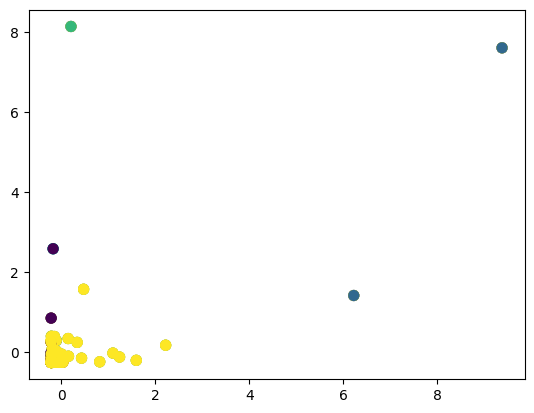

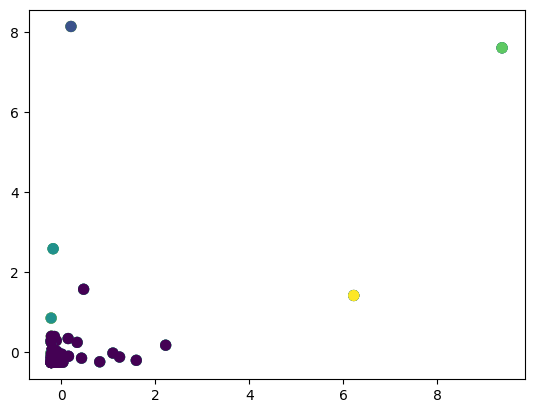

Comparision of different clustering algorithm for rice
   number_of_Clusters   K-means  Spectral        EM       GMM
0                   2  0.857944  0.669737  0.674165  0.340795
1                   3  0.721436  0.242872  0.734708  0.304061
2                   4  0.735469  0.116976  0.516600  0.309489
3                   5  0.734208  0.172309  0.517459  0.034651


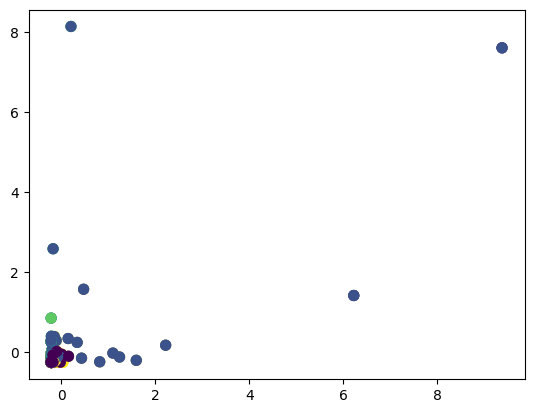

In [ ]:
comparision_rice=range_diff_clusters(2,5,scaled_rice)
print("Comparision of different clustering algorithm for rice")
print(comparision_rice)

In [ ]:
find_silhouette_score(scaled_rice,label_kmeans_rice)

0.7354691856321385

### For Maize

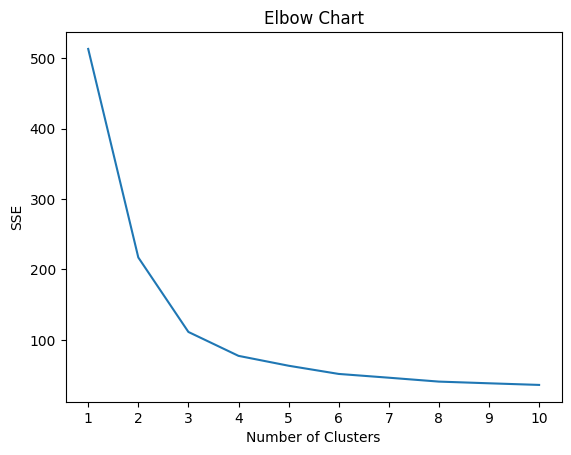

In [ ]:
sse_K_maize=elbow_chart_K(scaled_maize)

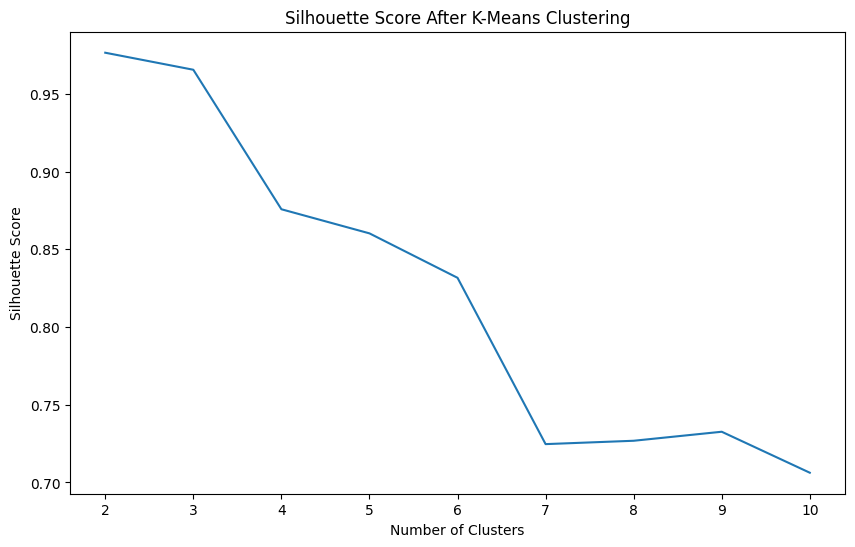

In [ ]:
silhoutteScoreK_maize=silhoutte_Score_K(agg_maize_cluster.iloc[:,1:])

In [ ]:
cluster_compare_maize=pd.DataFrame.from_dict({"Cluster":[2,3,4,5,6,7,8,9,10], "Silhouette Score":list(silhoutteScoreK_maize.values())})
cluster_compare_maize

Cluster  Silhouette Score
0        2          0.976539
1        3          0.965581
2        4          0.875824
3        5          0.860304
4        6          0.831709
5        7          0.724694
6        8          0.726855
7        9          0.732657
8       10          0.706290

From the above elbow chart we select number of cluster=4

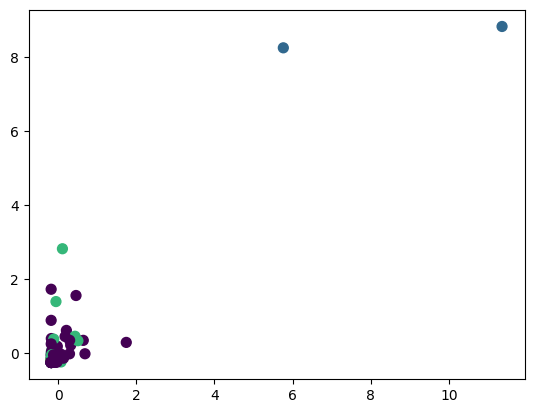

In [ ]:
label_kmeans_maize = cluster_k(scaled_maize,4)

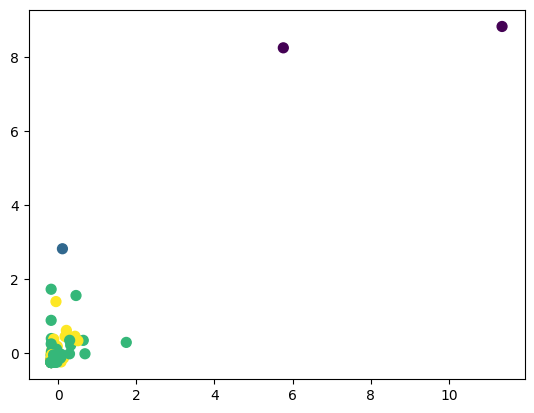

In [ ]:
centers_EM_maize, labels_EM_maize = cluster_EM(scaled_maize, 4, rseed=0)

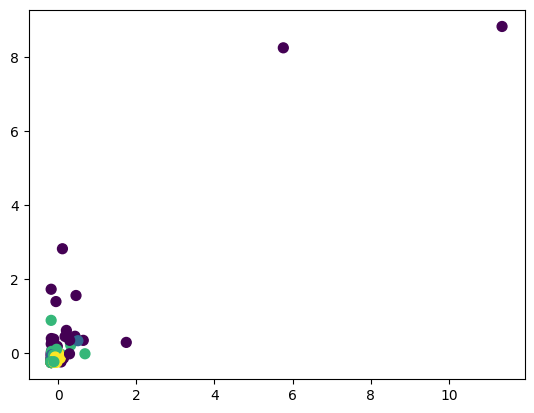

In [ ]:
labels_spectral_maize = cluster_spectral(scaled_maize, 4)

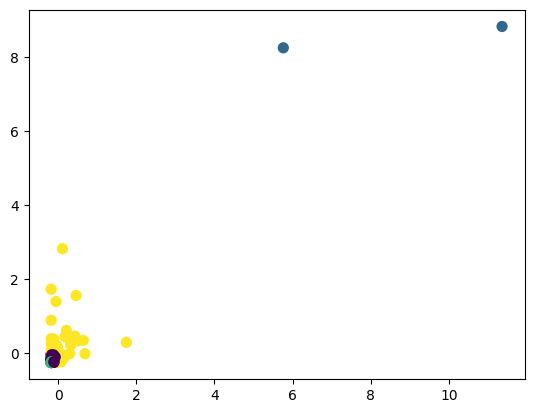

In [ ]:
label_gmm_maize =cluster_GMM(scaled_maize, 4)

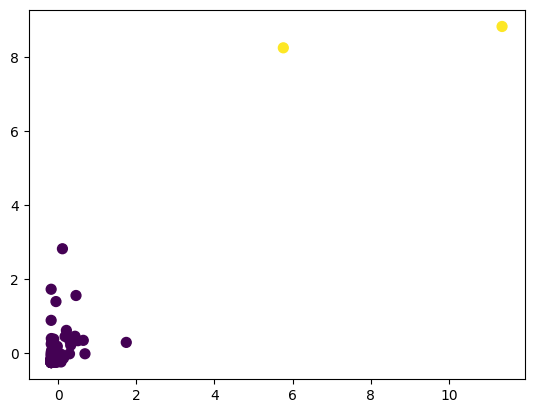

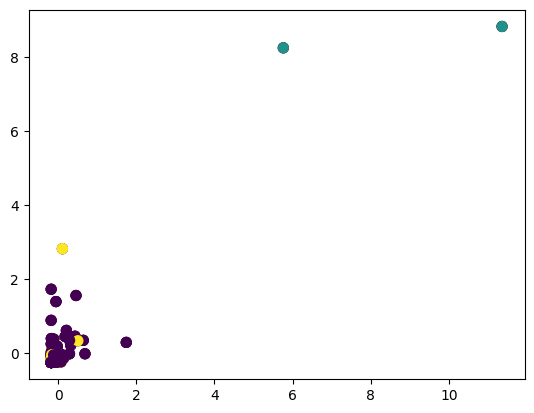

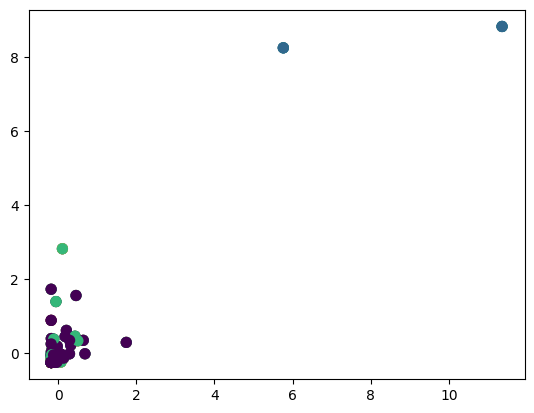

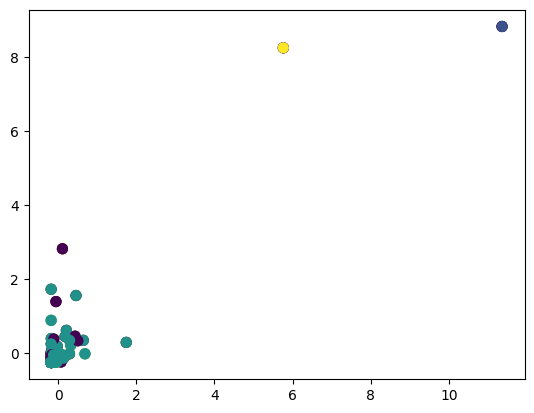

Comparision of different clustering algorithm for maize
   number_of_Clusters   K-means  Spectral        EM       GMM
0                   2  0.904376  0.504259  0.655413  0.904376
1                   3  0.627613  0.174353  0.624317  0.127487
2                   4  0.565255  0.149971  0.509300  0.023068
3                   5  0.557148  0.084300  0.523757 -0.021500


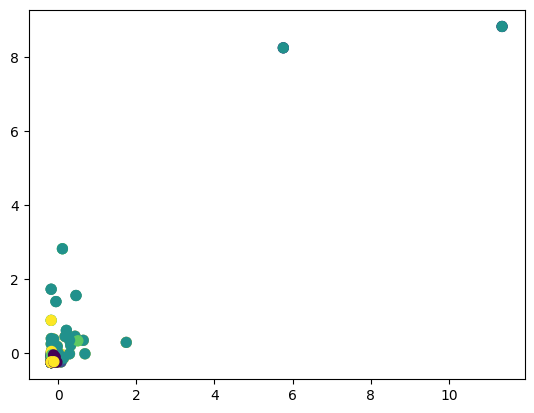

In [ ]:
comparision_maize=range_diff_clusters(2,5,scaled_maize)
print("Comparision of different clustering algorithm for maize")
print(comparision_maize)

In [ ]:
find_silhouette_score(scaled_maize,label_kmeans_maize)

0.5652550787005228

### For Soybean

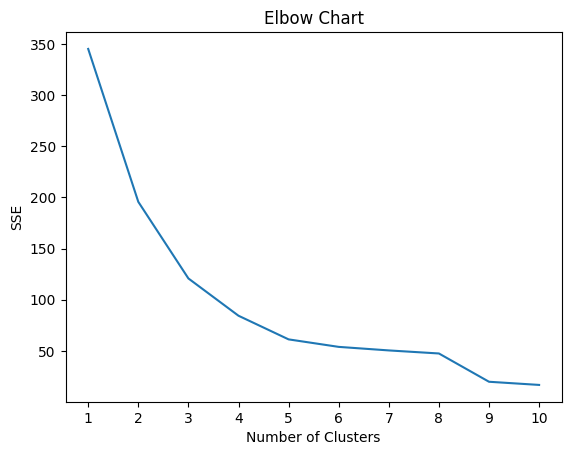

In [ ]:
sse_K_soybean=elbow_chart_K(scaled_soybean)

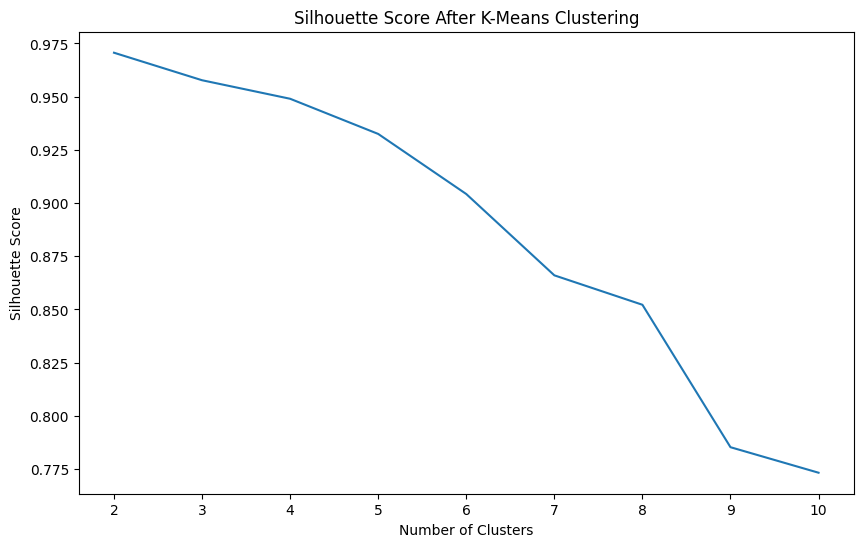

In [ ]:
silhoutteScoreK_soybean =silhoutte_Score_K(agg_soybean_cluster.iloc[:,1:])

In [ ]:
cluster_compare_soybean=pd.DataFrame.from_dict({"Cluster":[2,3,4,5,6,7,8,9,10], "Silhouette Score":list(silhoutteScoreK_soybean.values())})
cluster_compare_soybean

Cluster  Silhouette Score
0        2          0.970625
1        3          0.957693
2        4          0.948987
3        5          0.932460
4        6          0.904223
5        7          0.866019
6        8          0.852190
7        9          0.785262
8       10          0.773270

From the above elbow chart we select number of cluster=4

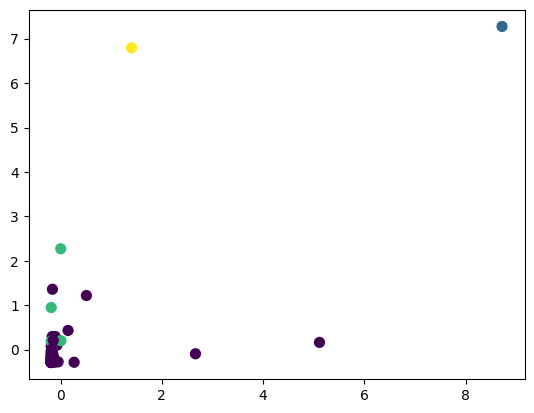

In [ ]:
label_kmeans_soybean = cluster_k(scaled_soybean,4)

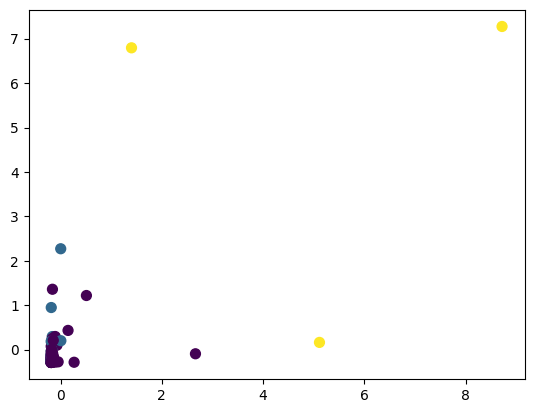

In [ ]:
centers_EM_soybean, labels_EM_soybean = cluster_EM(scaled_soybean, 4, rseed=0)

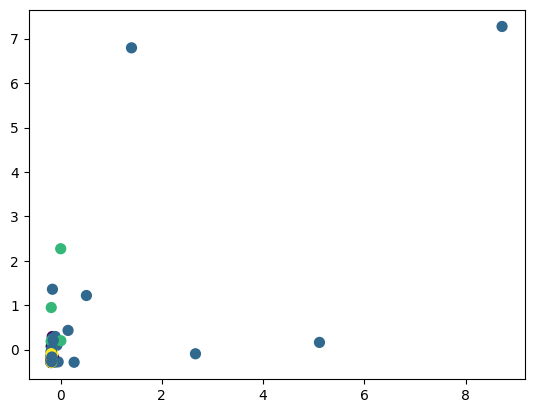

In [ ]:
labels_spectral_soybean = cluster_spectral(scaled_soybean, 4)

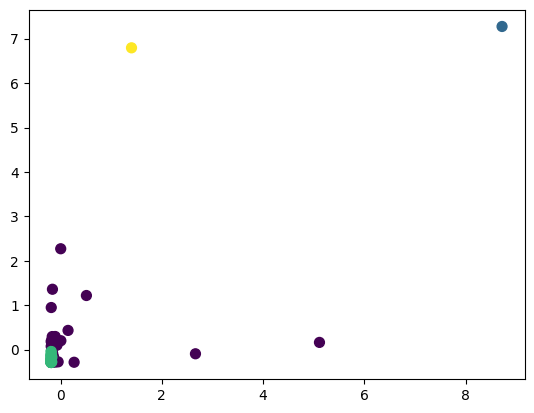

In [ ]:
label_gmm_soybean =cluster_GMM(scaled_soybean, 4)

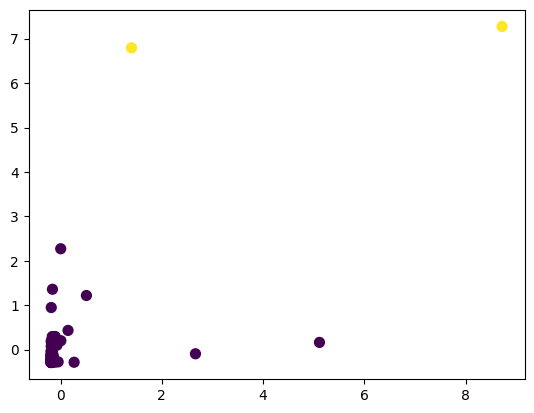

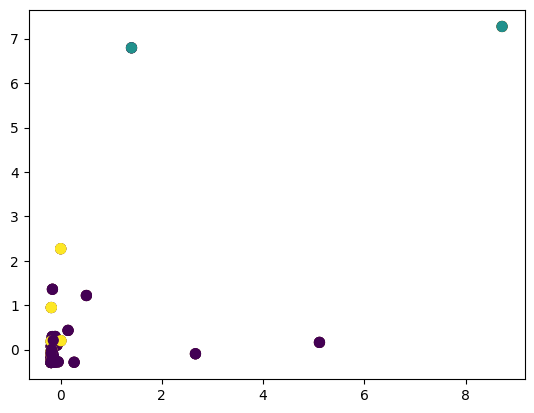

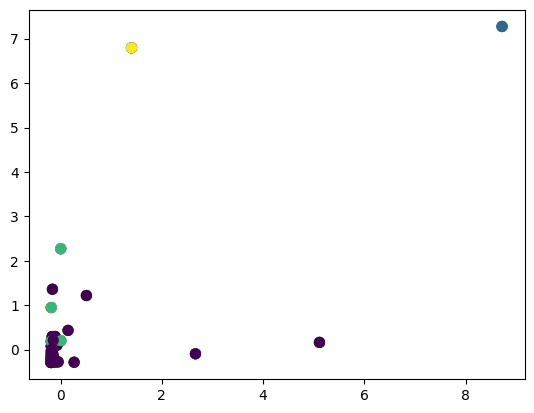

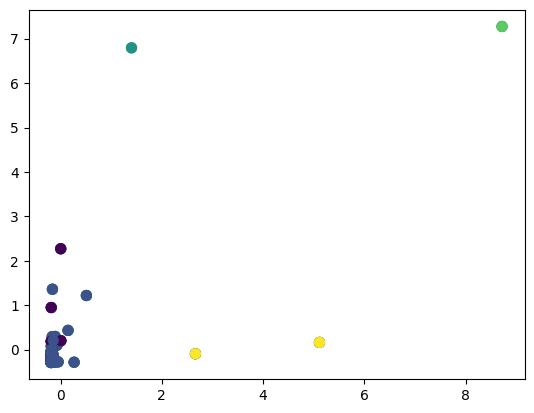

Comparision of different clustering algorithm for soybean
   number_of_Clusters   K-means  Spectral        EM       GMM
0                   2  0.851981  0.449646  0.491649  0.869167
1                   3  0.557520  0.108060  0.571540  0.241094
2                   4  0.554612  0.127997  0.536350  0.158342
3                   5  0.583165  0.127801  0.532994  0.009429


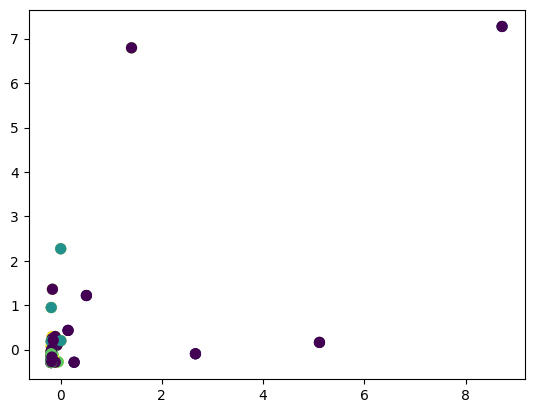

In [ ]:
comparision_soybean=range_diff_clusters(2,5,scaled_soybean)
print("Comparision of different clustering algorithm for soybean")
print(comparision_soybean)

In [ ]:
find_silhouette_score(scaled_soybean,label_kmeans_soybean)

0.5546120453591463

In [ ]:
agg_wheat_cluster.iloc[:,1:]

avg_crop_production     avg_CO2  avg_temp_change
0           2.984918e+06    3.694654         0.568885
1           5.345945e+03   16.928579         0.563038
2           3.702093e+05    5.101307         0.513096
3           5.768000e+02  108.994129         0.586956
4           1.175470e+07  134.887947         0.369500
..                   ...         ...              ...
117         4.056652e+02  117.661874         0.467231
118         1.266026e+05   11.681908         0.101404
119         1.984100e+06  343.383799         0.525212
120         8.288414e+04    3.687651         0.480365
121         1.567524e+05   12.167378         0.253250

[122 rows x 3 columns]

## Fractal Clustering

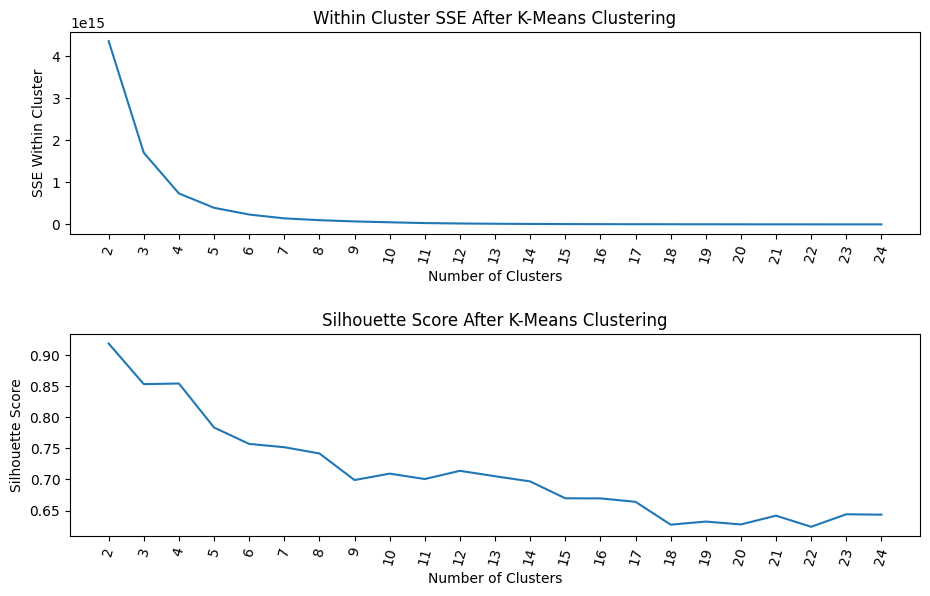

In [ ]:
plot_cluster(agg_wheat_cluster, max_loop=25)

In [ ]:
def fractal_distance(x1, y1, x2, y2, z1, z2, num_divisions):
  print(x1,y1,x2,y2,z1,z2)
  """
  Calculates the fractal distance between two points in a 2D space using the
  box-counting method.
  """
  # Create a grid with num_divisions x num_divisions boxes
  x = np.linspace(min(x1, x2), max(x1, x2), num_divisions + 1)
  y = np.linspace(min(y1, y2), max(y1, y2), num_divisions + 1)
  z=  np.linspace(min(z1, z2), max(z1, z2), num_divisions + 1)
  grid = np.zeros((num_divisions, num_divisions))
  # Place a point at each of the two endpoints
  x1_idx = np.argmin(np.abs(x - x1))
  y1_idx = np.argmin(np.abs(y - y1))
  z1_idx = np.argmin(np.abs(z - z1))
  grid[z1_idx,y1_idx, x1_idx] = 1
  x2_idx = np.argmin(np.abs(x - x2))
  y2_idx = np.argmin(np.abs(y - y2))
  z2_idx = np.argmin(np.abs(z - z2))
  grid[z2_idx,y2_idx, x2_idx] = 1
  # Count the number of boxes that contain at least one point
  num_boxes_with_points = 0
  for i in range(num_divisions):
    for j in range(num_divisions):
      for k in range(num_divisions):
        if np.sum(grid[i:i+2, j:j+2,k:k+2]) > 0:
          num_boxes_with_points += 1
  # Calculate the fractal dimension and use it to estimate the length of the path
  fractal_dim = np.log(num_boxes_with_points) / np.log(2)
  fractal_length = (2 ** fractal_dim) * ((x2 - x1) ** 2 + (y2 - y1) ** 2+(z2 - z1) ** 2) **0.5
  return fractal_length


In [ ]:
class CustomKMeans(KMeans):
    def __init__(self, n_clusters=8, init='k-means++', max_iter=300):
        super().__init__(n_clusters=n_clusters, init=init, max_iter=max_iter)

    def _transform(self, X):
        print(X)
        return fractal_distance(X, self.cluster_centers_)

In [ ]:
def fractal_cluster(df, clusters=2):
    """
    Applying K-Means with the optimal number of clusters identified
    # """
    # try:
    #     df.drop('cluster', axis=1, inplace=True)
    # except:
    #     next
    X = df.iloc[:,1:]
    rb = StandardScaler()
    X_rb = rb.fit_transform(X)
    #X_rb=df
    kmeans = CustomKMeans(clusters)
    kmeans.fit(X_rb)
    score = metrics.silhouette_score(X_rb, kmeans.labels_, random_state=10)
    df['cluster'] = kmeans.labels_
    sse_within_cluster = kmeans.inertia_

    print("clustering performance")
    print("-----------------------------------")
    print("silhouette score: " + str(round(score,2)))
    print("sse withing cluster: " + str(round(sse_within_cluster)))

    return df

### For Wheat

In [ ]:
first_trial = fractal_cluster(agg_wheat_cluster, clusters=6)

clustering performance
-----------------------------------
silhouette score: 0.48
sse withing cluster: 40


In [ ]:
first_trial

Code  avg_crop_production     avg_CO2  avg_temp_change  cluster
0    AFG         2.984918e+06    3.694654         0.568885        2
1    AGO         5.345945e+03   16.928579         0.563038        2
2    ALB         3.702093e+05    5.101307         0.513096        2
3    ARE         5.768000e+02  108.994129         0.586956        2
4    ARG         1.175470e+07  134.887947         0.369500        2
..   ...                  ...         ...              ...      ...
117  VEN         4.056652e+02  117.661874         0.467231        2
118  YEM         1.266026e+05   11.681908         0.101404        2
119  ZAF         1.984100e+06  343.383799         0.525212        2
120  ZMB         8.288414e+04    3.687651         0.480365        2
121  ZWE         1.567524e+05   12.167378         0.253250        2

[122 rows x 5 columns]

In [ ]:
cluster_perf_df = (
    first_trial
    .groupby('cluster')
    .agg({"avg_crop_production"	:"mean", "avg_CO2":"mean", "avg_temp_change":"mean", "Code":"count"})
    .sort_values('avg_crop_production')
    .reset_index()
)

cluster_perf_df

cluster  avg_crop_production      avg_CO2  avg_temp_change  Code
0        2         8.205838e+05    73.451603         0.466625    58
1        5         1.985132e+06    83.977576         0.826238    32
2        1         2.693455e+06    61.558542         1.287897    21
3        0         1.965702e+07   429.079777         0.635657     7
4        4         5.640481e+07  1399.342946         0.919197     2
5        3         7.523672e+07  5038.313775         0.620894     2

In [ ]:
cluster_selected1=int(cluster_perf_df[cluster_perf_df["Code"]==cluster_perf_df["Code"].max()]["cluster"])

In [ ]:
agg_df1_sub = agg_wheat_cluster.query(f"cluster =={cluster_selected1}").reset_index(drop=True)

In [ ]:
#agg_df1_sub

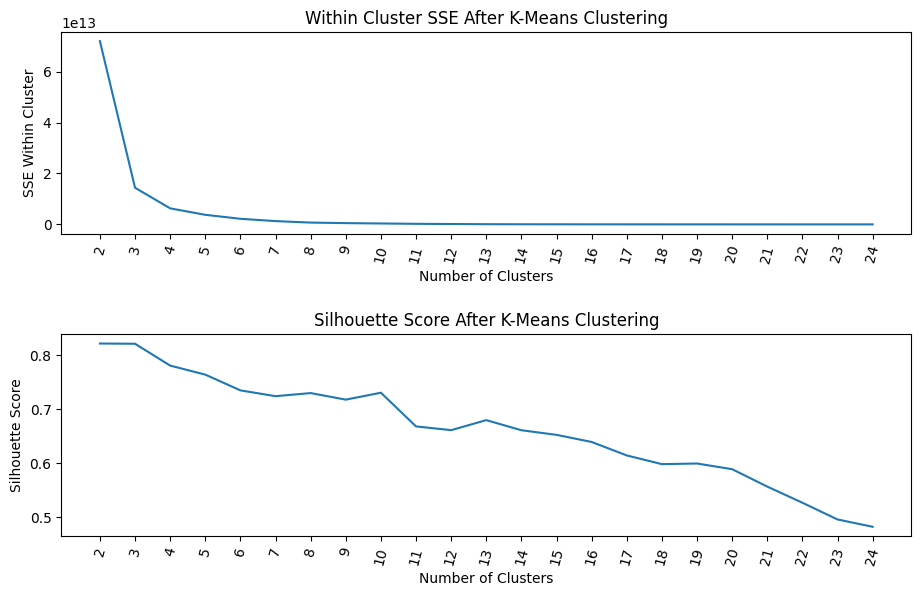

In [ ]:
plot_cluster(agg_df1_sub, max_loop=25)

In [ ]:
second_trial = fractal_cluster(agg_df1_sub, clusters=3)

clustering performance
-----------------------------------
silhouette score: 0.48
sse withing cluster: 82


In [ ]:
cluster_perf_df2 = (
    second_trial
    .groupby('cluster')
    .agg({"avg_crop_production"	:"mean", "avg_CO2":"mean", "avg_temp_change":"mean", "Code":"count"})
    .sort_values('avg_crop_production')
    .reset_index()
)

cluster_perf_df2

cluster  avg_crop_production     avg_CO2  avg_temp_change  Code
0        0         2.736558e+05   39.288633         0.525623    38
1        1         4.829790e+05   23.660580         0.281609    13
2        2         4.416601e+06  351.376769         0.489951     7

**Golden cluster picking**

In [ ]:
selected_clus_wheat = golden_cluster_selector(cluster_perf_df2,'avg_crop_production','avg_CO2')
print("Selected cluster is:",selected_clus_wheat)
golden_cluster_wheat=second_trial[second_trial["cluster"]==selected_clus_wheat]["Code"].values

print("Countries in golden cluster are:")
for cont in  golden_cluster_wheat:
  print(data_country_code[data_country_code["Code"]==cont]["Country"].values[0])

Selected cluster is: 2
Countries in golden cluster are:
Argentina
Bulgaria
Brazil
Egypt
Japan
Mexico
South Africa


### For Rice

In [ ]:
first_trial_rice = fractal_cluster(agg_rice_cluster, clusters=7)

clustering performance
-----------------------------------
silhouette score: 0.56
sse withing cluster: 28


In [ ]:
first_trial_rice

Code  avg_crop_production     avg_CO2  avg_temp_change  cluster
0    AFG         4.100169e+05    3.694654         0.568885        0
1    AGO         1.377833e+04   16.928579         0.563038        0
2    ALB         5.061154e+03    5.101307         0.513096        0
3    ARG         8.244516e+05  134.887947         0.369500        0
4    ARM         0.000000e+00    4.751678         1.283846        5
..   ...                  ...         ...              ...      ...
138  VEN         6.483375e+05  117.661874         0.467231        0
139  VNM         2.655659e+07   84.600465         0.476538        6
140  ZAF         2.988987e+03  343.383799         0.525212        0
141  ZMB         1.706503e+04    3.687651         0.480365        0
142  ZWE         8.377127e+02   12.167378         0.253250        0

[143 rows x 5 columns]

In [ ]:
cluster_perf_df_rice = (
    first_trial_rice
    .groupby('cluster')
    .agg({"avg_crop_production"	:"mean", "avg_CO2":"mean", "avg_temp_change":"mean", "Code":"count"})
    .sort_values('avg_crop_production')
    .reset_index()
)

cluster_perf_df_rice

cluster  avg_crop_production      avg_CO2  avg_temp_change  Code
0        2         0.000000e+00    88.722426         2.129399    18
1        5         2.754796e+05   179.351008         1.009936    23
2        0         9.132188e+05    45.183736         0.527222    93
3        3         7.695164e+06  5203.567084         0.574615     1
4        6         2.658114e+07   279.360500         0.457093     6
5        4         1.174630e+08  1037.293246         0.353827     1
6        1         1.750257e+08  4873.060466         0.667173     1

In [ ]:
cluster_selected_rice=int(cluster_perf_df_rice[cluster_perf_df_rice["Code"]==cluster_perf_df_rice["Code"].max()]["cluster"])

In [ ]:
cluster_selected_rice

0

In [ ]:
agg_df_rice_sub = agg_rice_cluster.query(f"cluster =={cluster_selected_rice}").reset_index(drop=True)

In [ ]:
#agg_df1_sub

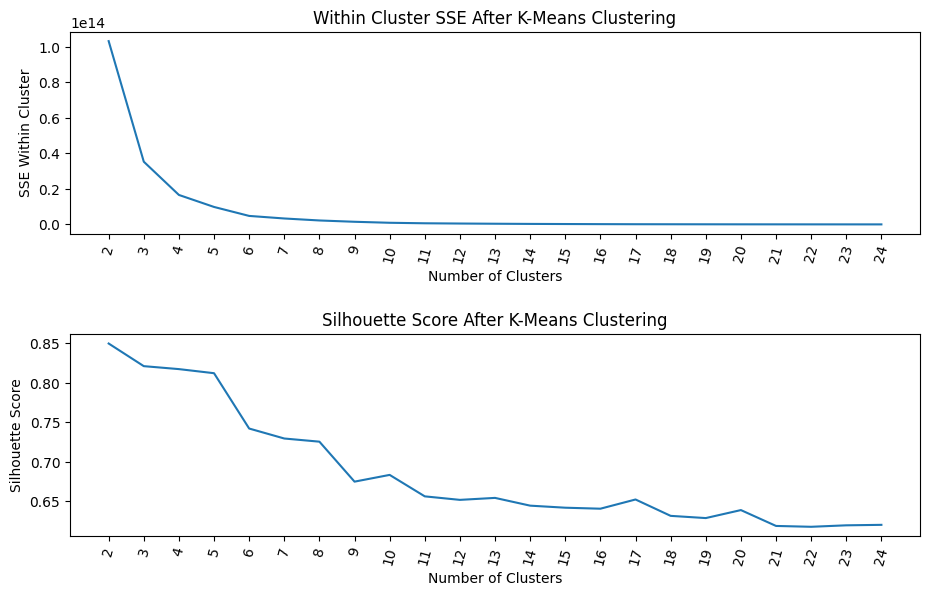

In [ ]:
plot_cluster(agg_df_rice_sub, max_loop=25)

In [ ]:
second_trial_rice = fractal_cluster(agg_df_rice_sub, clusters=5)

clustering performance
-----------------------------------
silhouette score: 0.41
sse withing cluster: 74


In [ ]:
cluster_perf_df_rice_2 = (
    second_trial_rice
    .groupby('cluster')
    .agg({"avg_crop_production"	:"mean", "avg_CO2":"mean", "avg_temp_change":"mean", "Code":"count"})
    .sort_values('avg_crop_production')
    .reset_index()
)

cluster_perf_df_rice_2

cluster  avg_crop_production     avg_CO2  avg_temp_change  Code
0        0         1.222447e+05   18.571499         0.397668    28
1        3         3.074912e+05  302.515439         0.561502     5
2        2         4.007191e+05   17.928163         0.608437    48
3        1         3.582723e+06   62.208999         0.454532     9
4        4         9.496672e+06  249.691822         0.597885     3

**Golden Cluster picking**

In [ ]:
selected_clus = golden_cluster_selector(cluster_perf_df_rice_2,'avg_crop_production','avg_CO2')
golden_cluster_rice=second_trial_rice[second_trial_rice["cluster"]==selected_clus]["Code"].values
print("Golden cluster is :-",selected_clus)
print("Countries in golden cluster are:")
for cont in  golden_cluster_rice:
  print(data_country_code[data_country_code["Code"]==cont]["Country"].values[0])

Golden cluster is :- 4
Countries in golden cluster are:
Brazil
Korea, Republic of
Philippines


### For maize

In [ ]:
first_trial_maize = fractal_cluster(agg_maize_cluster, clusters=7)

clustering performance
-----------------------------------
silhouette score: 0.46
sse withing cluster: 37


In [ ]:
first_trial_maize

Code  avg_crop_production     avg_CO2  avg_temp_change  cluster
0    AFG         4.486691e+05    3.694654         0.568885        0
1    AGO         7.709462e+05   16.928579         0.563038        0
2    ALB         2.786323e+05    5.101307         0.513096        0
3    ARE         5.913063e+03  134.446592         0.805625        6
4    ARG         1.805753e+07  134.887947         0.369500        0
..   ...                  ...         ...              ...      ...
166  VUT         7.127769e+02    0.112462         0.412962        0
167  YEM         5.284263e+04   11.681908         0.101404        0
168  ZAF         9.875095e+06  343.383799         0.525212        0
169  ZMB         1.535575e+06    3.687651         0.480365        0
170  ZWE         1.476725e+06   12.167378         0.253250        0

[171 rows x 5 columns]

In [ ]:
cluster_perf_df_maize = (
    first_trial_maize
    .groupby('cluster')
    .agg({"avg_crop_production"	:"mean", "avg_CO2":"mean", "avg_temp_change":"mean", "Code":"count"})
    .sort_values('avg_crop_production')
    .reset_index()
)

cluster_perf_df_maize

cluster  avg_crop_production      avg_CO2  avg_temp_change  Code
0        2         2.706250e+03    25.845961         2.468313     4
1        6         8.853912e+05    62.300272         0.806706    38
2        3         1.085345e+06    62.120163         1.274775    21
3        0         1.324965e+06    49.011077         0.466420    99
4        5         1.183351e+07   870.059151         0.768249     7
5        4         1.239119e+08  4873.060466         0.667173     1
6        1         2.406523e+08  5203.567084         0.574615     1

In [ ]:
cluster_selected_maize = int(cluster_perf_df_maize[cluster_perf_df_maize["Code"]==cluster_perf_df_maize["Code"].max()]["cluster"])

In [ ]:
cluster_selected_maize

0

In [ ]:
agg_df_maize_sub = agg_maize_cluster.query(f"cluster =={cluster_selected_maize}").reset_index(drop=True)

In [ ]:
#agg_df1_sub

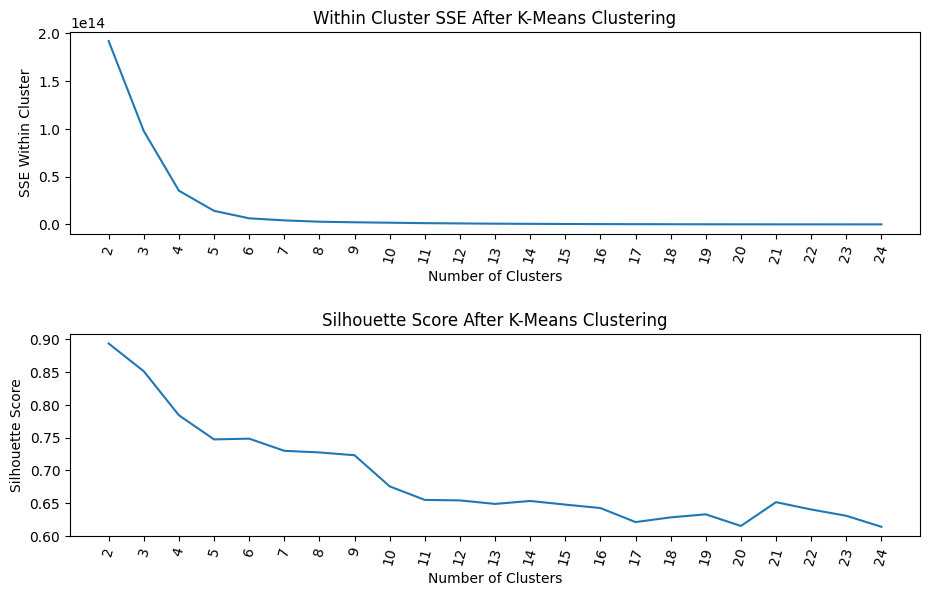

In [ ]:
plot_cluster(agg_df_maize_sub, max_loop=25)

In [ ]:
second_trial_maize = fractal_cluster(agg_df_maize_sub, clusters=5)

clustering performance
-----------------------------------
silhouette score: 0.5
sse withing cluster: 70


In [ ]:
cluster_perf_df_maize_2 = (
    second_trial_maize
    .groupby('cluster')
    .agg({"avg_crop_production"	:"mean", "avg_CO2":"mean", "avg_temp_change":"mean", "Code":"count"})
    .sort_values('avg_crop_production')
    .reset_index()
)

cluster_perf_df_maize_2

cluster  avg_crop_production     avg_CO2  avg_temp_change  Code
0        4         3.061818e+03  652.592657         0.049182     1
1        2         4.897992e+05    9.216041         0.509475    66
2        0         5.858505e+05   22.671228         0.254511    16
3        1         2.195829e+06  182.328249         0.541222    11
4        3         1.306280e+07  244.578969         0.495092     5

**Golden Cluster picking**


In [ ]:
selected_clus_maize = golden_cluster_selector(cluster_perf_df_maize_2,'avg_crop_production','avg_CO2')
golden_cluster_maize=second_trial_maize[second_trial_maize["cluster"]==selected_clus_maize]["Code"].values

print("Countries in golden cluster are:")
for cont in  golden_cluster_maize:
  print(data_country_code[data_country_code["Code"]==cont]["Country"].values[0])

Countries in golden cluster are:
Argentina
Indonesia
Mexico
Romania
South Africa


### Soybean

In [ ]:
first_trial_soybean = fractal_cluster(agg_soybean_cluster, clusters=6)

clustering performance
-----------------------------------
silhouette score: 0.55
sse withing cluster: 34


In [ ]:
first_trial_soybean

Code  avg_crop_production     avg_CO2  avg_temp_change  cluster
0    AGO         9.574124e+03   19.966471         0.784968        5
1    ALB         2.513214e+03    4.946115         0.677095        5
2    ARG         2.218063e+07  134.887947         0.369500        1
3    AUS         5.837367e+04  306.412052         0.567615        5
4    AUT         8.579694e+04   69.336829         1.365941        0
..   ...                  ...         ...              ...      ...
110  VEN         1.337539e+04  136.801289         0.667667        5
111  VNM         1.168719e+05   84.600465         0.476538        5
112  ZAF         3.264625e+05  343.383799         0.525212        5
113  ZMB         7.893222e+04    3.673974         0.510531        5
114  ZWE         7.609491e+04   12.167378         0.253250        5

[115 rows x 5 columns]

In [ ]:
cluster_perf_df_soybean = (
    first_trial_soybean
    .groupby('cluster')
    .agg({"avg_crop_production"	:"mean", "avg_CO2":"mean", "avg_temp_change":"mean", "Code":"count"})
    .sort_values('avg_crop_production')
    .reset_index()
)

cluster_perf_df_soybean

cluster  avg_crop_production      avg_CO2  avg_temp_change  Code
0        3         4.437500e+02    18.902059         2.297458     6
1        0         1.284447e+05   157.318151         1.207724    30
2        5         2.455119e+05   100.728913         0.578665    75
3        2         1.235152e+07  4873.060466         0.667173     1
4        1         3.170996e+07   222.971293         0.501019     2
5        4         6.930086e+07  5203.567084         0.574615     1

In [ ]:
cluster_selected_soybean = int(first_trial_soybean[first_trial_soybean["Code"]==first_trial_soybean["Code"].max()]["cluster"])

In [ ]:
cluster_selected_soybean

5

In [ ]:
agg_df_soybean_sub = agg_soybean_cluster.query(f"cluster =={cluster_selected_soybean}").reset_index(drop=True)

In [ ]:
#agg_df1_sub

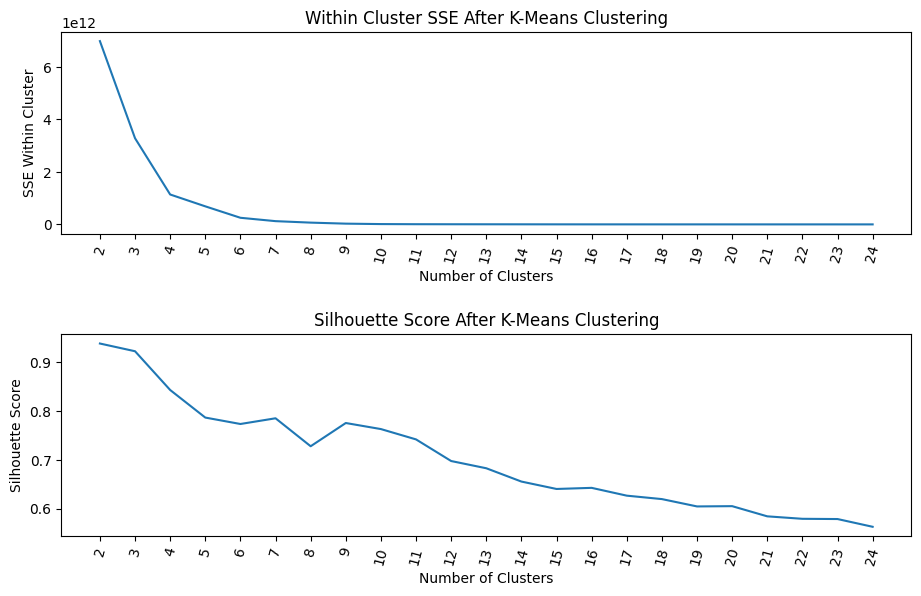

In [ ]:
plot_cluster(agg_df_soybean_sub, max_loop=25)

In [ ]:
second_trial_soybean = fractal_cluster(agg_df_soybean_sub, clusters=5)

clustering performance
-----------------------------------
silhouette score: 0.38
sse withing cluster: 56


In [ ]:
cluster_perf_df_soybean_2 = (
    second_trial_soybean
    .groupby('cluster')
    .agg({"avg_crop_production"	:"mean", "avg_CO2":"mean", "avg_temp_change":"mean", "Code":"count"})
    .sort_values('avg_crop_production')
    .reset_index()
)

cluster_perf_df_soybean_2

cluster  avg_crop_production      avg_CO2  avg_temp_change  Code
0        3         6.247699e+04    59.315499         0.708451    37
1        0         1.280571e+05    79.061280         0.447582    34
2        4         1.998673e+05  1134.189876         0.421019     1
3        2         3.064156e+06   250.214168         0.597269     2
4        1         5.419626e+06  1037.293246         0.353827     1

**Golden Cluster picking**

In [ ]:
selected_clus_soybean = golden_cluster_selector(cluster_perf_df_soybean_2,'avg_crop_production','avg_CO2')
print("Golden cluster is:-",selected_clus_soybean)
golden_cluster_soybean=second_trial_soybean[second_trial_soybean["cluster"]==selected_clus_soybean]["Code"].values

print("Countries in golden cluster are:")
for cont in  golden_cluster_soybean:
  print(data_country_code[data_country_code["Code"]==cont]["Country"].values[0])

Golden cluster is:- 1
Countries in golden cluster are:
India


#Latent Variables and Mainfold

In [ ]:
disaster=list(data_disaster["Indicator"].unique())
disaster_name_list =list( map(lambda x: x.split(":")[-1].strip(), disaster))
data_disaster['Indicator'] = data_disaster['Indicator'].replace(disaster,disaster_name_list)
data_disaster=data_disaster.rename(columns={'ISO3':"Code",'F1980':"1980", 'F1981':"1981",
       'F1982':"1982", 'F1983':"1983", 'F1984':"1984", 'F1985':"1985", 'F1986':"1986", 'F1987':"1987", 'F1988':"1988", 'F1989':"1989",
       'F1990':"1990", 'F1991':"1991", 'F1992':"1992", 'F1993':"1993", 'F1994':"1994", 'F1995':"1995", 'F1996':"1996", 'F1997':"1997",
       'F1998':"1998", 'F1999':"1999", 'F2000':"2000", 'F2001':"2001", 'F2002':"2002", 'F2003':"2003", 'F2004':"2004", 'F2005':"2005",
       'F2006': "2006", 'F2007':"2007", 'F2008':"2008", 'F2009':"2009", 'F2010':"2010", 'F2011':"2011", 'F2012':"2012", 'F2013':"2013",
       'F2014':"2014", 'F2015':"2015", 'F2016':"2016", 'F2017':"2017", 'F2018':"2018", 'F2019':"2019", 'F2020':"2020", 'F2021':"2021",
       'F2022':"2022"})
data_disaster.fillna(0,inplace=True)
data_disaster=data_disaster[['Country','Code', 'Indicator', '1980', '1981', '1982',
       '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019', '2020', '2021', '2022']]

data_disaster_clean=data_disaster[data_disaster["Indicator"]!="TOTAL"]

data_disaster_country=removeDataWithoutCode(data_disaster_clean,"Code")

data_disaster_country.drop(["Country"], axis=1, inplace=True)

data_disaster_country.head()

Code            Indicator  1980  1981  1982  1983  1984  1985  1986  1987  \
0  AFG              Drought   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1  AFG  Extreme temperature   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2  AFG                Flood   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
3  AFG            Landslide   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   
4  AFG                Storm   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

   ...  2013  2014  2015  2016  2017  2018  2019  2020  2021  2022  
0  ...   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   1.0   0.0  
1  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2  ...   4.0   2.0   1.0   4.0   1.0   3.0   6.0   5.0   2.0   5.0  
3  ...   1.0   0.0   4.0   0.0   2.0   1.0   1.0   1.0   1.0   1.0  
4  ...   0.0   1.0   0.0   0.0   2.0   0.0   0.0   1.0   0.0   0.0  

[5 rows x 45 columns]

In [ ]:
df_new_dis_ = pd.melt(data_disaster_country, id_vars=['Code','Indicator'] , var_name='Year', value_name ='Disaster')
df_pivoted_disaster = df_new_dis_.pivot(index=['Code', 'Year'], columns='Indicator', values='Disaster')
df_flattened_disaster = df_pivoted_disaster.reset_index()
df_flattened_disaster = df_flattened_disaster.rename_axis(None, axis=1)

In [ ]:
df_flattened_disaster.fillna(0,inplace=True)
for y in ['Year','Drought', 'Extreme temperature', 'Flood', 'Landslide',
       'Storm', 'Wildfire']:
       df_flattened_disaster[y]=df_flattened_disaster[y].astype(int)

df_flat_disaster=trimDataFrame(df_flattened_disaster,1970,2021)
df_flat_disaster.isna().sum()

Code                   0
Year                   0
Drought                0
Extreme temperature    0
Flood                  0
Landslide              0
Storm                  0
Wildfire               0
dtype: int64

In [ ]:
data_pesticide.isna().sum()

Domain Code         0
Domain              0
Area Code (ISO3)    0
Area                0
Element Code        0
Element             0
Item Code           0
Item                0
Year Code           0
Year                0
Unit                0
Value               0
Flag                0
Flag Description    0
dtype: int64

In [ ]:
data_pesticide.drop(['Domain Code',	'Domain','Area','Element Code','Element',	'Item Code', 'Item',	'Year Code', 'Unit', 'Flag', 'Flag Description'], axis=1, inplace=True)

In [ ]:
data_pesticide=data_pesticide.rename(columns={'Area Code (ISO3)':"Code","Value":"pesticide_use"})
data_pesticide

Code  Year  pesticide_use
0     ALB  1990           0.17
1     ALB  1991           0.17
2     ALB  1992           0.17
3     ALB  1993           0.17
4     ALB  1994           0.29
...   ...   ...            ...
5869  ZWE  2017           0.53
5870  ZWE  2018           0.53
5871  ZWE  2019           0.53
5872  ZWE  2020           0.53
5873  ZWE  2021           0.53

[5874 rows x 3 columns]

In [ ]:
data_fertilizer['Item'].unique()

array(['Nutrient nitrogen N (total)', 'Nutrient phosphate P2O5 (total)',
       'Nutrient potash K2O (total)'], dtype=object)

In [ ]:
data_fertilizer.isna().sum()

Domain Code             0
Domain                  0
Area Code (ISO3)        0
Area                    0
Element Code            0
Element                 0
Item Code               0
Item                    0
Year Code               0
Year                    0
Unit                11595
Value               11595
Flag                11595
Flag Description    11595
Note                37908
dtype: int64

In [ ]:
data_N=data_fertilizer[data_fertilizer['Item']=='Nutrient nitrogen N (total)']
data_P=data_fertilizer[data_fertilizer['Item']=='Nutrient phosphate P2O5 (total)']
data_K=data_fertilizer[data_fertilizer['Item']=='Nutrient potash K2O (total)']

In [ ]:
data_N.drop(['Domain Code',	'Domain','Area','Element Code','Element',	'Item Code', 'Item',	'Year Code', 'Unit', 'Flag', 'Flag Description','Note'], axis=1, inplace=True)
data_P.drop(['Domain Code',	'Domain','Area','Element Code','Element',	'Item Code', 'Item',	'Year Code', 'Unit', 'Flag', 'Flag Description','Note'], axis=1, inplace=True)
data_K.drop(['Domain Code',	'Domain','Area','Element Code','Element',	'Item Code', 'Item',	'Year Code', 'Unit', 'Flag', 'Flag Description','Note'], axis=1, inplace=True)

In [ ]:
data_N=data_N.rename(columns={'Area Code (ISO3)':"Code","Value":"N_content"})
data_P=data_P.rename(columns={'Area Code (ISO3)':"Code","Value":"P_content"})
data_K=data_K.rename(columns={'Area Code (ISO3)':"Code","Value":"K_content"})

In [ ]:
data_N.fillna(0,inplace=True)
data_P.fillna(0,inplace=True)
data_K.fillna(0,inplace=True)

In [ ]:
print(data_N.isna().sum())
print("-"*20)
print(data_P.isna().sum())
print("-"*20)
print(data_K.isna().sum())

Code         0
Year         0
N_content    0
dtype: int64
--------------------
Code         0
Year         0
P_content    0
dtype: int64
--------------------
Code         0
Year         0
K_content    0
dtype: int64


In [ ]:
data_arable.head()

Domain Code    Domain Area Code (ISO3)         Area  Element Code Element  \
0          RL  Land Use              AFG  Afghanistan          5110    Area   
1          RL  Land Use              AFG  Afghanistan          5110    Area   
2          RL  Land Use              AFG  Afghanistan          5110    Area   
3          RL  Land Use              AFG  Afghanistan          5110    Area   
4          RL  Land Use              AFG  Afghanistan          5110    Area   

   Item Code         Item  Year Code  Year     Unit   Value Flag  \
0       6621  Arable land       1961  1961  1000 ha  7650.0    I   
1       6621  Arable land       1962  1962  1000 ha  7700.0    I   
2       6621  Arable land       1963  1963  1000 ha  7750.0    I   
3       6621  Arable land       1964  1964  1000 ha  7800.0    A   
4       6621  Arable land       1965  1965  1000 ha  7800.0    A   

  Flag Description  
0    Imputed value  
1    Imputed value  
2    Imputed value  
3  Official figure  
4  Official figure

In [ ]:
data_arable.drop(['Domain Code',	'Domain','Area','Element Code','Element',	'Item Code', 'Item',	'Year Code', 'Unit', 'Flag', 'Flag Description'], axis=1, inplace=True)

In [ ]:
data_arable=data_arable.rename(columns={'Area Code (ISO3)':"Code","Value":"arable_land"})

In [ ]:
df_flat_disaster=removeDataWithoutCode(df_flat_disaster, "Code")
data_K=removeDataWithoutCode(data_K,"Code")
data_pesticide=removeDataWithoutCode(data_pesticide,"Code")
data_p=removeDataWithoutCode(data_P,"Code")
data_N=removeDataWithoutCode(data_N,"Code")
data_maize=removeDataWithoutCode(data_maize,"Code")
data_wheat=removeDataWithoutCode(data_wheat,"Code")
data_rice=removeDataWithoutCode(data_rice,"Code")
data_soybean=removeDataWithoutCode(data_soybean,"Code")
data_arable=removeDataWithoutCode(data_arable,"Code")

In [ ]:
df_flat_disaster=removeDataWithoutCode(df_flat_disaster, "Code")
data_K=removeDataWithoutCode(data_K,"Code")
data_pesticide=removeDataWithoutCode(data_pesticide,"Code")
data_p=removeDataWithoutCode(data_P,"Code")
data_N=removeDataWithoutCode(data_N,"Code")
data_maize=removeDataWithoutCode(data_maize,"Code")
data_wheat=removeDataWithoutCode(data_wheat,"Code")
data_rice=removeDataWithoutCode(data_rice,"Code")
data_soybean=removeDataWithoutCode(data_soybean,"Code")
data_arable=removeDataWithoutCode(data_arable,"Code")

In [ ]:
df_flat_disaster=removeDataWithoutCode(df_flat_disaster, "Code")
data_K=removeDataWithoutCode(data_K,"Code")
data_pesticide=removeDataWithoutCode(data_pesticide,"Code")
data_p=removeDataWithoutCode(data_P,"Code")
data_N=removeDataWithoutCode(data_N,"Code")
data_maize=removeDataWithoutCode(data_maize,"Code")
data_wheat=removeDataWithoutCode(data_wheat,"Code")
data_rice=removeDataWithoutCode(data_rice,"Code")
data_soybean=removeDataWithoutCode(data_soybean,"Code")
data_arable=removeDataWithoutCode(data_arable,"Code")

# Data Amalgamation (on Country code and year)

### Triming accordingly. Every dataset have year(1980 to 2021) hence including


In [ ]:
df_temp_trim=trimDataFrame(df_temp_country, 1980,2021)
df_co2_trim=trimDataFrame(df_co2_, 1980,2021)
df_disaster_trim=trimDataFrame(df_flat_disaster, 1980,2021)
data_K_trim=trimDataFrame(data_K, 1980,2021)
data_pesticide_trim=trimDataFrame(data_pesticide, 1980,2021)
data_p_trim=trimDataFrame(data_P, 1980,2021)
data_N_trim=trimDataFrame(data_N, 1980,2021)
data_maize_trim=trimDataFrame(data_maize, 1980,2021)
data_wheat_trim=trimDataFrame(data_wheat, 1980,2021)
data_rice_trim=trimDataFrame(data_rice, 1980,2021)
data_soybean_trim=trimDataFrame(data_soybean, 1980,2021)
data_arable_trim=trimDataFrame(data_arable, 1980,2021)

In [ ]:
#data_temp_trim['Year']=data_temp_trim['Year'].astype(int);
#data_co2_trim['Year']=data_co2_trim['Year'].astype(int);
#df_flattened['Year']=df_flattened['Year'].astype(int);
data = pd.merge(df_temp_trim, df_co2_trim, on=['Year','Code'])
data = pd.merge(df_disaster_trim, data, on=['Year','Code'])
data = pd.merge(data_K_trim, data, on=['Year','Code'])
data = pd.merge(data_p_trim, data, on=['Year','Code'])
data = pd.merge(data_N_trim, data, on=['Year','Code'])
data = pd.merge(data_arable_trim, data, on=['Year','Code'])
data = pd.merge(data_pesticide_trim, data, on=['Year','Code'])


In [ ]:
data.iloc[:,2:]

pesticide_use  arable_land  N_content  P_content  K_content  Drought  \
0              0.17        579.0     104.40      36.22       4.26        0   
1              0.17        578.0      31.72      10.95       1.85        0   
2              0.17        578.0      21.05      12.38       0.00        0   
3              0.17        577.0      21.68       2.24       1.57        0   
4              0.29        577.0      18.06       2.98       0.00        0   
...             ...          ...        ...        ...        ...      ...   
5827           0.53       4000.0      15.85      10.10       9.76        1   
5828           0.53       4000.0      12.22      11.17       9.00        0   
5829           0.53       4000.0      12.22      11.17       9.00        0   
5830           0.53       4000.0       9.59      11.68       4.07        0   
5831           0.53       4000.0       9.59      11.68       4.07        1   

      Extreme temperature  Flood  Landslide  Storm  Wildfire  temp_change  \
0                       0      0          0      0         0        0.795   
1                       0      0          0      0         0       -0.269   
2                       0      1          0      0         0        0.106   
3                       0      0          0      0         0        0.076   
4                       0      0          0      0         0        1.330   
...                   ...    ...        ...    ...       ...          ...   
5827                    0      0          0      1         0        0.088   
5828                    0      0          0      0         0        0.453   
5829                    0      1          0      1         0        0.925   
5830                    0      0          0      0         0        0.389   
5831                    0      0          0      1         0       -0.125   

            CO2  
0      6.653018  
1      4.437322  
2      2.419830  
3      2.274801  
4      2.387156  
...         ...  
5827  10.540316  
5828  12.730372  
5829  12.088218  
5830  11.443394  
5831  12.293227  

[5832 rows x 13 columns]

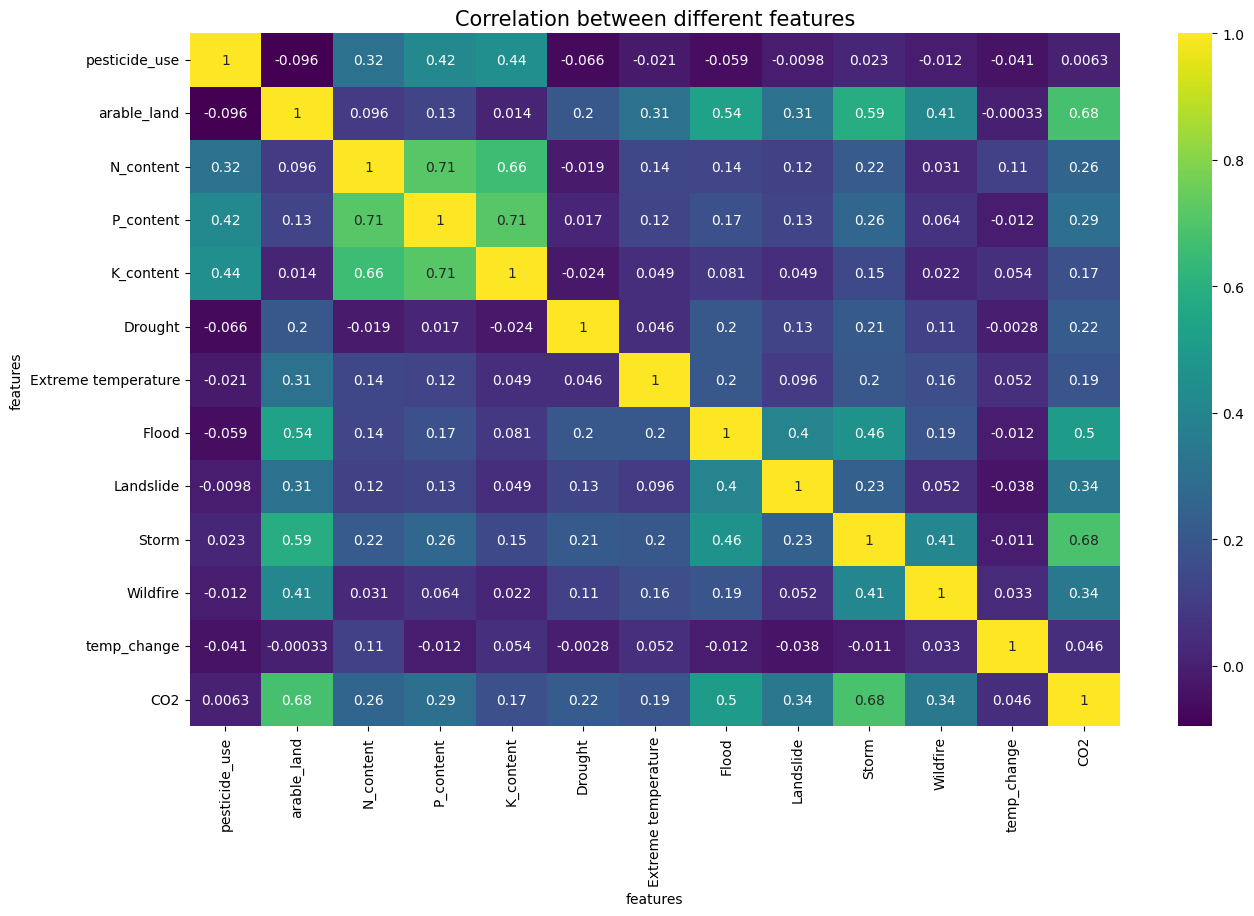

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15, 9))
sns.heatmap(data.iloc[:,2:].corr(), annot=True,cmap='viridis')
ax.set(xlabel='features')
ax.set(ylabel='features')

plt.title('Correlation between different features', fontsize = 15, c='black')
plt.show()

### From above heat map we don't see any significat correlation between parameters. Hence we will be retaining all the parameter for preparing the models.

Note: Threshold for considering any parmeters correlated is taken as 0.80.

In [ ]:
wheat= pd.merge(data_wheat_trim, data, on=['Year','Code'])
rice= pd.merge(data_rice_trim, data, on=['Year','Code'])
soybean= pd.merge(data_soybean_trim, data, on=['Year','Code'])
maize= pd.merge(data_maize_trim, data, on=['Year','Code'])

In [ ]:
wheat=replace_temp(wheat)
wheat.isna().sum()

Code                   0
Year                   0
wheat                  0
pesticide_use          0
arable_land            0
N_content              0
P_content              0
K_content              0
Drought                0
Extreme temperature    0
Flood                  0
Landslide              0
Storm                  0
Wildfire               0
temp_change            0
CO2                    0
dtype: int64

In [ ]:
rice=replace_temp(rice)
rice.isna().sum()

Code                   0
Year                   0
rice                   0
pesticide_use          0
arable_land            0
N_content              0
P_content              0
K_content              0
Drought                0
Extreme temperature    0
Flood                  0
Landslide              0
Storm                  0
Wildfire               0
temp_change            0
CO2                    0
dtype: int64

In [ ]:
maize=replace_temp(maize)
maize.isna().sum()

Code                   0
Year                   0
maize                  0
pesticide_use          0
arable_land            0
N_content              0
P_content              0
K_content              0
Drought                0
Extreme temperature    0
Flood                  0
Landslide              0
Storm                  0
Wildfire               0
temp_change            0
CO2                    0
dtype: int64

In [ ]:
soybean=replace_temp(soybean)
soybean.isna().sum()

Code                   0
Year                   0
soybean                0
pesticide_use          0
arable_land            0
N_content              0
P_content              0
K_content              0
Drought                0
Extreme temperature    0
Flood                  0
Landslide              0
Storm                  0
Wildfire               0
temp_change            0
CO2                    0
dtype: int64

# Classification
Classifying which disaster is more likely to happen in a country for specific year

In [ ]:

df_n = pd.merge(df_temp_trim, df_co2_trim, on=['Year','Code'])
df_merge = pd.merge(df_disaster_trim, df_n, on=['Year','Code'])

In [ ]:
df_merge=df_merge.dropna()
df_merge.loc[df_merge['Drought'] > 1, 'Drought'] = 1
df_merge.loc[df_merge['Extreme temperature'] > 1, 'Extreme temperature'] = 1
df_merge.loc[df_merge['Flood'] > 1, 'Flood'] = 1
df_merge.loc[df_merge['Landslide'] > 1, 'Landslide'] = 1
df_merge.loc[df_merge['Storm'] > 1, 'Storm'] = 1
df_merge.loc[df_merge['Wildfire'] > 1, 'Wildfire'] = 1

In [ ]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7420 entries, 0 to 7575
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Code                 7420 non-null   object 
 1   Year                 7420 non-null   int64  
 2   Drought              7420 non-null   int64  
 3   Extreme temperature  7420 non-null   int64  
 4   Flood                7420 non-null   int64  
 5   Landslide            7420 non-null   int64  
 6   Storm                7420 non-null   int64  
 7   Wildfire             7420 non-null   int64  
 8   temp_change          7420 non-null   float64
 9   CO2                  7420 non-null   float64
dtypes: float64(2), int64(7), object(1)
memory usage: 637.7+ KB


Data is very imbalanced based on categories

In [ ]:
features = df_merge[['temp_change', 'CO2']]
label = df_merge[['Drought', 'Extreme temperature', 'Flood', 'Landslide', 'Storm', 'Wildfire']]
X,y=(features,label)

In [ ]:

X = StandardScaler().fit_transform(X)
le = LabelEncoder()
y = y.apply(le.fit_transform)
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=.2)
#x_train, x_test, y_train, y_test = train_test_split(features,label,test_size = 0.2,random_state =2)

In [ ]:



# Load data
#data = pd.read_csv('multi_level_data.csv')

# Define input and output variables
#X = data[['Change_temp', 'change_CO2']]
#y = data.drop(['Code', 'Year', 'Change_temp', 'change_CO2'], axis=1)

# Convert string labels to numerical values


# Split data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Convert y arrays to 1D arrays of class labels
y_train = y_train.values.argmax(axis=1)
y_test = y_test.values.argmax(axis=1)

names = ["Decision Tree", "Random Forest","Linear SVM","Multi-layer Perceptron", "AdaBoost", #"Neural Net"
         "Naive Bayes", "QDA"]#"XG Boost Classifier"
# Train decision tree classifier
classifiers = [DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5),RandomForestClassifier(),SVC(),MLPClassifier(), AdaBoostClassifier(),
    GaussianNB(),#xgb.XGBClassifier(),
    QuadraticDiscriminantAnalysis()]

max_score = 0.0
max_class = ''
timetaken=[]
score_all=[]
# iterate over classifiers
for name, clf in zip(names, classifiers):
    start_time = time.time()
    clf.fit(X_train, y_train)

#    accuracy =  np.mean(y_pred == y_test)100.0 *
#print("Accuracy:", accuracy)
    score = 100.0 * clf.score(X_test, y_test)
    score_all.append(score)
    timetaken.append((time.time() - start_time))
    print('Classifier = %s, Score (test, accuracy) = %.2f,' %(name, score), 'Training time = %.2f seconds' % (time.time() - start_time))

    if score > max_score:
        clf_best = clf
        max_score = score
        max_class = name

print(80*'-' )
print('Best --> Classifier = %s, Score (test, accuracy) = %.2f' %(max_class, max_score))




Classifier = Decision Tree, Score (test, accuracy) = 60.38, Training time = 0.02 seconds
Classifier = Random Forest, Score (test, accuracy) = 54.72, Training time = 3.33 seconds
Classifier = Linear SVM, Score (test, accuracy) = 59.84, Training time = 3.46 seconds
Classifier = Multi-layer Perceptron, Score (test, accuracy) = 59.91, Training time = 5.01 seconds
Classifier = AdaBoost, Score (test, accuracy) = 59.64, Training time = 0.31 seconds
Classifier = Naive Bayes, Score (test, accuracy) = 57.48, Training time = 0.00 seconds
Classifier = QDA, Score (test, accuracy) = 57.41, Training time = 0.00 seconds
--------------------------------------------------------------------------------
Best --> Classifier = Decision Tree, Score (test, accuracy) = 60.38


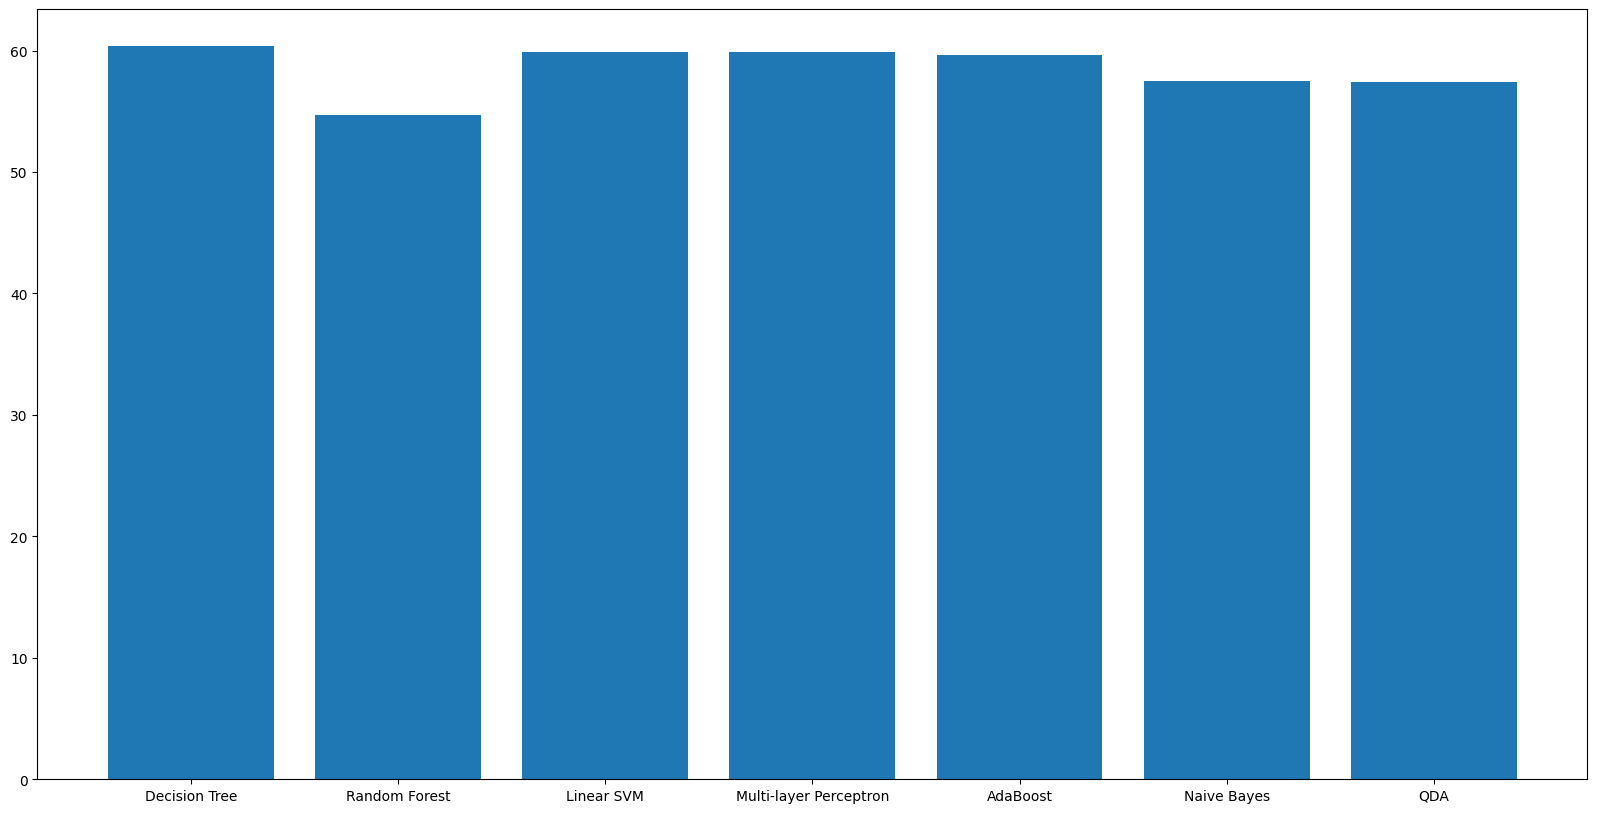


Best Classifier = Decision Tree, Score (test, accuracy) = 60.38


In [ ]:
# Comparision Plot
plt.figure(figsize=(20, 10))
plt.bar(names, score_all)
plt.show()


# Final Result
print()
print('Best Classifier = %s, Score (test, accuracy) = %.2f' %(max_class, max_score))

In [ ]:


clf_dt = DecisionTreeClassifier()
clf_dt.fit(X_train, y_train)

# Train random forest classifier
clf_rf = RandomForestClassifier()
clf_rf.fit(X_train, y_train)

# Train support vector machine classifier
clf_svm = SVC()
clf_svm.fit(X_train, y_train)

# Train multi-layer perceptron classifier
clf_mlp = MLPClassifier()
clf_mlp.fit(X_train, y_train)

# Predict output levels for test data using decision tree classifier
y_pred_dt = clf_dt.predict(X_test)

# Predict output levels for test data using random forest classifier
y_pred_rf = clf_rf.predict(X_test)

# Predict output levels for test data using support vector machine classifier
y_pred_svm = clf_svm.predict(X_test)

# Predict output levels for test data using multi-layer perceptron classifier
y_pred_mlp = clf_mlp.predict(X_test)

# Evaluate performance of decision tree classifier
print("Decision Tree Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_dt, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_dt, average='weighted'))

# Evaluate performance of random forest classifier
print("\nRandom Forest Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_rf, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_rf, average='weighted'))

# Evaluate performance of support vector machine classifier
print("\nSupport Vector Machine Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Precision:", precision_score(y_test, y_pred_svm, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_svm, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_svm, average='weighted'))

# Evaluate performance of multi-layer perceptron classifier
print("\nMulti-layer Perceptron Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_mlp))
print("Precision:", precision_score(y_test, y_pred_mlp, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_mlp, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_mlp, average='weighted'))

Decision Tree Classifier:
Accuracy: 0.48180592991913745
Precision: 0.4817328927919312
Recall: 0.48180592991913745
F1 Score: 0.4817273038600154

Random Forest Classifier:
Accuracy: 0.543800539083558
Precision: 0.485624323213677
Recall: 0.543800539083558
F1 Score: 0.5081001089553386

Support Vector Machine Classifier:
Accuracy: 0.5983827493261455
Precision: 0.501737551018061
Recall: 0.5983827493261455
F1 Score: 0.495939064606683

Multi-layer Perceptron Classifier:
Accuracy: 0.5936657681940701
Precision: 0.47813505823582053
Recall: 0.5936657681940701
F1 Score: 0.5055482174402753


### Check model by predicting disaster for Afganistan from 1971-1979

In [ ]:

temmp_1972_Af=df_temp_country[df_temp_country["Code"]=="AFG"]
co2_1972_Af=df_co2_[df_co2_["Code"]=="AFG"]
data_AF=pd.merge(temmp_1972_Af,co2_1972_Af, on=["Code","Year"])

In [ ]:
data_AF=data_AF[data_AF["Year"]<1980]
data_AF=data_AF[data_AF["Year"]>1970]
data_AF=data_AF[["temp_change","CO2"]]
data_AF=StandardScaler().fit_transform(data_AF)
data_AF

array([[ 1.25229395, -1.1322119 ],
       [-1.98887668, -1.24536568],
       [ 0.53265366, -1.10663165],
       [-0.80807155,  1.22948977],
       [-0.72625198,  0.40458994],
       [-0.43058581, -0.30142656],
       [ 1.05518317,  1.69238093],
       [ 0.34112148, -0.09193749],
       [ 0.77253375,  0.55111265]])

In [ ]:
y_pred_mlp=clf_mlp.predict(data_AF)

In [ ]:
Pred=[]
print("Prediction for Afghanistan for year 1971-1979")
for i,j in zip(y_pred_mlp,["1971","1972","1973","1973","1975","1976","1977","1978","1979"]):
  Pred.append(disaster_name_list[i])
  print(j,"->",disaster_name_list[i])



Prediction for Afghanistan for year 1971-1979
1971 -> Drought
1972 -> Drought
1973 -> Drought
1973 -> Flood
1975 -> Flood
1976 -> Drought
1977 -> Flood
1978 -> Drought
1979 -> Flood


This prediction is only 55% correct, therefore there are 55% chance that the above natural disasters will take place. Hence country can prepare accordingly. To improve the prediction we need to include more data and other factors.

# Muller Loop

#### Running muller loop for regression for wheat, rice, soybean and maize. For this purpose we will remoce the country code and just take rest of the attribures just to find in the case of other attributes can we forecast the production of these 4 crops.

In [ ]:
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import r2_score
from scipy.stats import yeojohnson
from sklearn import linear_model
from scipy.stats import boxcox
from sklearn.svm import SVR
import xgboost as xgb
import random
#import shap
#shap.initjs()

def muller_loop(df,value):
  lst=list(df.columns)
  lst.remove(value)
  lst.remove("Code")
  lst.remove("Year")
  features = df[lst]
  label = df[[value]]
  X,y=(features,label)
  X = StandardScaler().fit_transform(X)
  random.seed(10)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

  kernel = DotProduct() + WhiteKernel()
  names = ["Multiple Linear Regression", "Lasso Regression","XG-Boost","Support Vector Regression","Gaussian Process Regressor","Decision Tree Regressor", "Random Forest Regressor"]
# Train decision tree classifier
  regressors = [linear_model.LinearRegression(),linear_model.Lasso(alpha=0.1),xgb.XGBRegressor(objective="reg:squarederror"),SVR(kernel = 'rbf'),GaussianProcessRegressor(kernel=kernel,random_state=0),DecisionTreeRegressor(random_state=2,max_depth=5),RandomForestRegressor(max_depth=5)]
  max_score = 0.0
  max_class = ''
  timetaken=[]
  score_all=[]
  # iterate over classifiers
  for name, clf in zip(names, regressors):
      start_time = time.time()
      model=clf.fit(X_train, y_train)

  #    accuracy =  np.mean(y_pred == y_test)100.0 *
  #print("Accuracy:", accuracy)
      score = 100.0 * clf.score(X_test, y_test)
      score_all.append(score)
      timetaken.append((time.time() - start_time))
      print('Classifier = %s, Score (test, accuracy) = %.2f,' %(name, score), 'Training time = %.2f seconds' % (time.time() - start_time))
      #shap_plots(model,X)
      if score > max_score:
          clf_best = clf
          max_score = score
          max_class = name

  print(80*'-' )
  print('Best --> Classifier = %s, Score (test, accuracy) = %.2f' %(max_class, max_score))
  return(names,score_all)



In [ ]:
# Comparision Plot
def plot_comparision(names, score_all):
  plt.figure(figsize=(20, 10))
  plt.bar(names, score_all)
  plt.show()


## Muller Loop for Wheat production

In [ ]:
names,score_all=muller_loop(wheat,"wheat")

Classifier = Multiple Linear Regression, Score (test, accuracy) = 83.93, Training time = 0.03 seconds
Classifier = Lasso Regression, Score (test, accuracy) = 83.93, Training time = 0.03 seconds
Classifier = XG-Boost, Score (test, accuracy) = 97.86, Training time = 2.31 seconds
Classifier = Support Vector Regression, Score (test, accuracy) = -10.88, Training time = 0.82 seconds
Classifier = Gaussian Process Regressor, Score (test, accuracy) = 14.54, Training time = 11.65 seconds
Classifier = Decision Tree Regressor, Score (test, accuracy) = 94.87, Training time = 0.05 seconds
Classifier = Random Forest Regressor, Score (test, accuracy) = 95.61, Training time = 1.46 seconds
--------------------------------------------------------------------------------
Best --> Classifier = XG-Boost, Score (test, accuracy) = 97.86


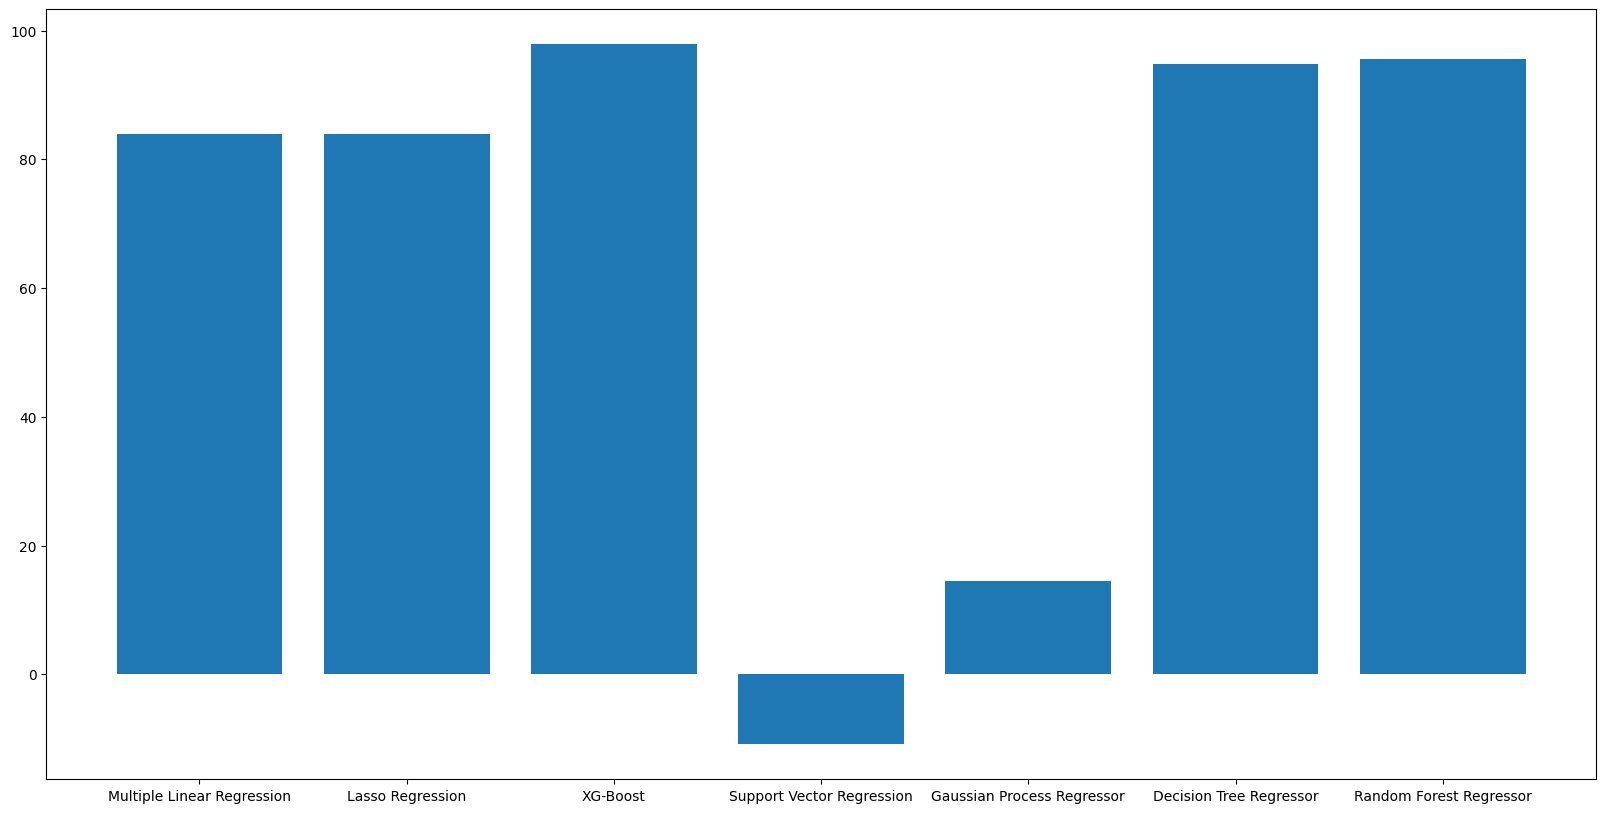

In [ ]:
plot_comparision(names,score_all)

## Muller Loop for rice production

In [ ]:
names,score_all=muller_loop(rice,"rice")

Classifier = Multiple Linear Regression, Score (test, accuracy) = 67.13, Training time = 0.03 seconds
Classifier = Lasso Regression, Score (test, accuracy) = 67.13, Training time = 0.03 seconds
Classifier = XG-Boost, Score (test, accuracy) = 97.74, Training time = 1.16 seconds
Classifier = Support Vector Regression, Score (test, accuracy) = -5.32, Training time = 0.84 seconds
Classifier = Gaussian Process Regressor, Score (test, accuracy) = 11.31, Training time = 8.43 seconds
Classifier = Decision Tree Regressor, Score (test, accuracy) = 90.82, Training time = 0.02 seconds
Classifier = Random Forest Regressor, Score (test, accuracy) = 92.13, Training time = 1.38 seconds
--------------------------------------------------------------------------------
Best --> Classifier = XG-Boost, Score (test, accuracy) = 97.74


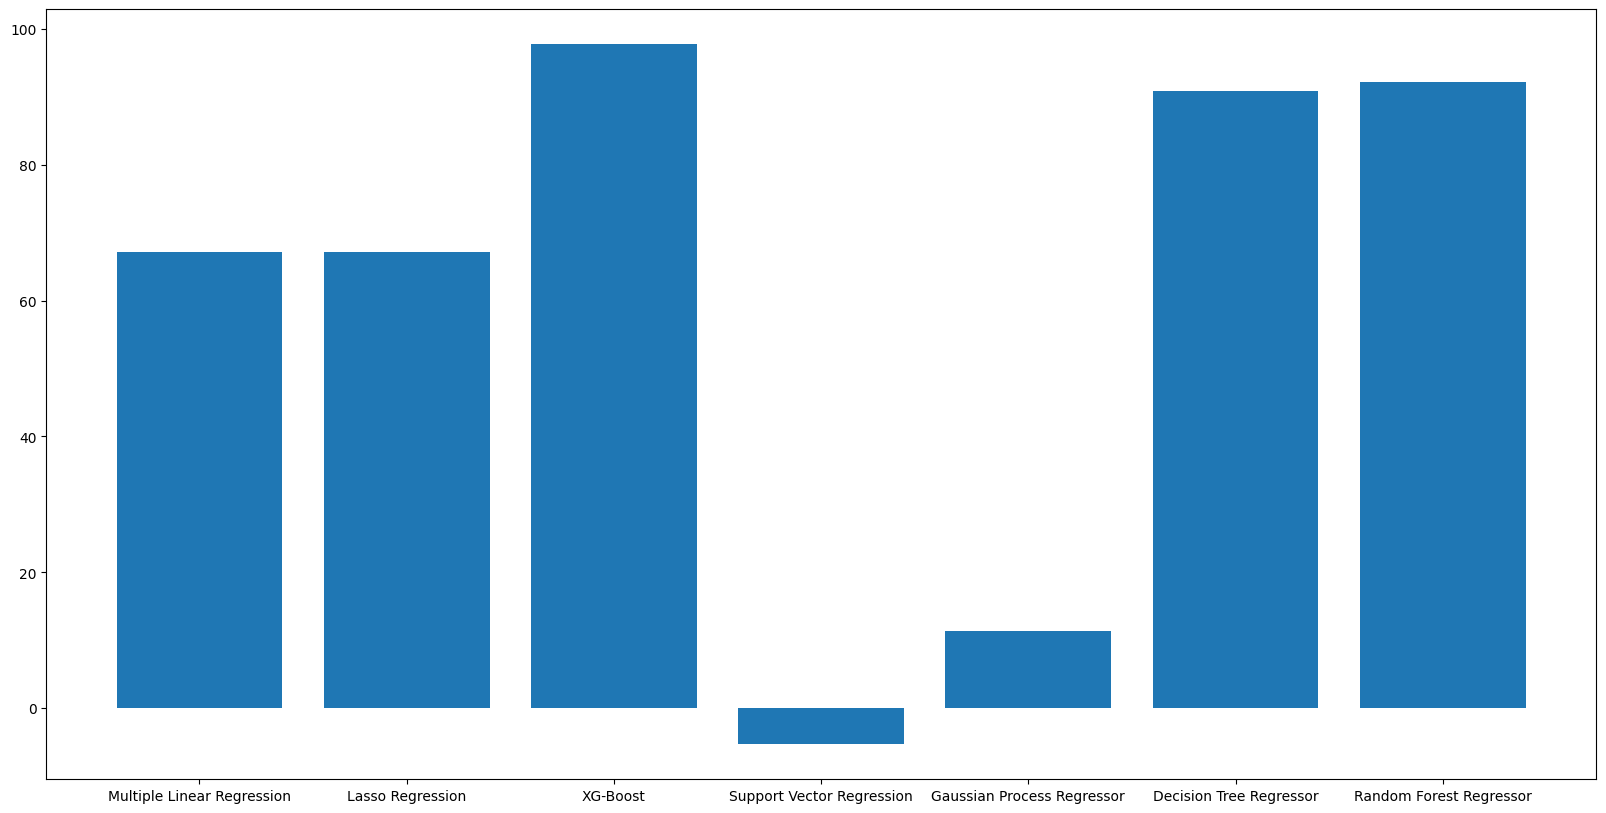

In [ ]:
plot_comparision(names,score_all)

## Muller Loop for soybean production

In [ ]:
names,score_all=muller_loop(soybean,"soybean")

Classifier = Multiple Linear Regression, Score (test, accuracy) = 44.01, Training time = 0.01 seconds
Classifier = Lasso Regression, Score (test, accuracy) = 44.01, Training time = 0.01 seconds
Classifier = XG-Boost, Score (test, accuracy) = 79.38, Training time = 3.26 seconds
Classifier = Support Vector Regression, Score (test, accuracy) = -3.40, Training time = 0.68 seconds
Classifier = Gaussian Process Regressor, Score (test, accuracy) = 6.16, Training time = 6.08 seconds
Classifier = Decision Tree Regressor, Score (test, accuracy) = 85.79, Training time = 0.02 seconds
Classifier = Random Forest Regressor, Score (test, accuracy) = 87.64, Training time = 0.93 seconds
--------------------------------------------------------------------------------
Best --> Classifier = Random Forest Regressor, Score (test, accuracy) = 87.64


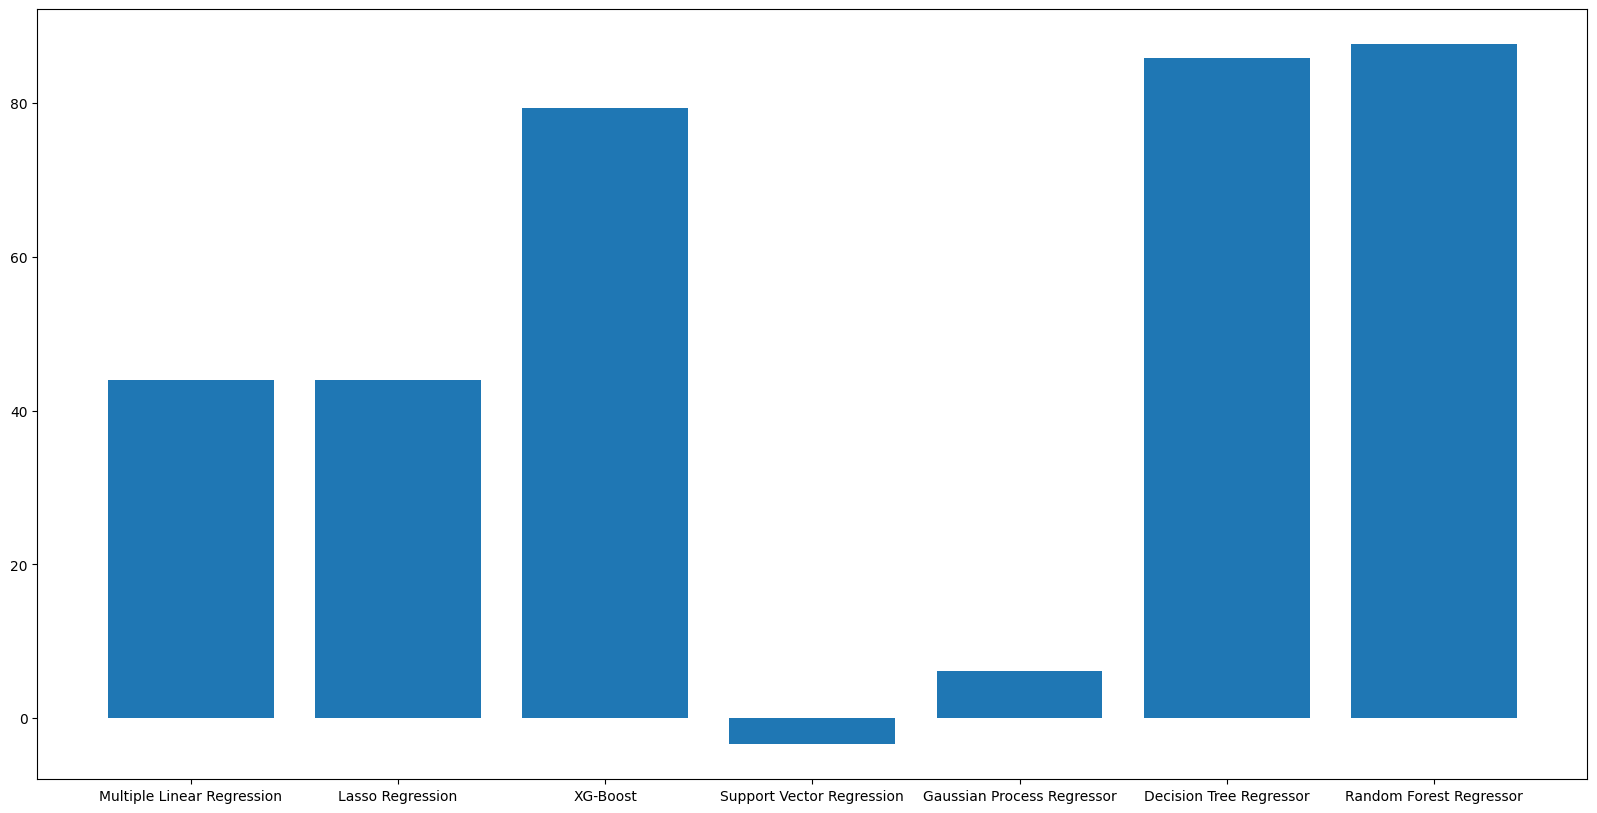

In [ ]:
plot_comparision(names,score_all)

## Muller Loop for maize production

In [ ]:
names,score_all=muller_loop(maize,"maize")

Classifier = Multiple Linear Regression, Score (test, accuracy) = 82.23, Training time = 0.01 seconds
Classifier = Lasso Regression, Score (test, accuracy) = 82.23, Training time = 0.02 seconds
Classifier = XG-Boost, Score (test, accuracy) = 97.01, Training time = 0.83 seconds
Classifier = Support Vector Regression, Score (test, accuracy) = -3.46, Training time = 1.66 seconds
Classifier = Gaussian Process Regressor, Score (test, accuracy) = 15.81, Training time = 18.50 seconds
Classifier = Decision Tree Regressor, Score (test, accuracy) = 92.28, Training time = 0.07 seconds
Classifier = Random Forest Regressor, Score (test, accuracy) = 94.21, Training time = 1.73 seconds
--------------------------------------------------------------------------------
Best --> Classifier = XG-Boost, Score (test, accuracy) = 97.01


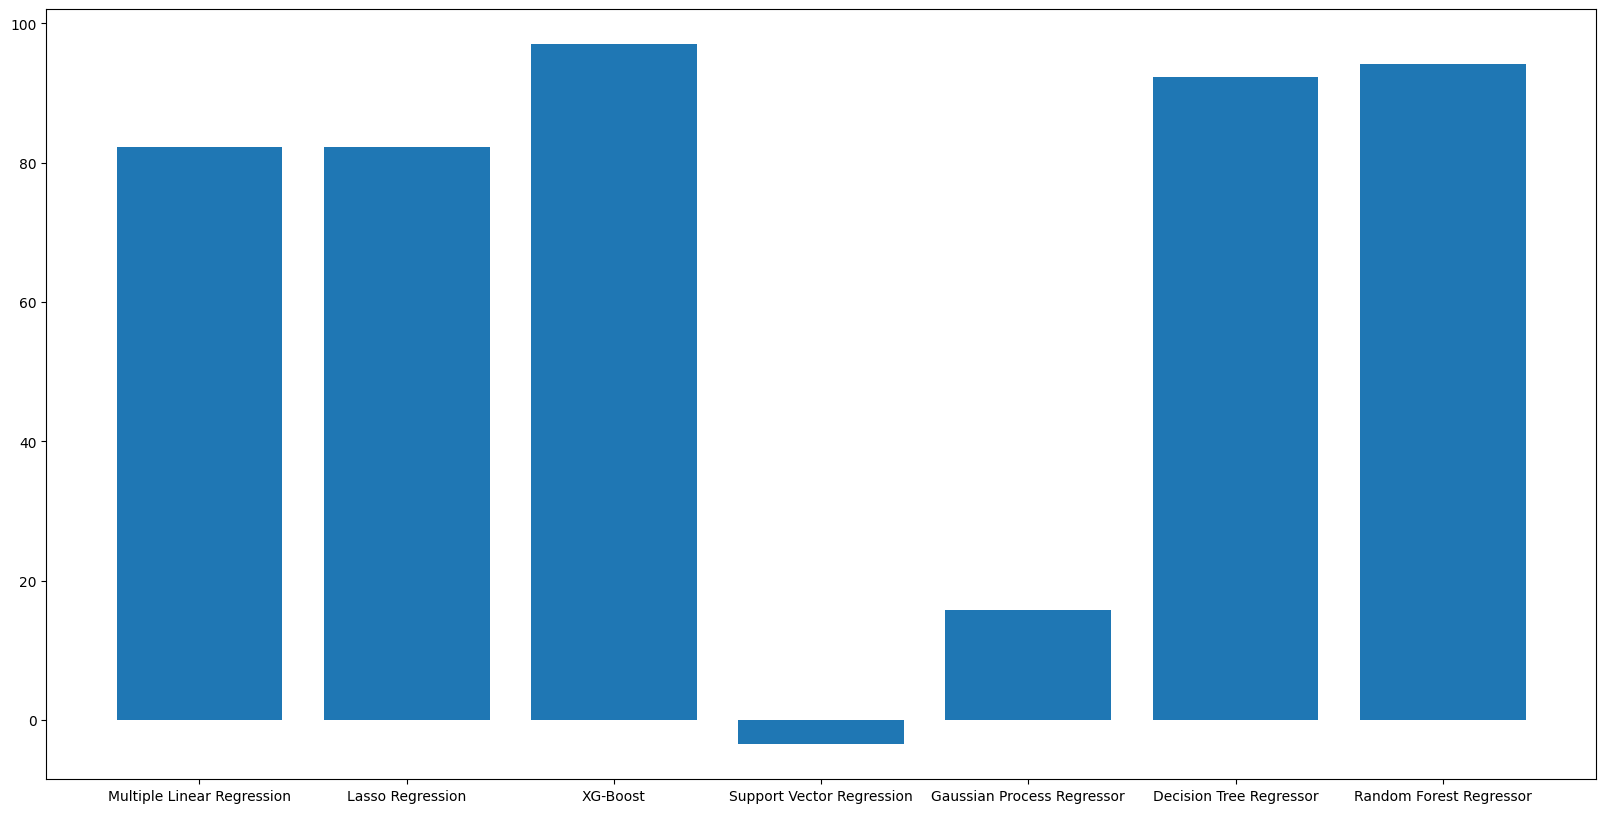

In [ ]:
plot_comparision(names,score_all)

# Shap

In [ ]:
import shap
shap.initjs()

In [ ]:
def shap_(df,value):
  lst=list(df.columns)
  lst.remove(value)
  lst.remove("Code")
  lst.remove("Year")
  features = df[lst]
  label = df[[value]]
  X,y=(features,label)
  #X = StandardScaler().fit_transform(X)
  random.seed(10)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

  model = xgb.XGBRegressor(objective="reg:squarederror")
  model.fit(X, y)

  explainer = shap.Explainer(model)
  shap_values = explainer(X,check_additivity=False)

  shap.plots.waterfall(shap_values[0])

  shap.plots.bar(shap_values)

  shap.plots.beeswarm(shap_values)


  for i in range(len(shap_values[0])):
    shap.plots.scatter(shap_values[:,i])


In [ ]:
list(wheat.columns)

['Code',
 'Year',
 'wheat',
 'pesticide_use',
 'arable_land',
 'N_content',
 'P_content',
 'K_content',
 'Drought',
 'Extreme temperature',
 'Flood',
 'Landslide',
 'Storm',
 'Wildfire',
 'temp_change',
 'CO2']

### Shap for wheat

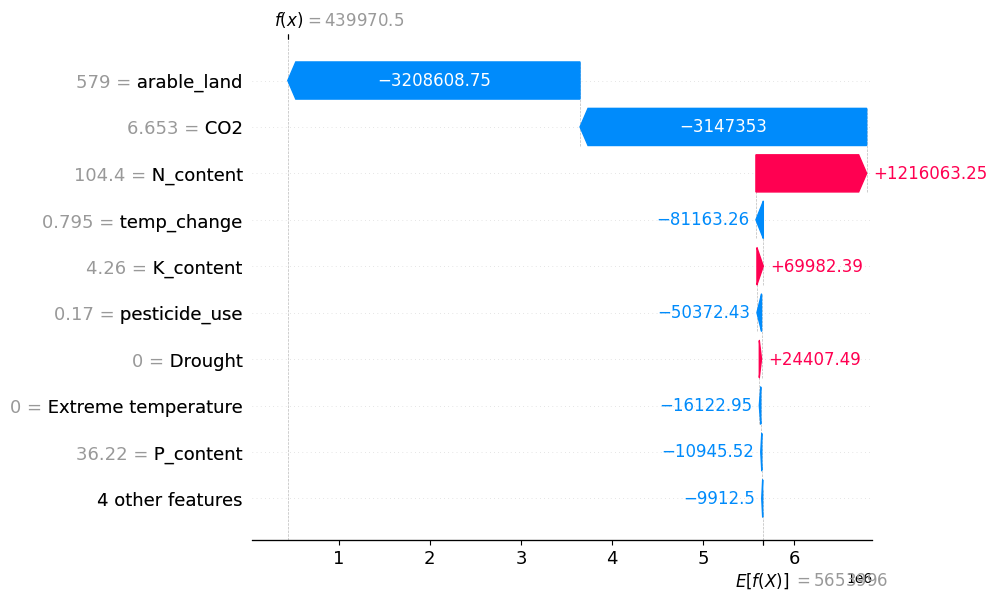

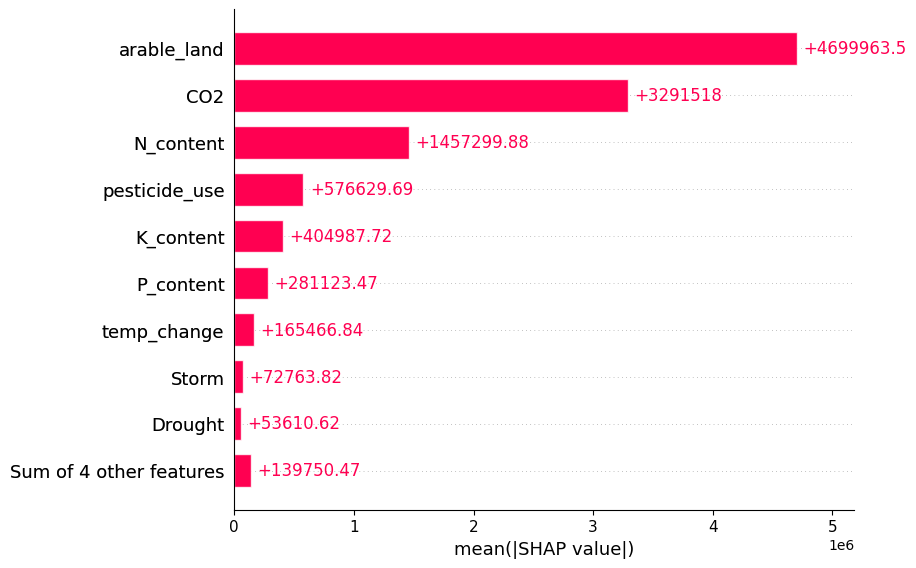

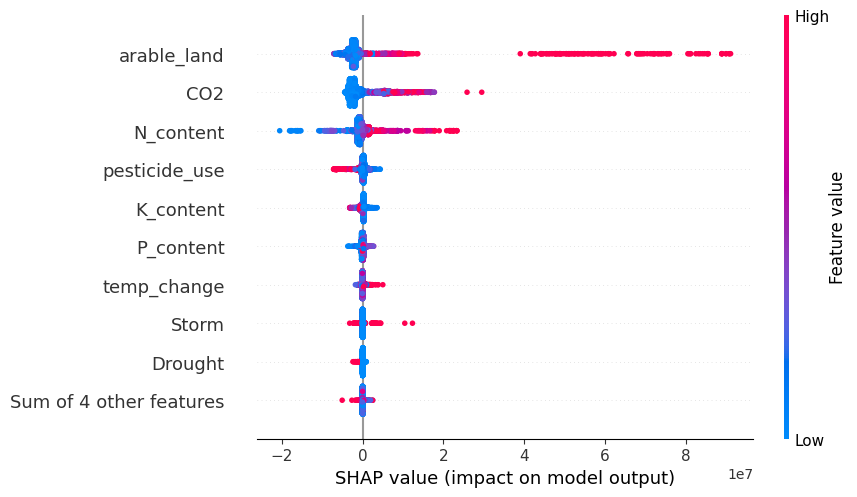

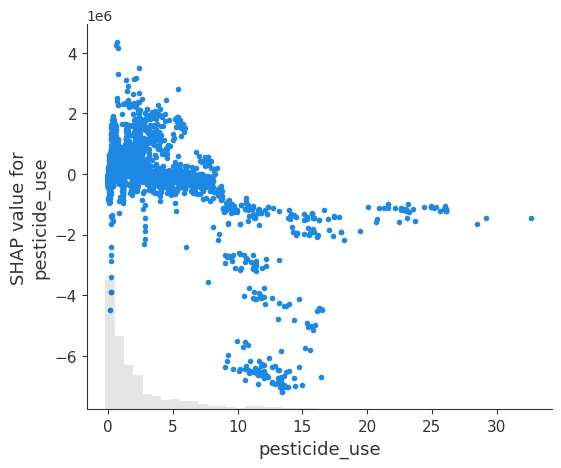

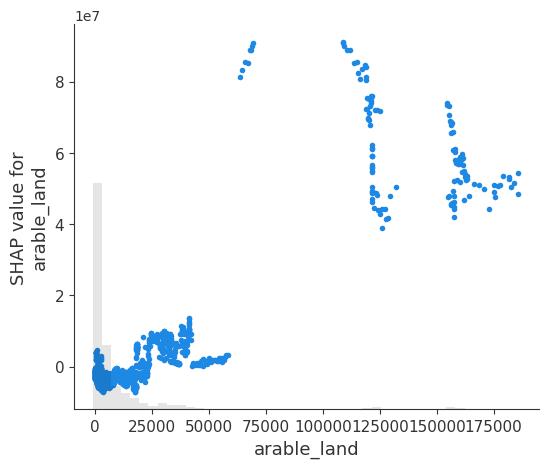

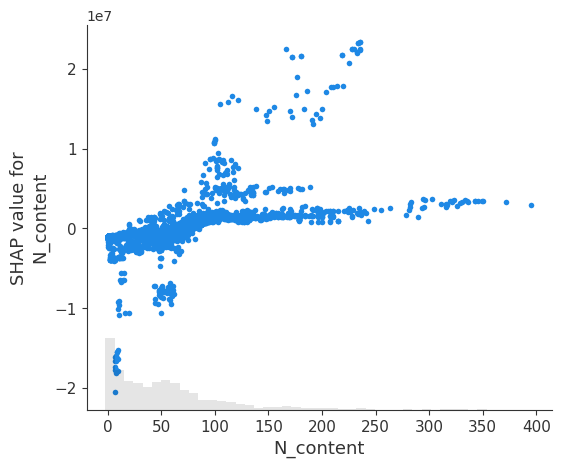

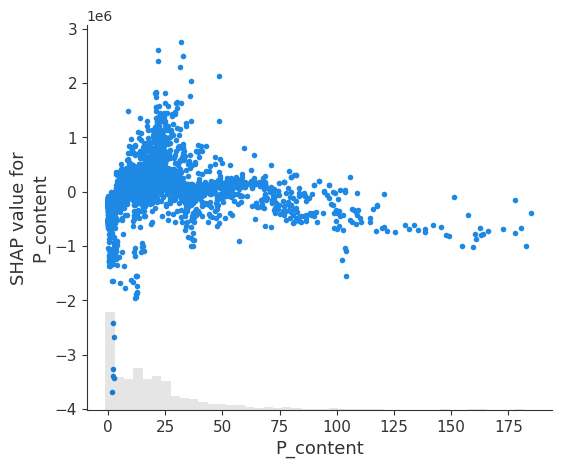

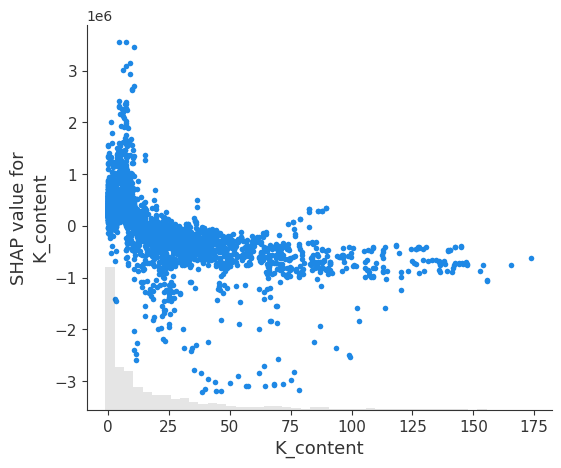

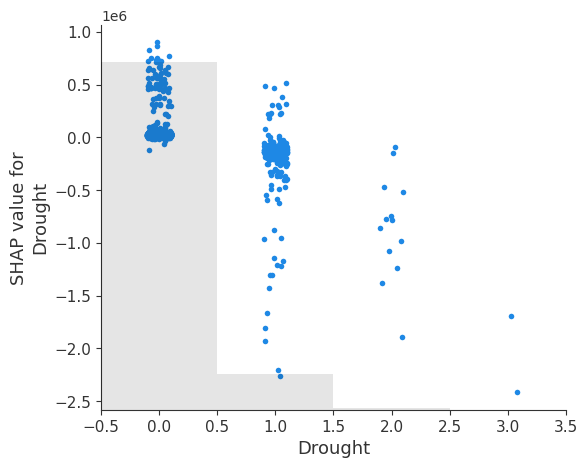

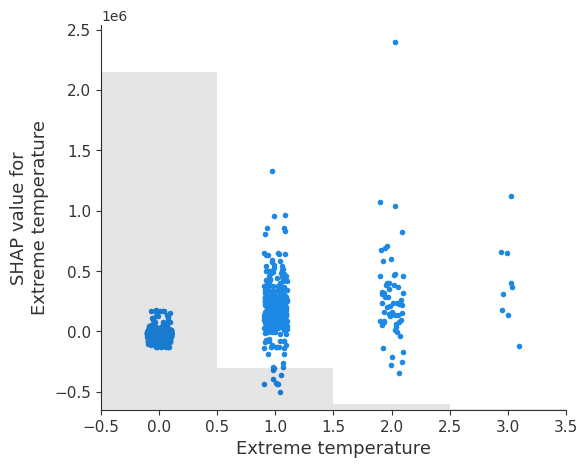

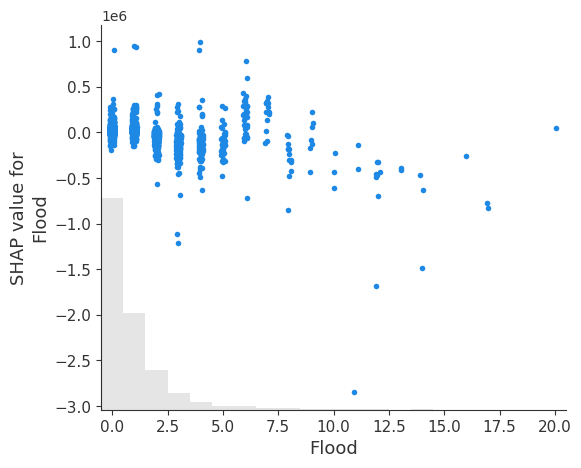

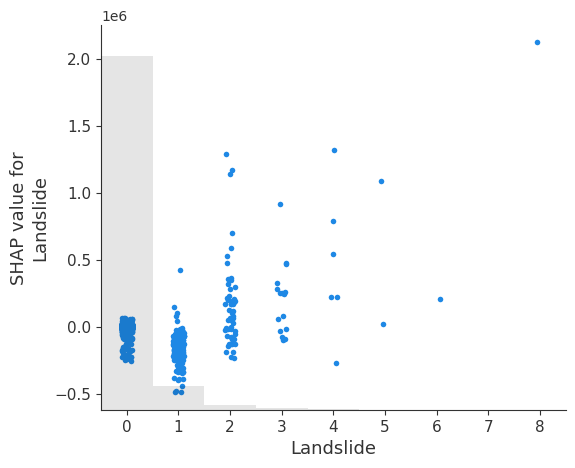

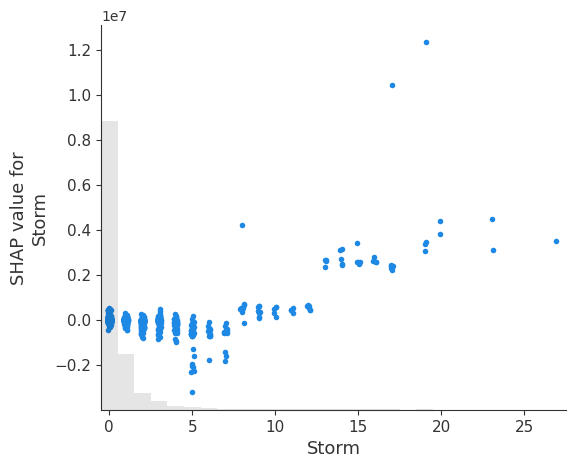

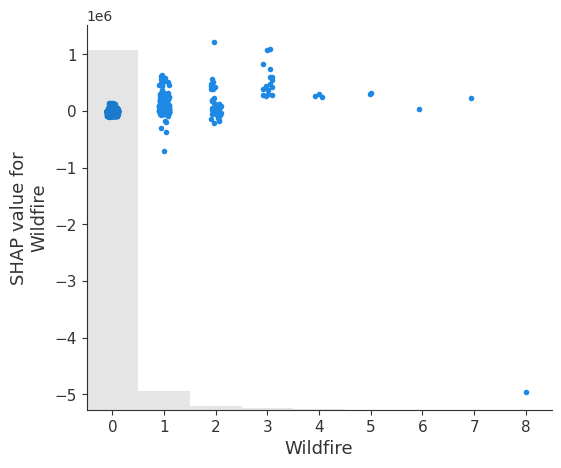

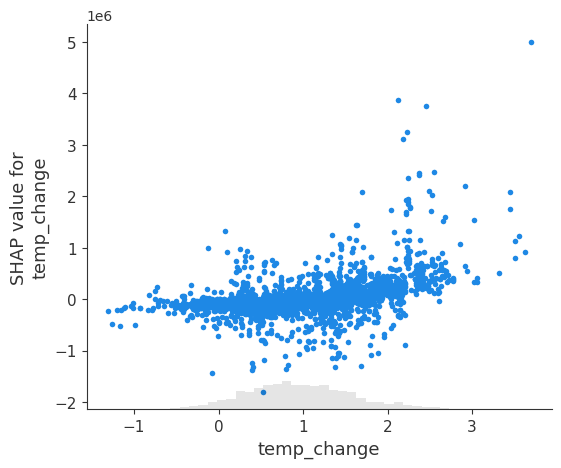

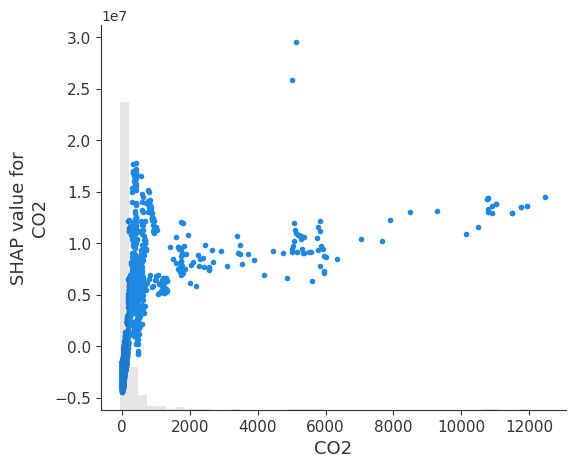

In [ ]:
shap_(wheat,"wheat")

### Shap for Rice

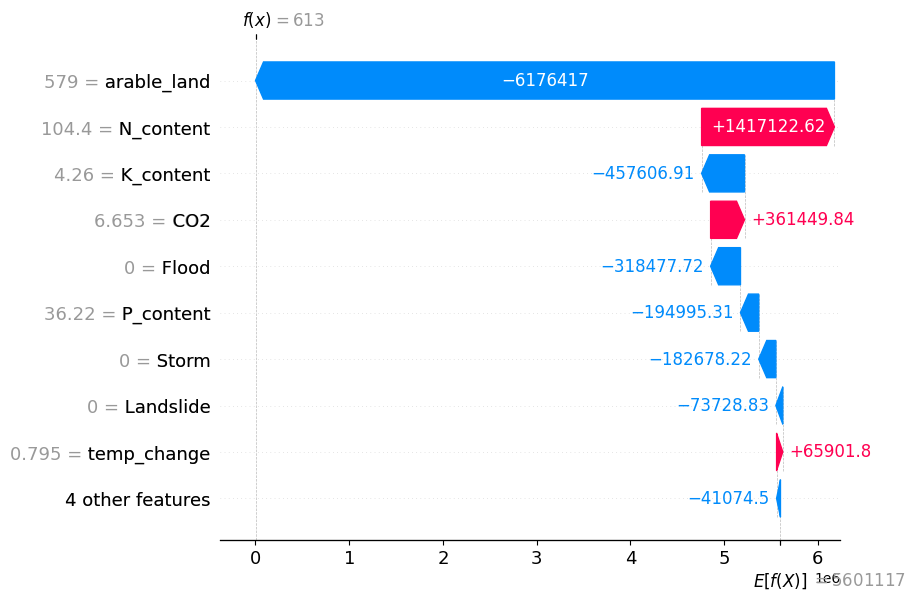

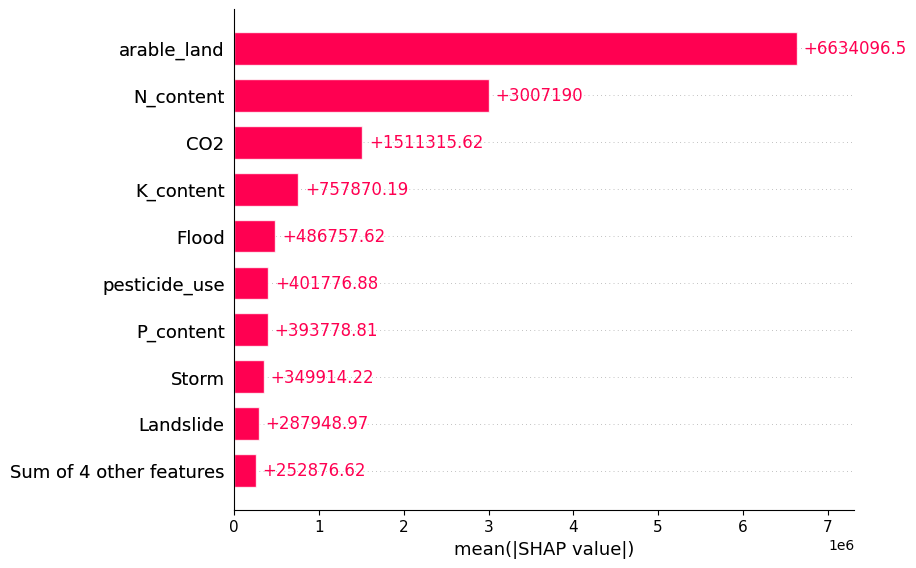

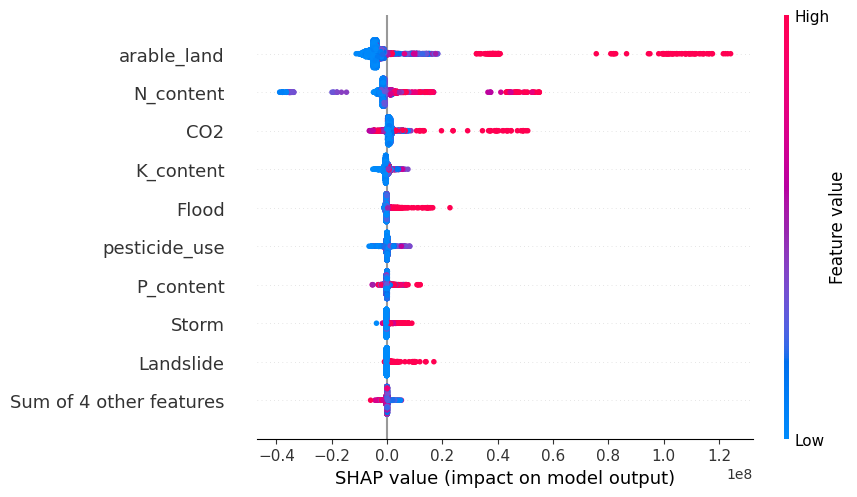

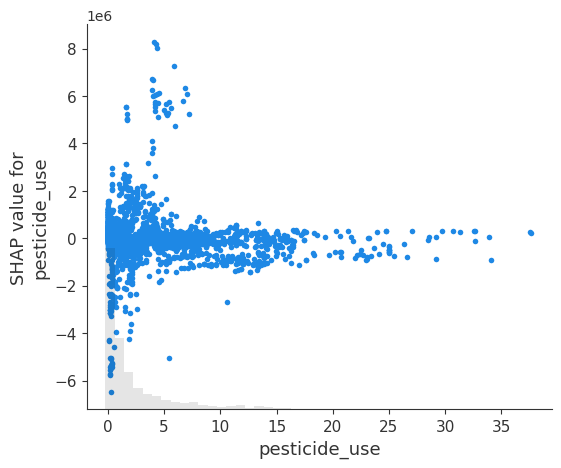

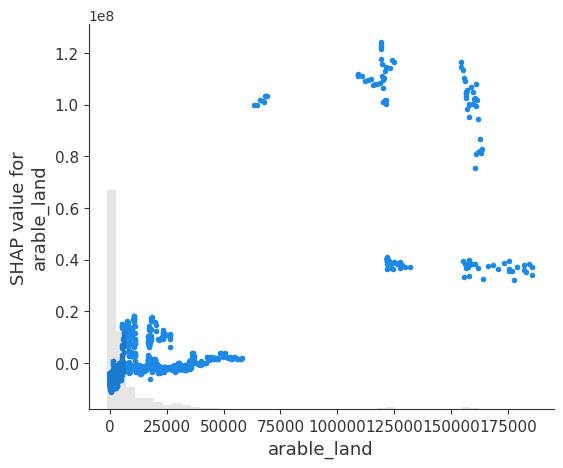

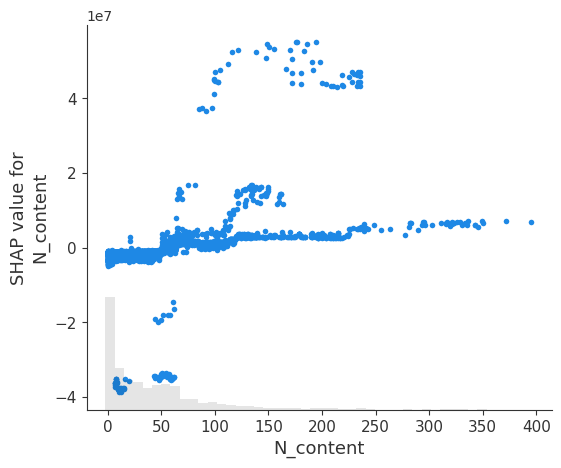

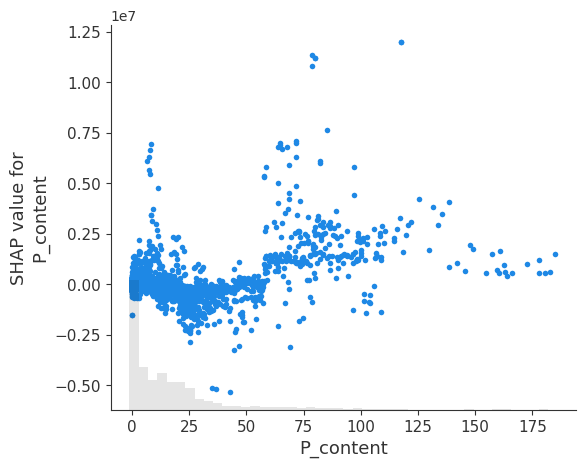

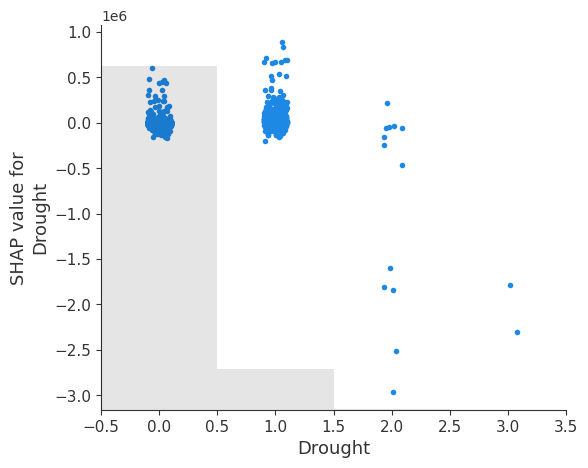

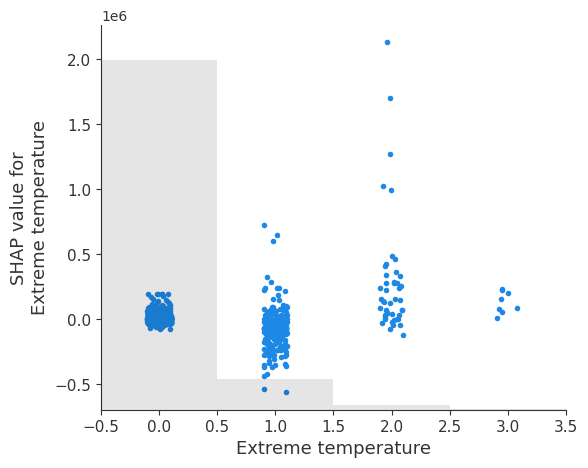

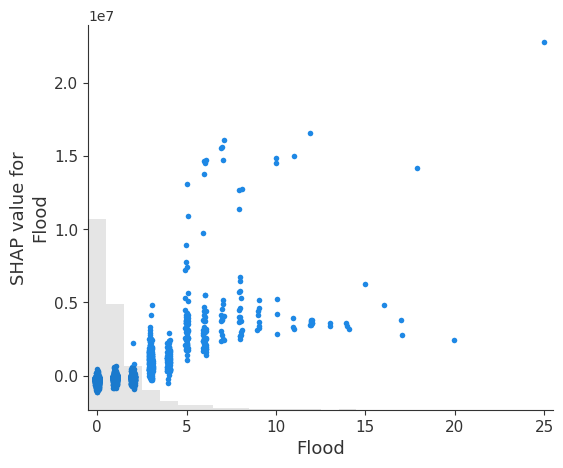

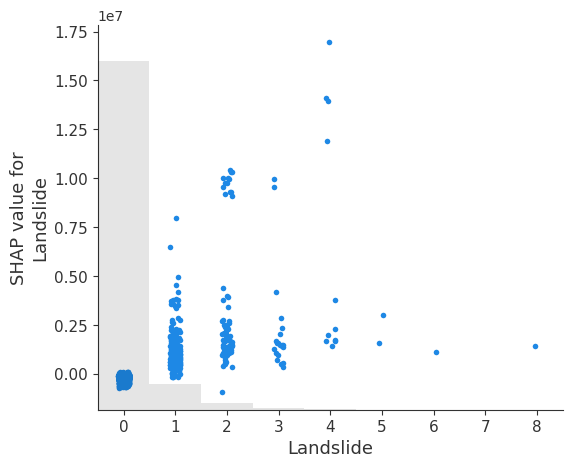

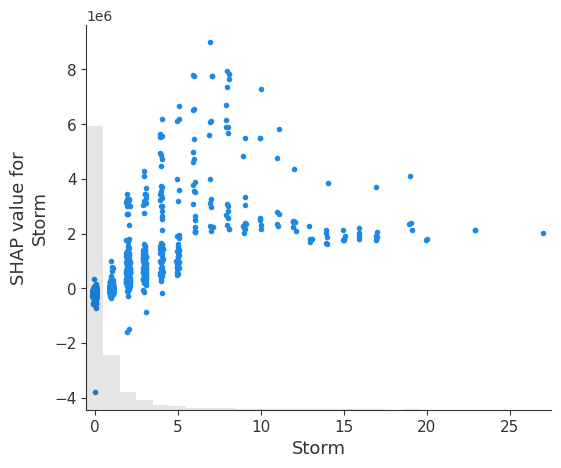

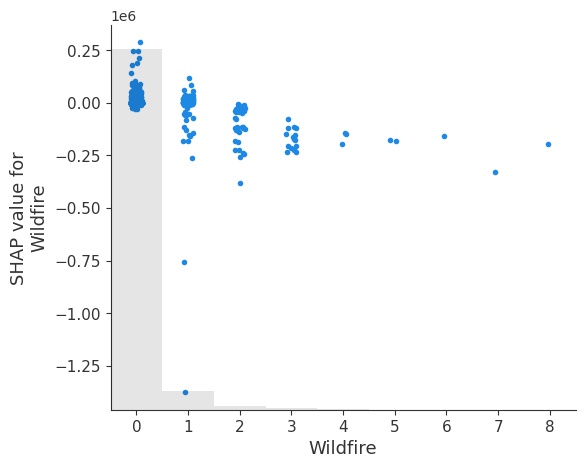

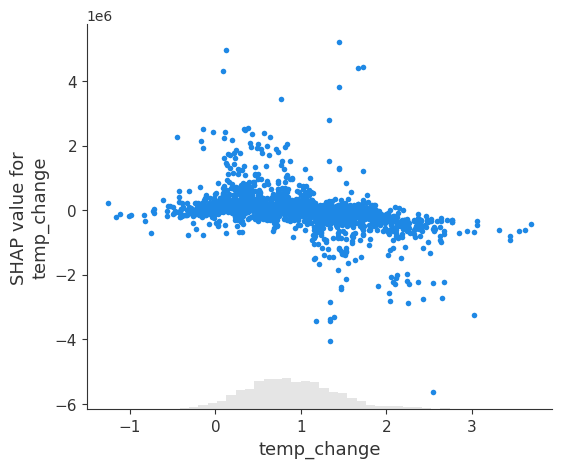

In [ ]:
shap_(rice,"rice")

### Shap for Soybean

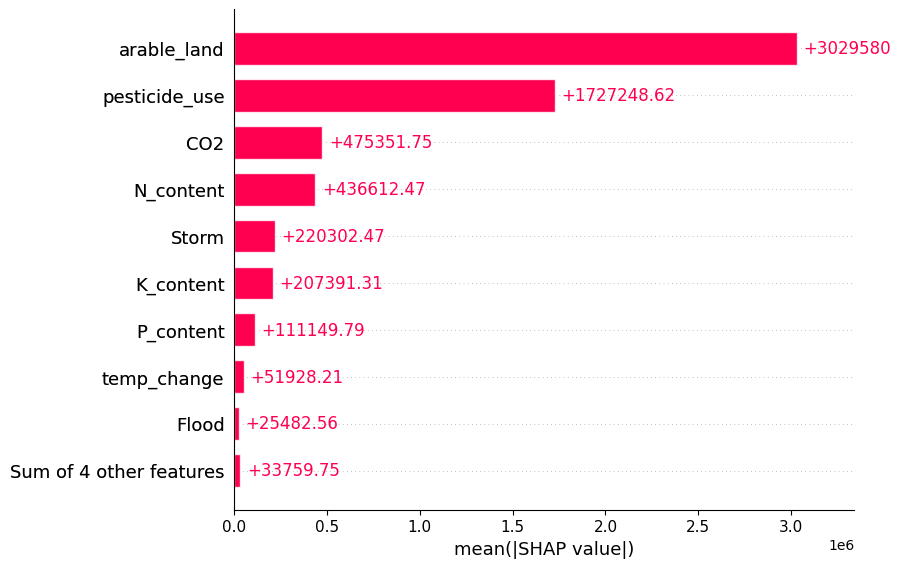

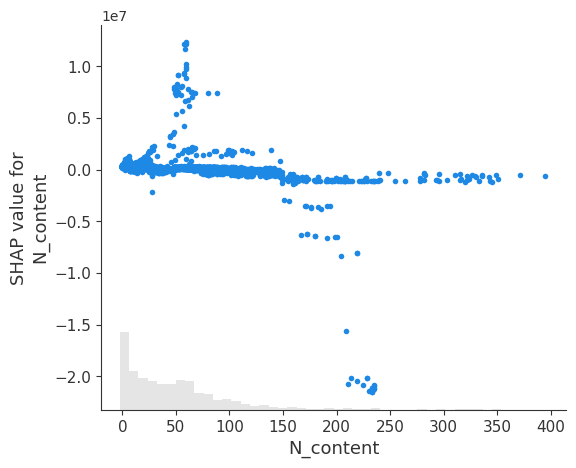

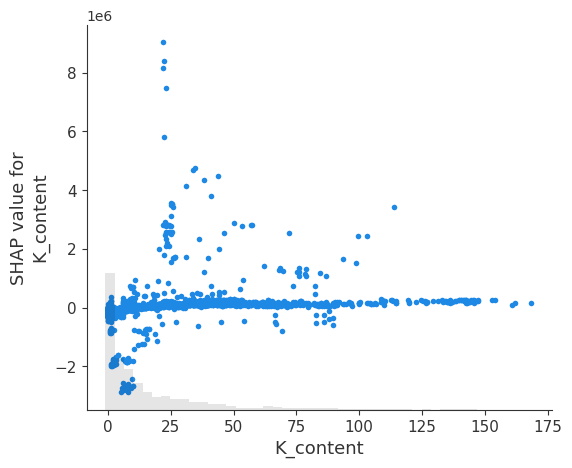

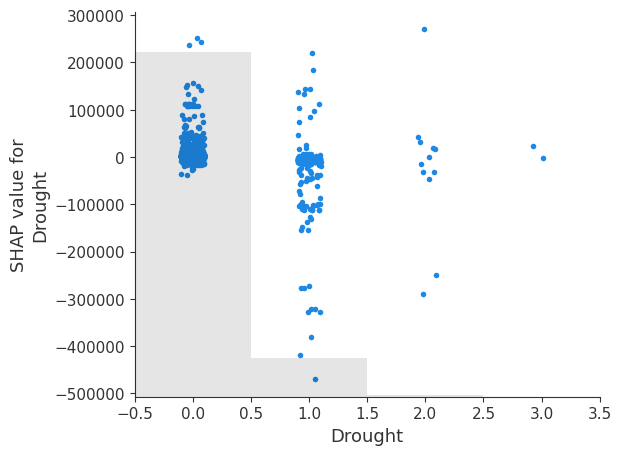

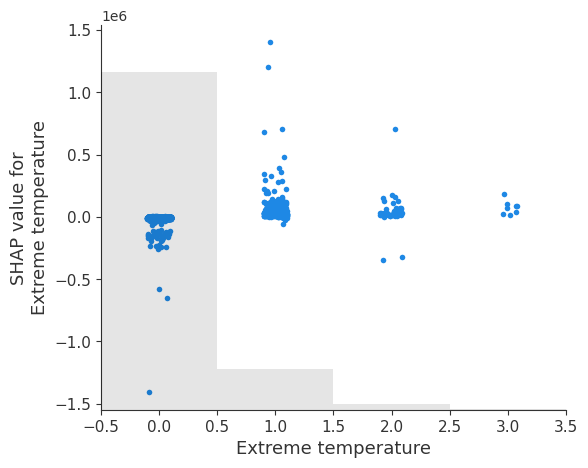

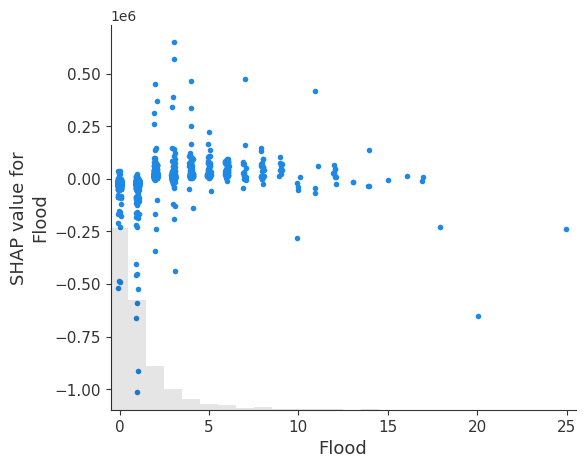

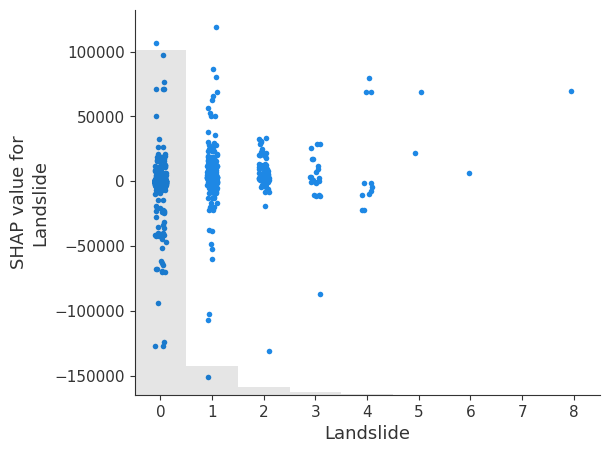

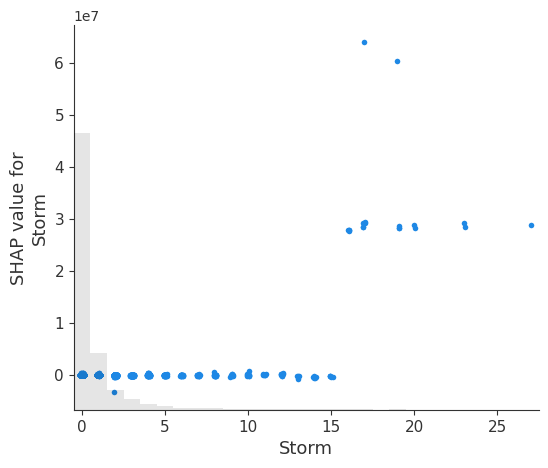

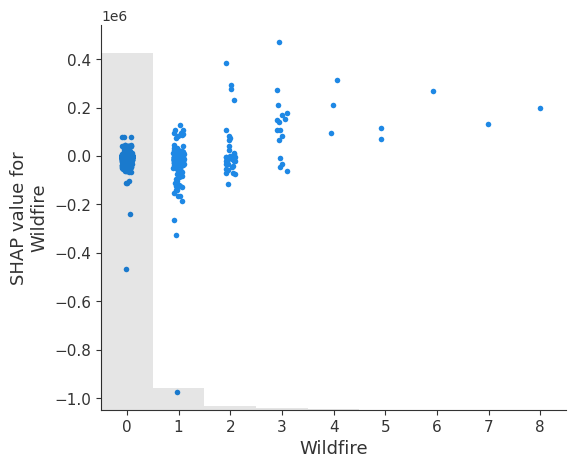

In [ ]:
shap_(soybean, "soybean")

### Shap for Maize

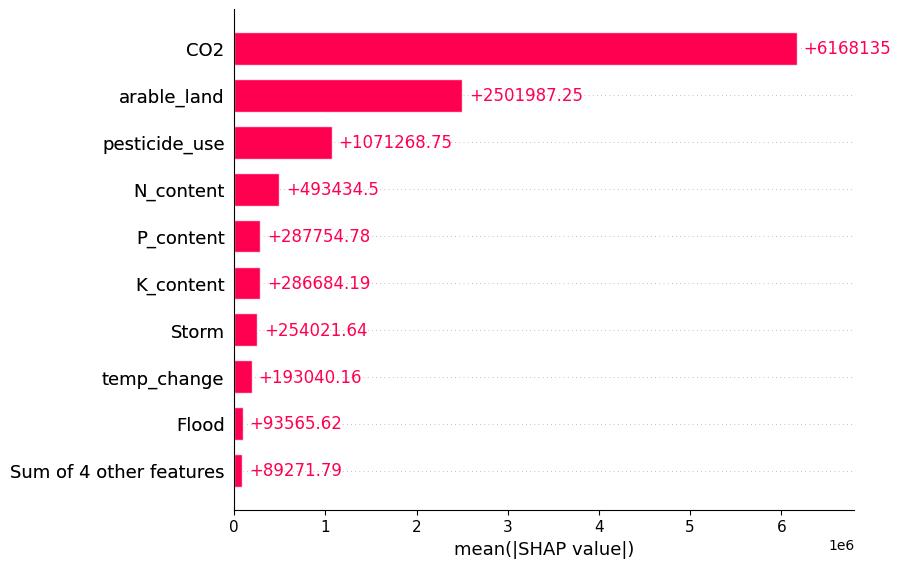

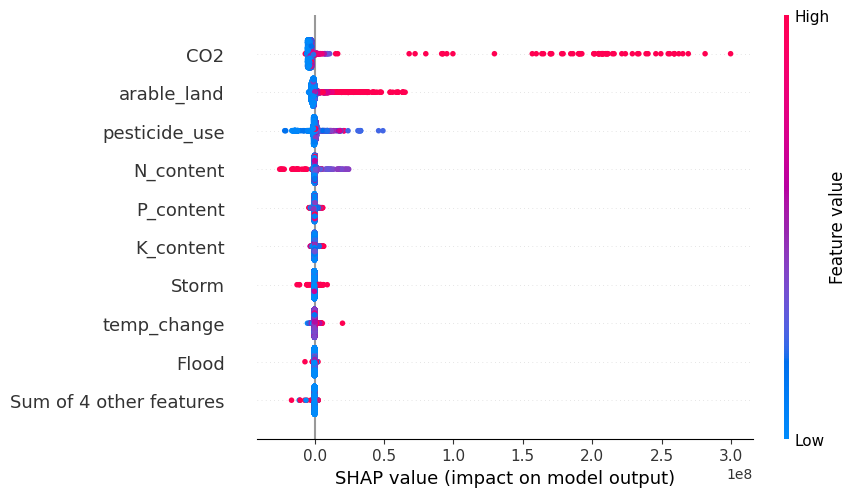

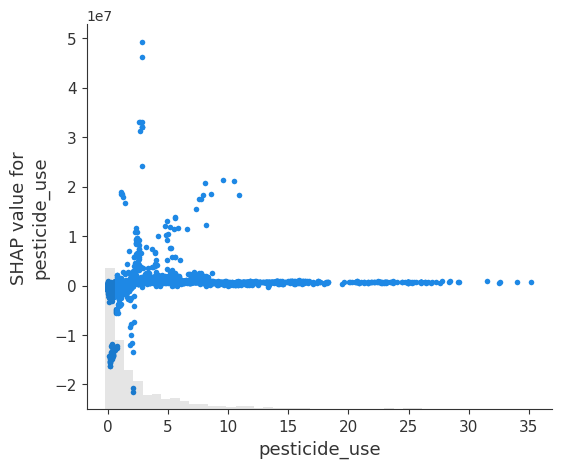

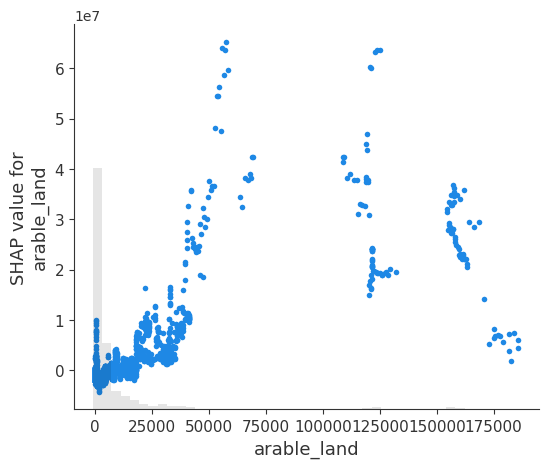

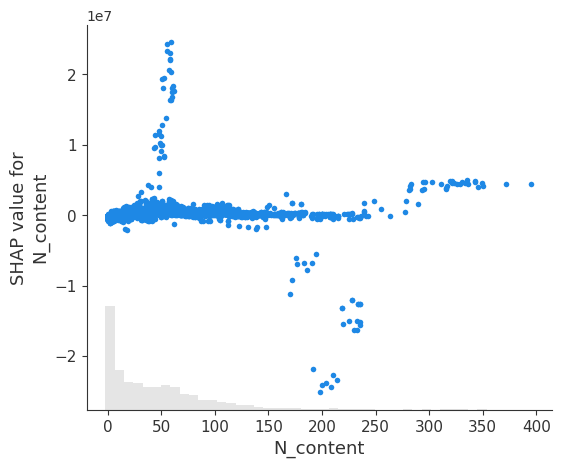

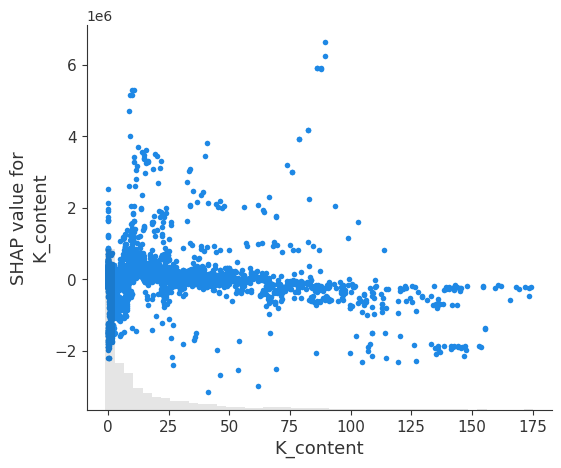

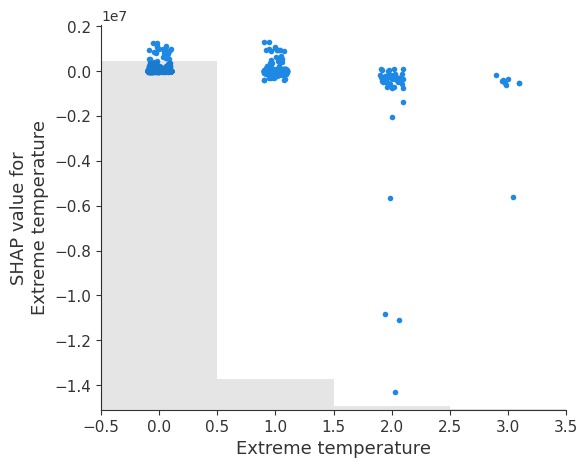

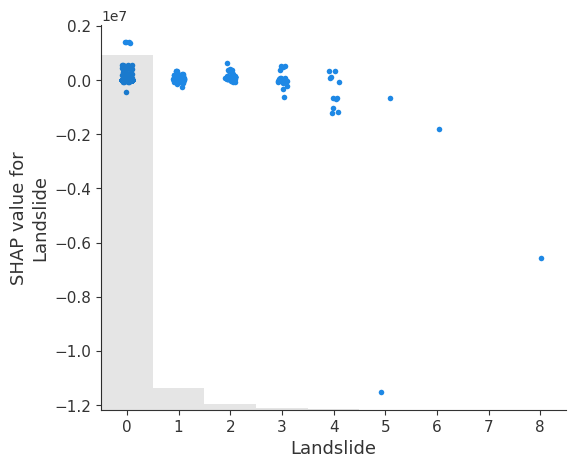

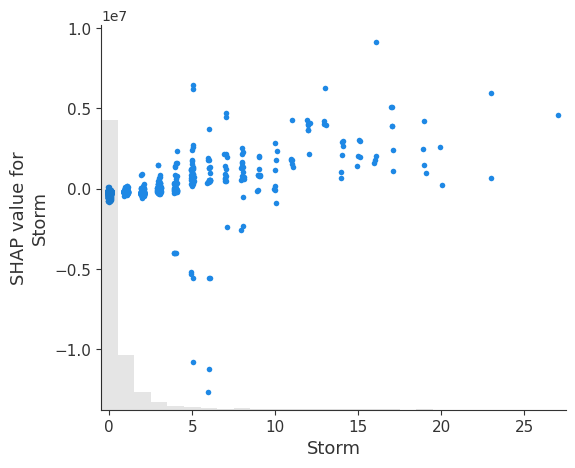

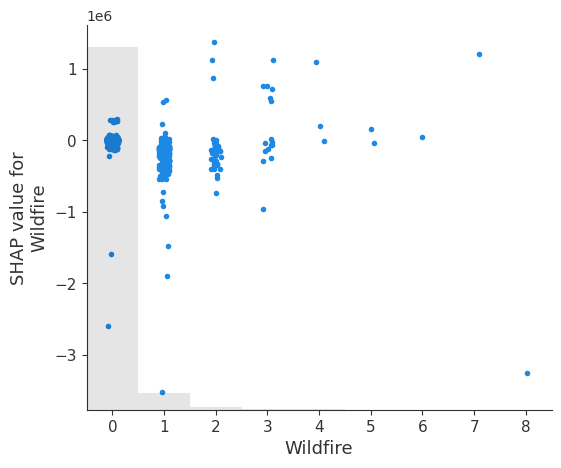

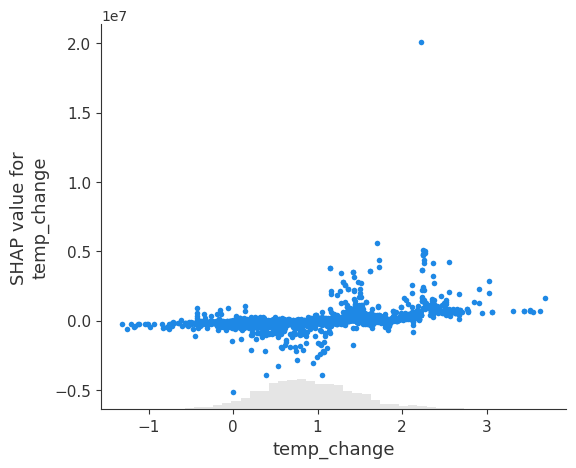

In [ ]:
shap_(maize, "maize")

Now as we know that XG boost if giving the best results for predicting crop production and from shap we get to know that the parameters which are most responsible for crops are: Wheat->(arable land, CO2, Nitrate content and pesticide use), Rice ->(arable land, Nitrate content and potash content, co2), Soybean->(arable land, pesticide use, co2 and nitrate content), Maize->(CO@, arable land, pesticide use, n_content); respectively in the order of there contribution in prediction. Further we will check distribution of the dataset and see if we can produce better results using different distributions.

# Different Distributions Check

Three different tranformations are considered for the purpose of checking how the prediction accuracy changes with different distributions. Standard Scaler,Robust Scaler and Yeo-Johnson. Standard Scaler is used for creating the original model selection.

In [ ]:
def diff_distribution(df, val):
  lst=list(df.columns)
  lst.remove(val)
  lst.remove("Code")
  lst.remove("Year")
  features = df[lst]
  label = df[[val]]
  X,y=(features,label)
  max_score = 0.0
  max_class = ''
  timetaken=[]
  score_all=[]
  models=[]
  Xtest, Ytest=[],[]
  names = ["Standard Scaler", "Robust Scaler","Yeo-Johnson"]
  distributions = [StandardScaler(),RobustScaler(),PowerTransformer(method='yeo-johnson')]
   # iterate over distributions
  for name, clf in zip(names, distributions):
    X = clf.fit_transform(X)
    random.seed(10)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    Xtest.append(X_test)
    Ytest.append(y_test)
    start_time = time.time()
    model=xgb.XGBRegressor(objective="reg:squarederror").fit(X_train, y_train)
    models.append(model)

  #    accuracy =  np.mean(y_pred == y_test)100.0 *
  #print("Accuracy:", accuracy)
    score = 100.0 * model.score(X_test, y_test)
    score_all.append(score)
    timetaken.append((time.time() - start_time))
    print('Classifier = %s, Score (test, accuracy) = %.2f,' %(name, score), 'Training time = %.2f seconds' % (time.time() - start_time))
    #shap_plots(model,X)
    if score > max_score:
        clf_best = clf
        max_score = score
        max_class = name

  print(80*'-' )
  print('Best --> Classifier = %s, Score (test, accuracy) = %.2f' %(max_class, max_score))
  return(names,score_all,models, Xtest, Ytest)


#### For wheat

Classifier = Standard Scaler, Score (test, accuracy) = 97.33, Training time = 0.63 seconds
Classifier = Robust Scaler, Score (test, accuracy) = 98.10, Training time = 0.61 seconds
Classifier = Yeo-Johnson, Score (test, accuracy) = 97.97, Training time = 0.56 seconds
--------------------------------------------------------------------------------
Best --> Classifier = Robust Scaler, Score (test, accuracy) = 98.10


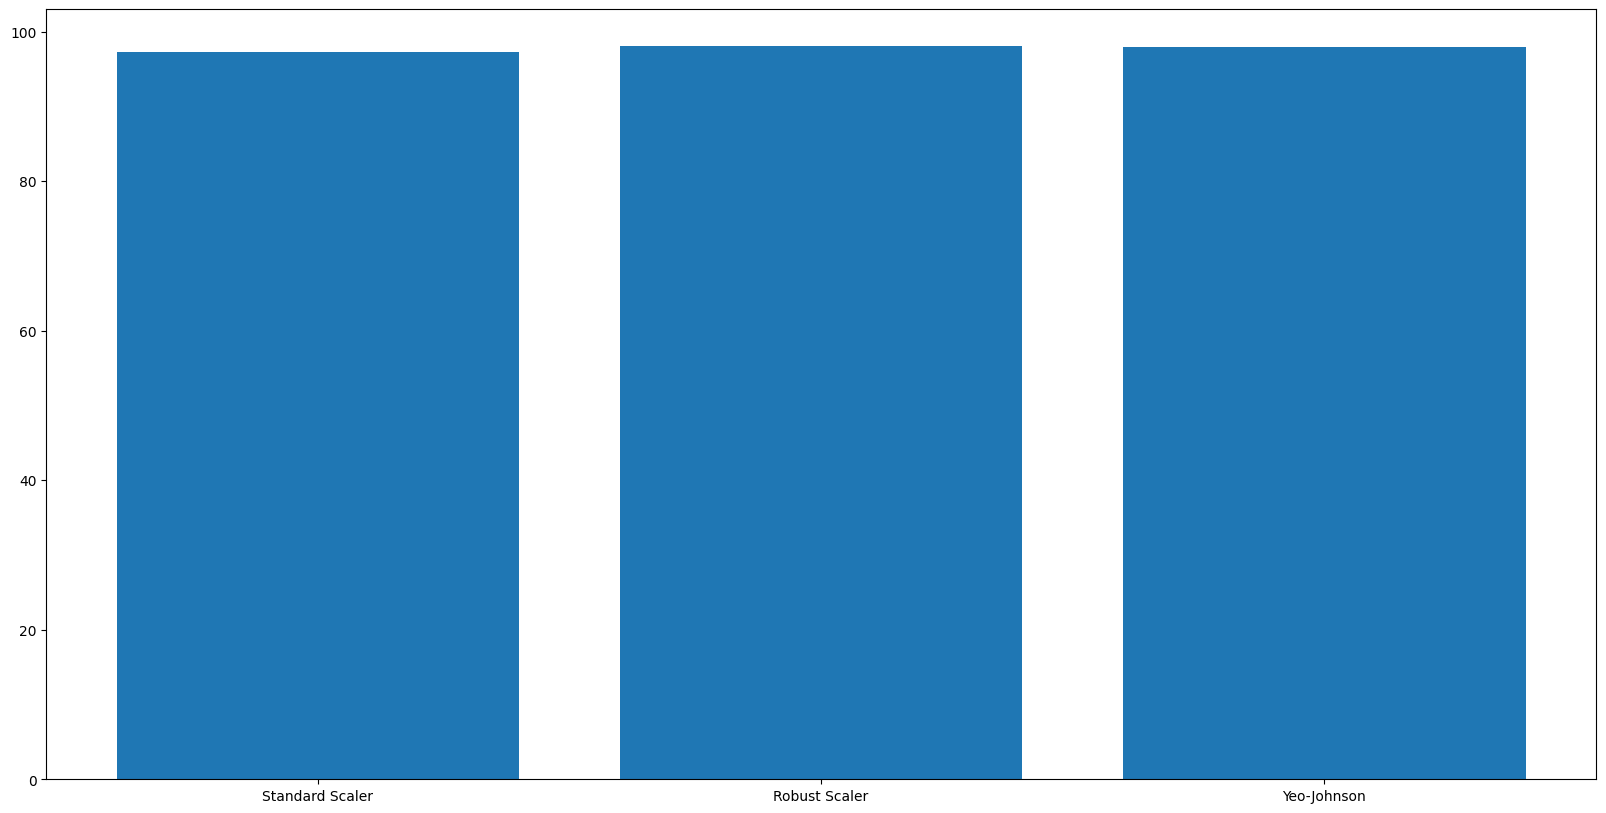

In [ ]:
names,scores,models_wheat,x_wheat, y_wheat=diff_distribution(wheat, "wheat")
plot_comparision(names,scores)

#### For Rice

Classifier = Standard Scaler, Score (test, accuracy) = 98.67, Training time = 0.65 seconds
Classifier = Robust Scaler, Score (test, accuracy) = 99.36, Training time = 0.59 seconds
Classifier = Yeo-Johnson, Score (test, accuracy) = 98.50, Training time = 4.14 seconds
--------------------------------------------------------------------------------
Best --> Classifier = Robust Scaler, Score (test, accuracy) = 99.36


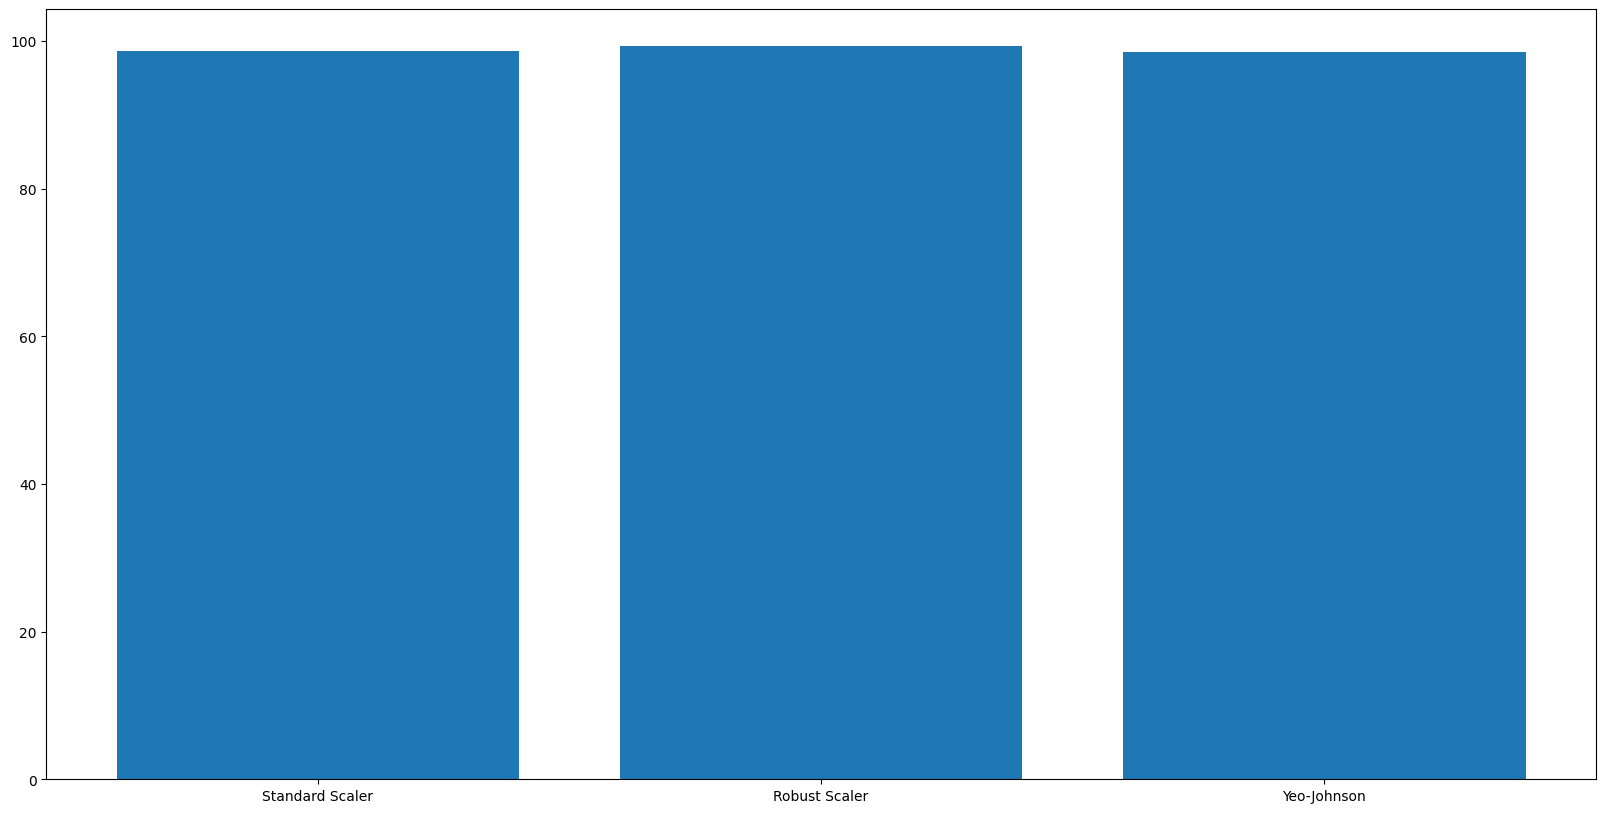

In [ ]:
names,scores,models_rice,x_rice, y_rice=diff_distribution(rice, "rice")
plot_comparision(names,scores)

#### For Maize

Classifier = Standard Scaler, Score (test, accuracy) = 98.16, Training time = 0.70 seconds
Classifier = Robust Scaler, Score (test, accuracy) = 98.40, Training time = 0.71 seconds
Classifier = Yeo-Johnson, Score (test, accuracy) = 97.84, Training time = 0.73 seconds
--------------------------------------------------------------------------------
Best --> Classifier = Robust Scaler, Score (test, accuracy) = 98.40


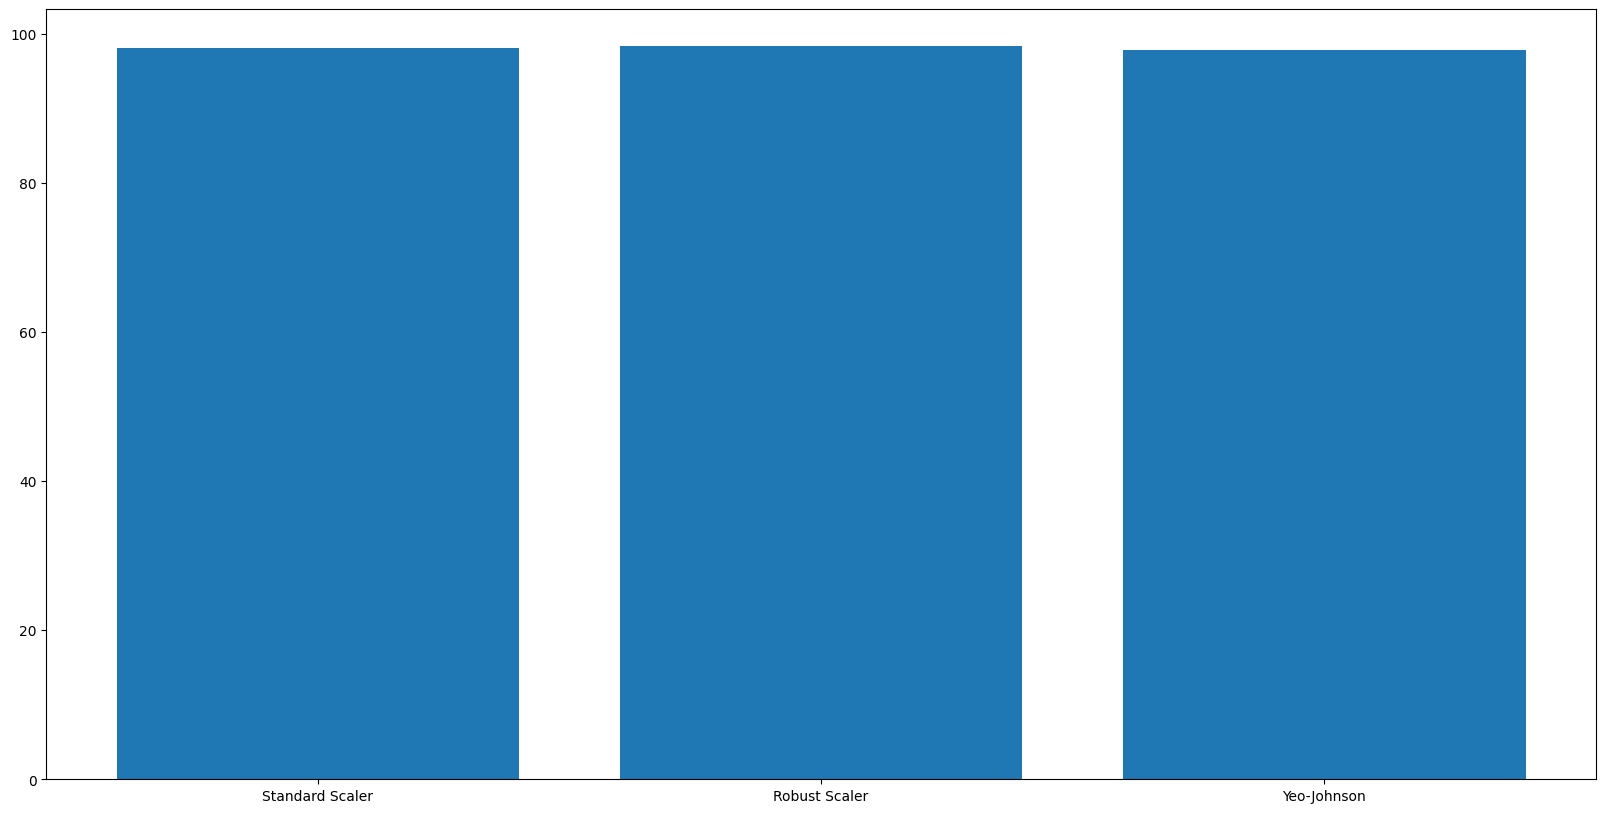

In [ ]:
names,scores,models_maize,x_maize, y_maize=diff_distribution(maize, "maize")
plot_comparision(names,scores)

#### For Soybean

In [ ]:
names,scores,models_soybean,x_soybean, y_soybean=diff_distribution(soybean, "soybean")
plot_comparision(names,scores)

Classifier = Standard Scaler, Score (test, accuracy) = 96.40, Training time = 0.55 seconds
Classifier = Robust Scaler, Score (test, accuracy) = 97.07, Training time = 0.52 seconds
Classifier = Yeo-Johnson, Score (test, accuracy) = 95.60, Training time = 0.54 seconds
--------------------------------------------------------------------------------
Best --> Classifier = Robust Scaler, Score (test, accuracy) = 97.07


From the above it is infered that following transformation or distribution in creating XG boost model will produce best results:
(1)Wheat: Robust Scaler
(2)Rice: Yeo-Johnson
(3)Maize: Yeo-Johnson or robust scaler
(4)Soybean: Yeo-Johnson

In [ ]:
import pickle
filename = 'wheat_model.sav'
pickle.dump(models_wheat[0], open(filename, 'wb'))

In [ ]:
loaded_model = pickle.load(open(filename, 'rb'))


In [ ]:
result = loaded_model.score(x_wheat[0], y_wheat[0])
print(result)

0.9733375944198122


Predicting agriculrture production for India based on the CO2 for 2021. this will help us to test of model as well

In [ ]:
d=wheat[(wheat["Code"]=="IND")&(wheat["Year"]==2021)].iloc[:,3:]
d

pesticide_use  arable_land  N_content  P_content  K_content  Drought  \
1600           0.37   154447.948     115.97      46.58      15.05        0   

      Extreme temperature  Flood  Landslide  Storm  Wildfire  temp_change  \
1600                    0      9          2      5         0        0.733   

              CO2  
1600  2648.779133

In [ ]:
future=pd.concat([d]*5, ignore_index=True) #d.loc[d.index.repeat(d.pesticide_use)]

In [ ]:
future

pesticide_use  arable_land  N_content  P_content  K_content  Drought  \
0           0.37   154447.948     115.97      46.58      15.05        0   
1           0.37   154447.948     115.97      46.58      15.05        0   
2           0.37   154447.948     115.97      46.58      15.05        0   
3           0.37   154447.948     115.97      46.58      15.05        0   
4           0.37   154447.948     115.97      46.58      15.05        0   

   Extreme temperature  Flood  Landslide  Storm  Wildfire  temp_change  \
0                    0      9          2      5         0        0.733   
1                    0      9          2      5         0        0.733   
2                    0      9          2      5         0        0.733   
3                    0      9          2      5         0        0.733   
4                    0      9          2      5         0        0.733   

           CO2  
0  2648.779133  
1  2648.779133  
2  2648.779133  
3  2648.779133  
4  2648.779133

In [ ]:
future["CO2"]=[2726.342188,2753.929680,2781.517172,2809.104664,2733.708736]



In [ ]:
predict_wheat=StandardScaler().fit_transform(future)

In [ ]:
wheatFuturePredict=loaded_model.predict(predict_wheat)

In [ ]:
wheat_prod_next_year=pd.DataFrame({"Year":["2022","2023","2024","2025", "2026"], "Wheat_production":wheatFuturePredict})

In [ ]:
print("Wheat Production Prediction for India for next 5 years (2022-2026)")
wheat_prod_next_year

Wheat Production Prediction for India for next 5 years (2022-2026)


Year  Wheat_production
0  2022        2848722.50
1  2023        3270944.25
2  2024       12511291.00
3  2025       26222830.00
4  2026        2848722.50

# Conclusion

1. From initial visualization it can be seen that CO2, change in temperature and crops have upward linear trend, which is a indication that they may have certain relationship
2. From the Shap analysis it is evident that CO2 is a major contributor in production of crops along with arable land, pesticide used and nitrogen content.

3. We were able to find the Golden cluster at the time of running the project for->
wheat:(Argentina, Bulgaria,Brazil,Egypt, Japan, Mexico, Saudi Arabia, South Africa),
Rice: (Brazil, South Korea, Pakistan, Philippines),
Maize: (Argentina, Indonesia, Mexico, South Africa),
Soyabean(India).The above countries are having high production of respective crops with high Co2.

4. XG Boost is providing the best results with around 98% for the crop production taken under consideration.Although the accuracy of the models for all the crops are pretty high but still they could be improved.

5. We were able to predict the wheat production for next five years (with perspective values) for India. Similarly can be done for rest of the crops and any other country.

## Future work:
Futhure we can do time series to get the values of different features and thus using them for predicting the production value of different crops considered in this project.

Time series analysis will be done country wise. for example, if we wish to predict what will be the production of wheat in India. First we will segregate the data points for India and then do time series prediction for most of the features except the production value and then we can use the final regression model to predict the production of wheat in India for the next few years based on the predicted feature values.